In [1]:
from itertools import repeat

import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import seaborn as sns

from eval import (
    Episode,
    Study,
    number_of_better_final_beams,
    plot_best_mae_box,
    plot_best_mae_diff_over_problem,
    plot_best_mae_over_time,
    plot_final_mae_box,
    plot_mae_over_time,
    plot_steps_to_convergence_box,
    plot_steps_to_threshold_box,
    problem_aligned,
    screen_extent,
    plot_screen_image
)


In [2]:
plt.style.use(["science", "nature"])


In [3]:
FIG_DIR = "figures/bo_vs_rl"


In [4]:
rl_sim = Study.load("data/bo_vs_rl/simulation/rl", runs="*problem_*", name="RL (Sim)")
bo_sim = Study.load("data/bo_vs_rl/simulation/bo", name="BO (Sim)")

rl_real = Study.load(
    "data/bo_vs_rl/real/rl",
    runs="*problem_*",
    name="RL (Real)",
)
bo_real = Study.load(
    "data/bo_vs_rl/real/bo",
    runs="*problem_*",
    name="BO (Real)",
)

rl_real_2 = Study.load(
    "data/bo_vs_rl/real/rl",
    runs="20221117*_problem*",
    name="RL (Trio)",
    drop_screen_images=True,
)
bo_real_2 = Study.load(
    "data/bo_vs_rl/real/bo",
    runs="20221117*_problem*",
    name="BO EI (Trio)",
    drop_screen_images=True,
)
bo_ucb_real_2 = Study.load(
    "data/bo_vs_rl/real/bo_ucb",
    runs="20221117*_problem*",
    name="BO UCB (Trio)",
    drop_screen_images=True,
)
charge_study_bo = Study.load(
    "data/bo_vs_rl/real/bo",
    runs="20221201*problem*",
    name="BO (over charges)",
    drop_screen_images=True,
)
charge_study_rl = Study.load(
    "data/bo_vs_rl/real/rl",
    runs="20221201*problem*",
    name="RL (over charges)",
    drop_screen_images=True,
)
charge_study_bo_2 = Study.load(
    "data/bo_vs_rl/real/bo",
    runs="20221208*problemx*",
    name="BO (over charges) 2",
    drop_screen_images=True,
)
charge_study_rl_2 = Study.load(
    "data/bo_vs_rl/real/rl",
    runs="20221208*problemx*",
    name="RL (over charges) 2",
    drop_screen_images=True,
)
safe_bo_sim_2 = Study.load(
    "data/bo_vs_rl/simulation/safe_bo", runs="problem_*", name="Safe-BO"
)
nelder_mead_sim = Study.load(
    "data/bo_vs_rl/simulation/nelder-mead", runs="problem_*", name="Nelder-Mead"
)
random_sim = Study.load(
    "data/bo_vs_rl/simulation/random", runs="problem_*", name="Random"
)
closing_bo = Study.load(
    "data/bo_vs_rl/real/bo",
    runs="20221213*_problem*",
    name="Closing BO",
    drop_screen_images=True,
)
closing_rl = Study.load(
    "data/bo_vs_rl/real/rl",
    runs="20221213*_problem*",
    name="Closing RL",
    drop_screen_images=True,
)
closing_rlbo = Study.load(
    "data/bo_vs_rl/real/rl_bo_takeover_0.00015",
    runs="20221213*_problem*",
    name="Closing RL+BO",
    drop_screen_images=True,
)
hybrid_sim = Study.load(
    "data/bo_vs_rl/simulation/rl_bo_takeover_0.00015",
    runs="problem_*",
    name="Hybrid (Sim)",
)
bo_nn_prior = Study.load("data/bo_vs_rl/simulation/bo_nn_prior/", name="BO NN Prior")
rl_refactor = Study.load("data/bo_vs_rl/simulation/rl_refactor/", name="RL Refactor")


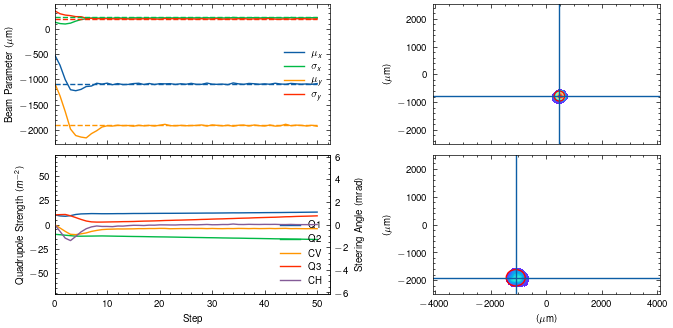

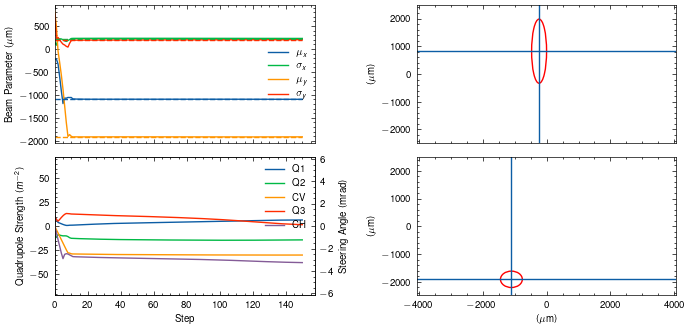

In [5]:
# For testing
i = 33
rl_real.get_episodes_by_problem(i)[0].plot_summary()
rl_sim.get_episodes_by_problem(i)[0].plot_summary(figsize=(510 / 72.72, 510 / 72.72 * 0.5))

In [6]:
zero_sim = Study(
    [
        episode
        for episode in rl_sim.episodes
        if episode.target[1] == 0 and episode.target[3] == 0
    ],
    name="Zero Sim",
)
zero_real = Study(
    [
        episode
        for episode in rl_real.episodes
        if episode.target[1] == 0 and episode.target[3] == 0
    ],
    name="Zero Real",
)

nonzero_sim = Study(
    [
        episode
        for episode in rl_sim.episodes
        if episode.target[1] != 0 or episode.target[3] != 0
    ],
    name="Non-Zero Sim",
)
nonzero_real = Study(
    [
        episode
        for episode in rl_real.episodes
        if episode.target[1] != 0 or episode.target[3] != 0
    ],
    name="Non-Zero Real",
)


In [7]:
all_studies = [
    rl_sim,
    bo_sim,
    rl_real,
    bo_real,
    # rl_real_2,
    # bo_real_2,
    # bo_ucb_real_2,
    # zero_sim,
    # zero_real,
    # safe_bo_sim,
    nelder_mead_sim,
    random_sim,
    # closing_rl,
    # closing_rlbo,
    hybrid_sim,
    # bo_nn_prior,
]


In [8]:
for study in all_studies:
    lengths = [len(episode) for episode in study.episodes]
    print(f"Lengths in {study.name} -> {min(lengths)} / {max(lengths)}")


Lengths in RL (Sim) -> 151 / 151
Lengths in BO (Sim) -> 152 / 152
Lengths in RL (Real) -> 51 / 51
Lengths in BO (Real) -> 77 / 77
Lengths in Nelder-Mead -> 151 / 151
Lengths in Random -> 151 / 151
Lengths in Hybrid (Sim) -> 151 / 152


In [9]:
for study in all_studies:
    print(f"Lenght of {study.name} -> {len(study)} episodes")


Lenght of RL (Sim) -> 300 episodes
Lenght of BO (Sim) -> 300 episodes
Lenght of RL (Real) -> 22 episodes
Lenght of BO (Real) -> 22 episodes
Lenght of Nelder-Mead -> 300 episodes
Lenght of Random -> 300 episodes
Lenght of Hybrid (Sim) -> 300 episodes


In [10]:
bo_real_episodes = [episode.problem_index for episode in bo_real.episodes]
print(f"{bo_real.name} -> {bo_real_episodes}")
rl_real_episodes = [episode.problem_index for episode in rl_real.episodes]
print(f"{rl_real.name} -> {rl_real_episodes}")


BO (Real) -> [2, 3, 4, 5, 42, 24, 6, 7, 8, 9, 0, 30, 31, 32, 33, 34, 35, 36, 37, 1, 38, 39]
RL (Real) -> [2, 3, 4, 5, 42, 24, 6, 7, 8, 9, 0, 30, 31, 32, 33, 34, 35, 36, 37, 1, 38, 39]


In [11]:
for episode in bo_real.episodes:
    print(f"{len(episode) = } / {episode.problem_index = }")


len(episode) = 77 / episode.problem_index = 2
len(episode) = 77 / episode.problem_index = 3
len(episode) = 77 / episode.problem_index = 4
len(episode) = 77 / episode.problem_index = 5
len(episode) = 77 / episode.problem_index = 42
len(episode) = 77 / episode.problem_index = 24
len(episode) = 77 / episode.problem_index = 6
len(episode) = 77 / episode.problem_index = 7
len(episode) = 77 / episode.problem_index = 8
len(episode) = 77 / episode.problem_index = 9
len(episode) = 77 / episode.problem_index = 0
len(episode) = 77 / episode.problem_index = 30
len(episode) = 77 / episode.problem_index = 31
len(episode) = 77 / episode.problem_index = 32
len(episode) = 77 / episode.problem_index = 33
len(episode) = 77 / episode.problem_index = 34
len(episode) = 77 / episode.problem_index = 35
len(episode) = 77 / episode.problem_index = 36
len(episode) = 77 / episode.problem_index = 37
len(episode) = 77 / episode.problem_index = 1
len(episode) = 77 / episode.problem_index = 38
len(episode) = 77 / epi

In [12]:
np.mean([episode.rmse() for episode in rl_sim.episodes])


0.00012929793

In [13]:
np.mean([episode.rmse() for episode in bo_sim.episodes])


0.0007469877

### General Performance Metrics

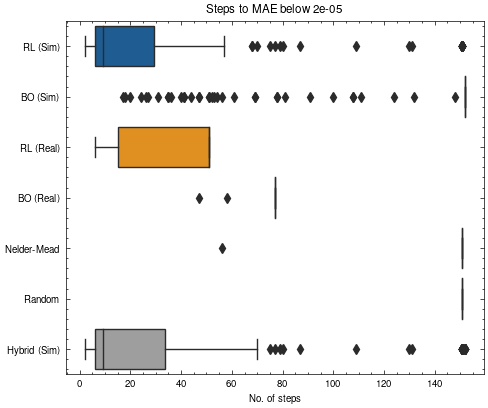

RL (Sim) -> 9.0
BO (Sim) -> 152.0
RL (Real) -> 51.0
BO (Real) -> 77.0
Nelder-Mead -> 151.0
Random -> 151.0
Hybrid (Sim) -> 9.0


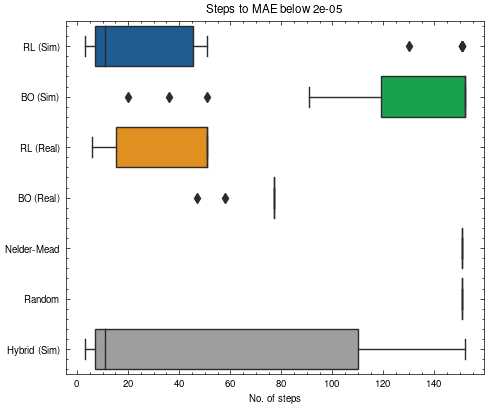

RL (Sim) -> 11.0
BO (Sim) -> 152.0
RL (Real) -> 51.0
BO (Real) -> 77.0
Nelder-Mead -> 151.0
Random -> 151.0
Hybrid (Sim) -> 11.0


In [14]:
plot_steps_to_threshold_box(all_studies, save_path=f"{FIG_DIR}/steps_to_target.pdf")
for study in all_studies:
    print(f"{study.name} -> {study.median_steps_to_threshold()}")

plot_steps_to_threshold_box(
    problem_aligned(all_studies), save_path=f"{FIG_DIR}/steps_to_target_intersected.pdf"
)
for study in problem_aligned(all_studies):
    print(f"{study.name} -> {study.median_steps_to_threshold()}")


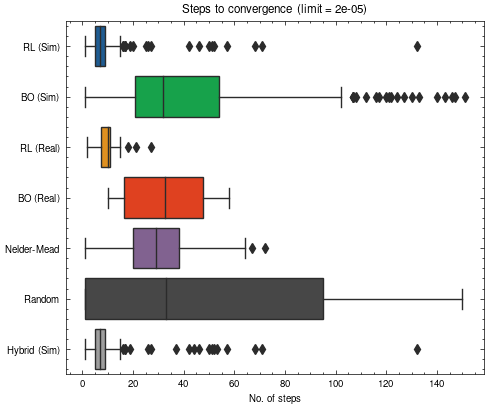

RL (Sim) -> 7.0 (|300|)
BO (Sim) -> 32.0 (|300|)
RL (Real) -> 10.0 (|22|)
BO (Real) -> 32.5 (|22|)
Nelder-Mead -> 29.0 (|300|)
Random -> 33.0 (|300|)
Hybrid (Sim) -> 7.0 (|300|)


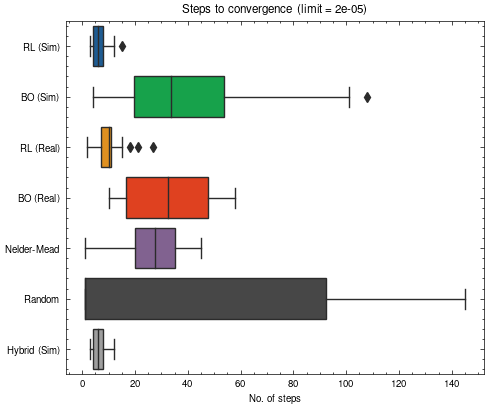

RL (Sim) -> 6.0 (|22|)
BO (Sim) -> 33.5 (|22|)
RL (Real) -> 10.0 (|22|)
BO (Real) -> 32.5 (|22|)
Nelder-Mead -> 27.5 (|22|)
Random -> 1.0 (|22|)
Hybrid (Sim) -> 6.0 (|22|)


In [15]:
plot_steps_to_convergence_box(
    all_studies,
    threshold=20e-6,
    save_path=f"{FIG_DIR}/steps_to_convergence.pdf",
)
for study in all_studies:
    print(
        f"{study.name} ->"
        f" {study.median_steps_to_convergence()} (|{len(study.episodes)}|)"
    )

plot_steps_to_convergence_box(
    problem_aligned(all_studies),
    threshold=20e-6,
    save_path=f"{FIG_DIR}/steps_to_convergence.pdf",
)
for study in problem_aligned(all_studies):
    print(
        f"{study.name} ->"
        f" {study.median_steps_to_convergence()} (|{len(study.episodes)}|)"
    )


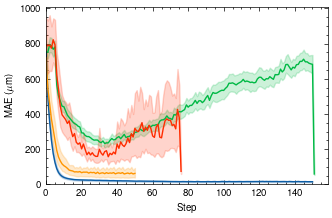

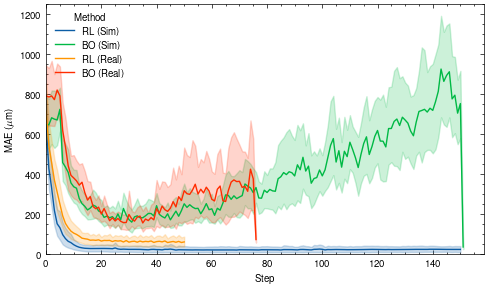

In [16]:
# Mean MAE Over Time

mae_over_time_studies = [rl_sim, bo_sim, rl_real, bo_real]
plot_mae_over_time(
    mae_over_time_studies,
    threshold=None,
    legend=False,
    title=None,
    figsize=(510 / 72.72 * 0.49, 510 / 72.72 * 0.49 * 2 / 3),
    study_name_str="Method",
    save_path=f"{FIG_DIR}/mae_over_time.pdf",
)

plot_mae_over_time(
    problem_aligned(mae_over_time_studies),
    threshold=None,
    title=None,
    study_name_str="Method",
    save_path=f"{FIG_DIR}/mae_over_time_matching.pdf",
)


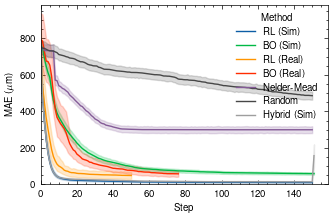

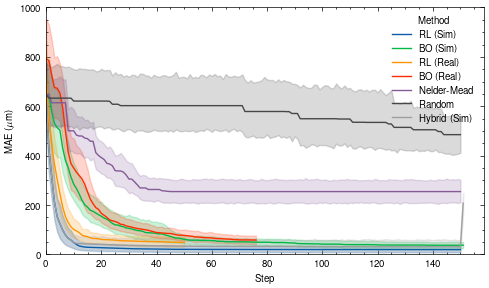

In [17]:
plot_best_mae_over_time(
    all_studies,
    threshold=None,
    title=None,
    figsize=(510 / 72.72 * 0.49, 510 / 72.72 * 0.49 * 2 / 3),
    study_name_str="Method",
    save_path=f"{FIG_DIR}/best_mae_over_time.pdf",
)

plot_best_mae_over_time(
    problem_aligned(all_studies),
    threshold=None,
    title=None,
    study_name_str="Method",
    save_path=f"{FIG_DIR}/best_mae_over_time_matching.pdf",
)


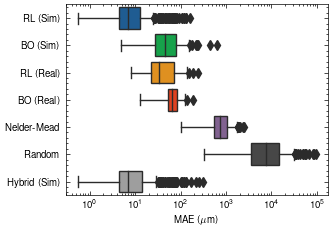

RL (Sim) -> 4.440665406946209e-06 (1.1261301462279032e-05)
BO (Sim) -> 4.5300330384634435e-05 (5.951410658174912e-05)
RL (Real) -> 2.4461009161313996e-05 (4.922609811976806e-05)
BO (Real) -> 4.3704212657758035e-05 (5.823214674323522e-05)
Nelder-Mead -> 0.000266432500211522 (0.0002996898189788529)
Random -> 0.00046473575639538467 (0.00048638979935882766)
Hybrid (Sim) -> 4.465333404368721e-06 (1.4398054677258188e-05)


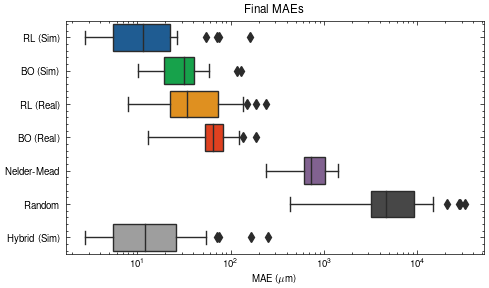

RL (Sim) -> 6.503757049358683e-06 (1.961941802619549e-05)
BO (Sim) -> 3.129900142084807e-05 (3.734962683665799e-05)
RL (Real) -> 2.4461009161313996e-05 (4.922609811976806e-05)
BO (Real) -> 4.3704212657758035e-05 (5.823214674323522e-05)
Nelder-Mead -> 0.00022602456738241017 (0.00025464096093359825)
Random -> 0.0005170294898562133 (0.0004850893323733048)
Hybrid (Sim) -> 7.731661753496155e-06 (3.168524767716008e-05)


In [18]:
plot_final_mae_box(
    all_studies,
    title=None,
    figsize=(510 / 72.72 * 0.49, 510 / 72.72 * 0.49 * 0.1 * len(all_studies)),
    save_path=f"{FIG_DIR}/final_mae.pdf",
)
for study in all_studies:
    print(f"{study.name} -> {study.median_final_mae()} ({study.mean_final_mae()})")

plot_final_mae_box(
    problem_aligned(all_studies),
)
for study in problem_aligned(all_studies):
    print(f"{study.name} -> {study.median_final_mae()} ({study.mean_final_mae()})")


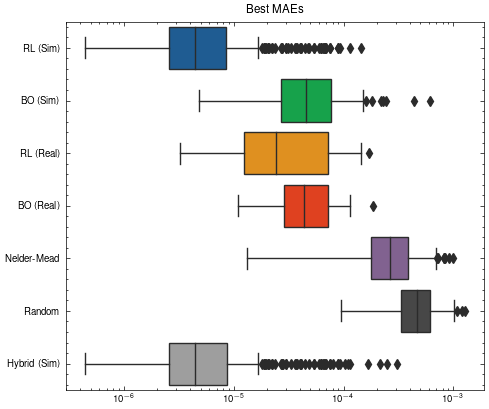

RL (Sim) -> 4.440665406946209e-06
BO (Sim) -> 4.5300330384634435e-05
RL (Real) -> 2.4461009161313996e-05
BO (Real) -> 4.3704212657758035e-05
Nelder-Mead -> 0.000266432500211522
Random -> 0.00046473575639538467
Hybrid (Sim) -> 4.465333404368721e-06


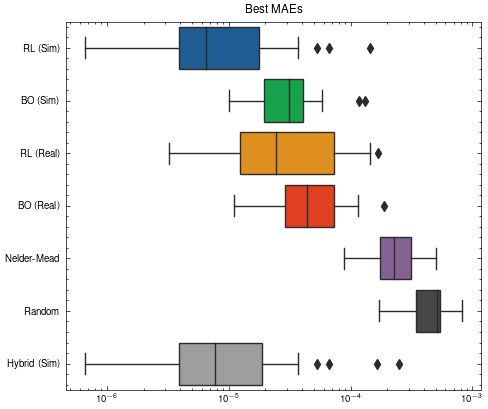

RL (Sim) -> 6.503757049358683e-06
BO (Sim) -> 3.129900142084807e-05
RL (Real) -> 2.4461009161313996e-05
BO (Real) -> 4.3704212657758035e-05
Nelder-Mead -> 0.00022602456738241017
Random -> 0.0005170294898562133
Hybrid (Sim) -> 7.731661753496155e-06


In [19]:
plot_best_mae_box(
    all_studies,
    save_path=f"{FIG_DIR}/final_best_mae.pdf",
)
for study in all_studies:
    print(f"{study.name} -> {study.median_best_mae()}")

plot_best_mae_box(
    problem_aligned(all_studies),
    save_path=f"{FIG_DIR}/final_best_mae.pdf",
)
for study in problem_aligned(all_studies):
    print(f"{study.name} -> {study.median_best_mae()}")


In [20]:
print("RMSEs")
print("---------")
for study in all_studies:
    print(f"{study.name} -> {study.rmse()}")

print("RMSEs (up to 50 steps / same length)")
print("---------")
for study in all_studies:
    print(f"{study.name} -> {study.rmse(max_steps=50)}")


RMSEs
---------
RL (Sim) -> 0.00014277943409979343
BO (Sim) -> 0.0008003075490705669
RL (Real) -> 0.00028150956495665014
BO (Real) -> 0.0006034207763150334
Nelder-Mead -> 0.0031316846143454313
Random -> 0.02318810671567917
Hybrid (Sim) -> 0.0001813468843465671
RMSEs (up to 50 steps / same length)
---------
RL (Sim) -> 0.0002401586389169097
BO (Sim) -> 0.0006557744345627725
RL (Real) -> 0.0002839517837855965
BO (Real) -> 0.0005772772128693759
Nelder-Mead -> 0.0051816110499203205
Random -> 0.022945400327444077
Hybrid (Sim) -> 0.00027352882898412645


### Beam size correlations


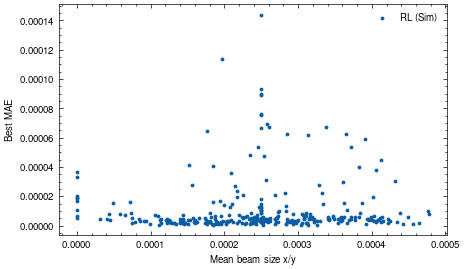

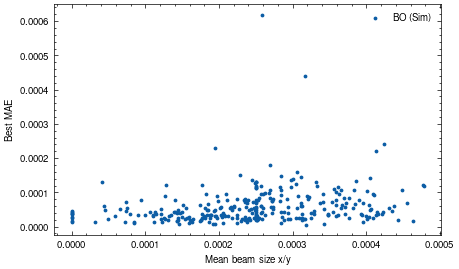

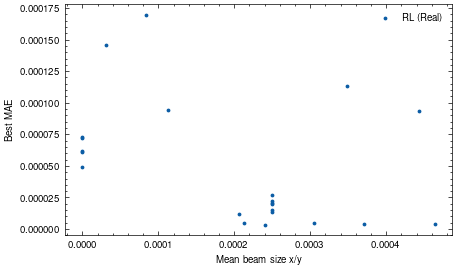

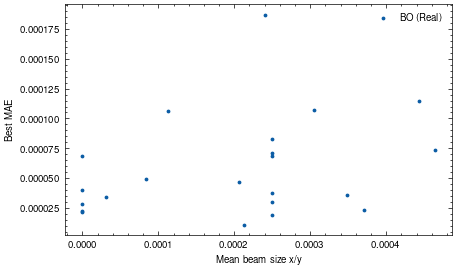

In [21]:
for study in [rl_sim, bo_sim, rl_real, bo_real]:
    study.plot_target_beam_size_mae_correlation()


### Trial correlations

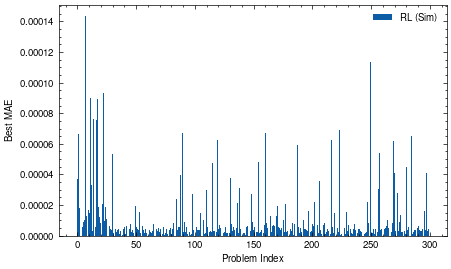

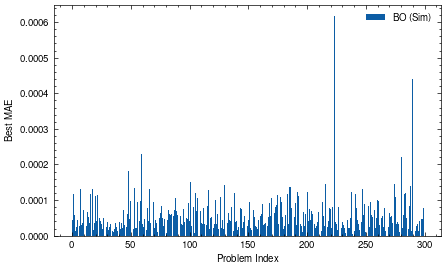

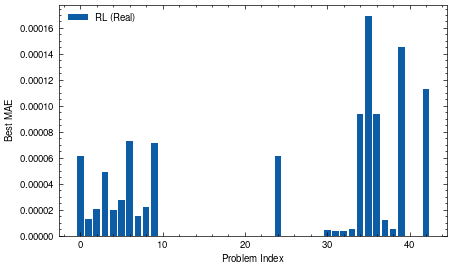

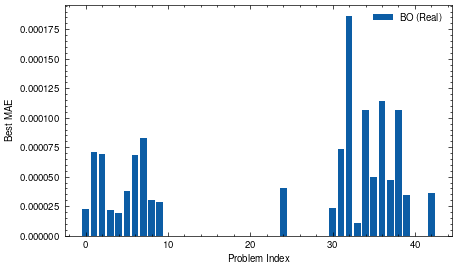

In [22]:
for study in [rl_sim, bo_sim, rl_real, bo_real]:
    study.plot_best_mae_over_problem()


### Who is better?

RL is better than BO in 289 / 300 cases


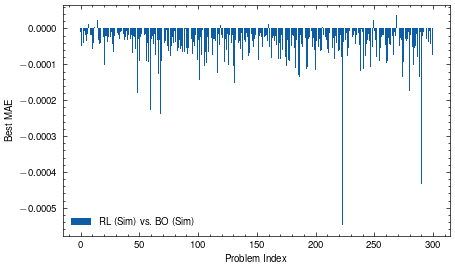

RL is better than BO in 13 / 22 cases


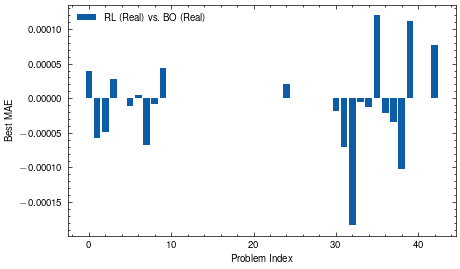

Hybrid is better than RL in 0 / 300 cases


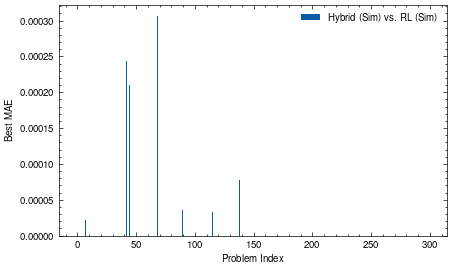

Hybrid is better than BO in 285 / 300 cases


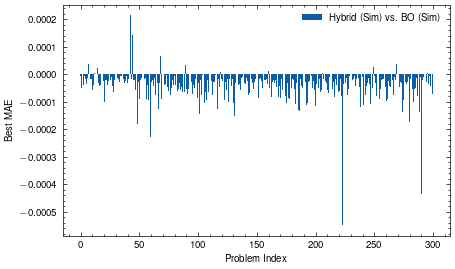

In [23]:
print(
    "RL is better than BO in"
    f" {number_of_better_final_beams(study_1=rl_sim, study_2=bo_sim)} /"
    f" {len(rl_sim)} cases"
)
plot_best_mae_diff_over_problem(
    study_1=rl_sim,
    study_2=bo_sim,
)

rl_real_aligned, bo_real_aligned = problem_aligned([rl_real, bo_real])
print(
    "RL is better than BO in"
    f" {number_of_better_final_beams(study_1=rl_real_aligned, study_2=bo_real_aligned)} /"
    f" {len(rl_real_aligned)} cases"
)
plot_best_mae_diff_over_problem(
    study_1=rl_real_aligned,
    study_2=bo_real_aligned,
)

print(
    "Hybrid is better than RL in"
    f" {number_of_better_final_beams(study_1=hybrid_sim, study_2=rl_sim)} /"
    f" {len(hybrid_sim)} cases"
)
plot_best_mae_diff_over_problem(
    study_1=hybrid_sim,
    study_2=rl_sim,
)

print(
    "Hybrid is better than BO in"
    f" {number_of_better_final_beams(study_1=hybrid_sim, study_2=bo_sim)} /"
    f" {len(hybrid_sim)} cases"
)
plot_best_mae_diff_over_problem(
    study_1=hybrid_sim,
    study_2=bo_sim,
)


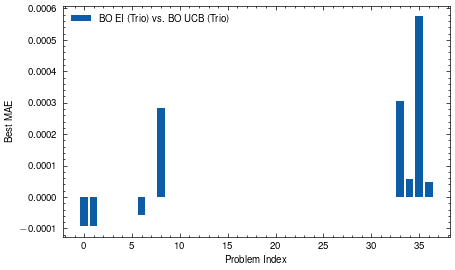

In [24]:
plot_best_mae_diff_over_problem(
    study_1=bo_real_2,
    study_2=bo_ucb_real_2,
)


### Hysteresis analysis

Median deviation = 1.2937394785694778e-05
Max deviation = 4.172931585344486e-05


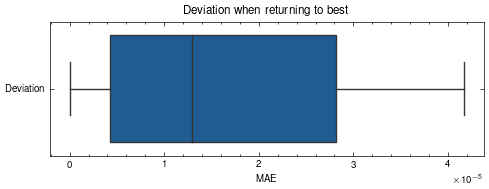

In [25]:
bo_real.plot_best_return_deviation_box(print_results=True)


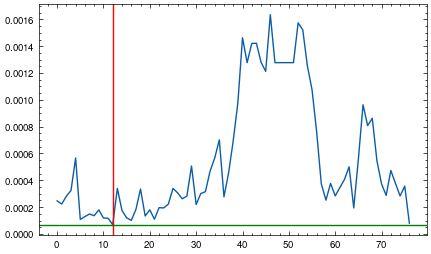

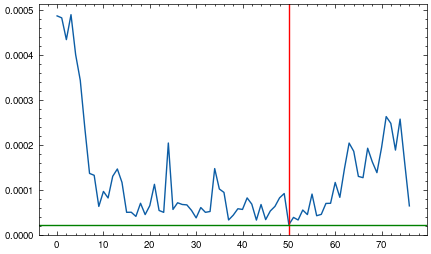

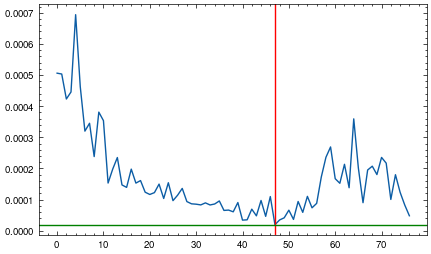

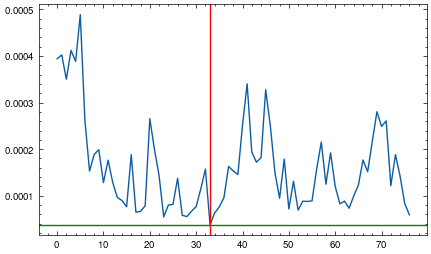

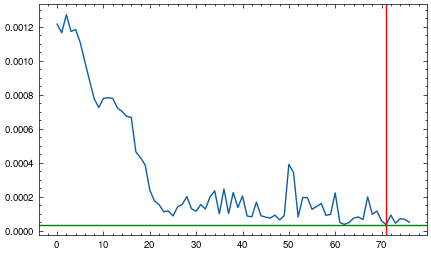

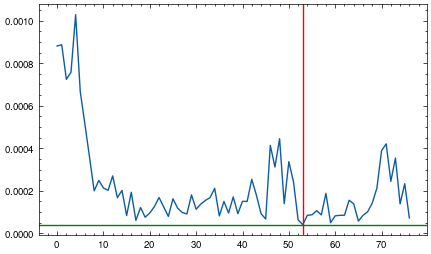

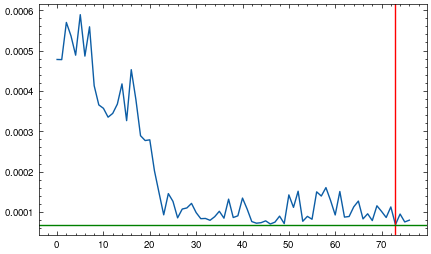

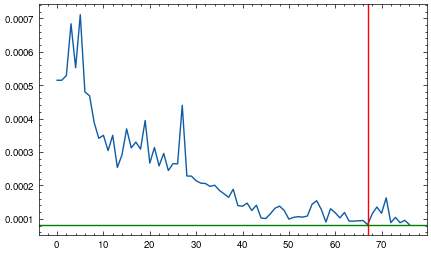

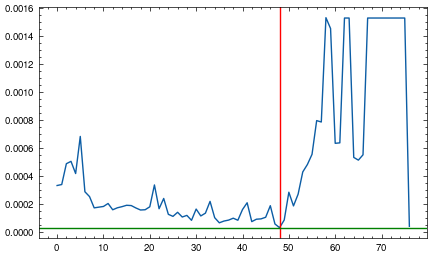

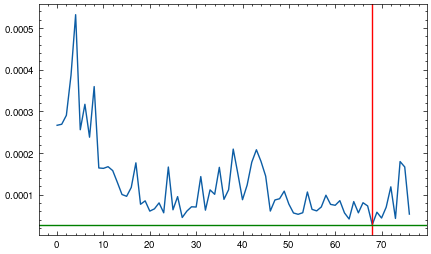

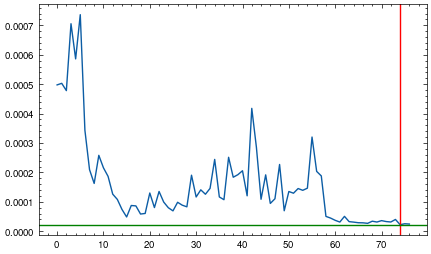

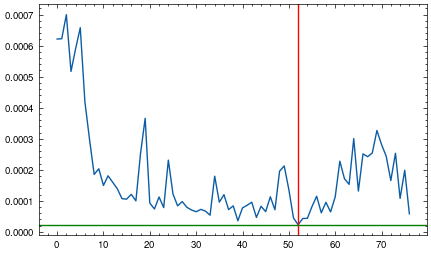

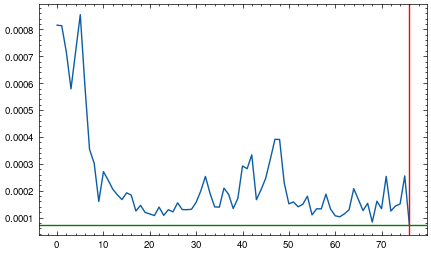

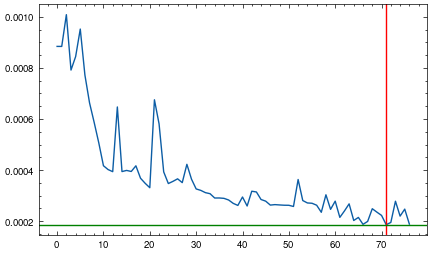

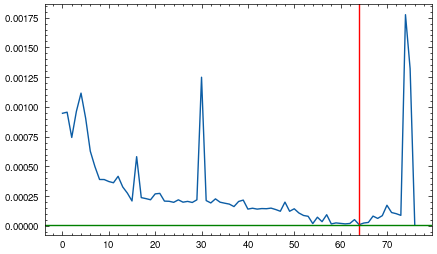

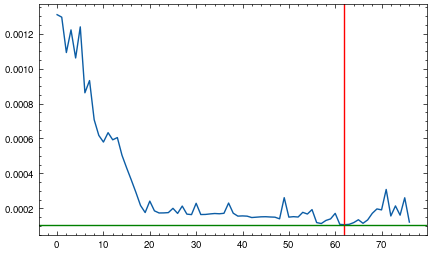

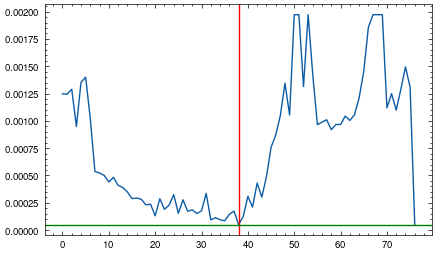

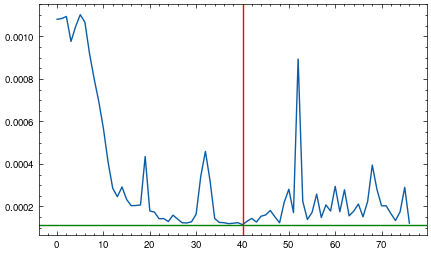

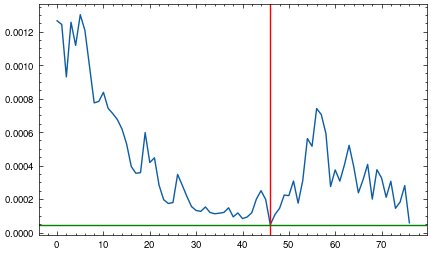

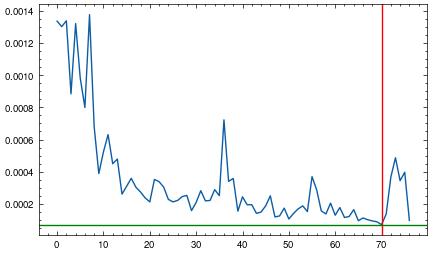

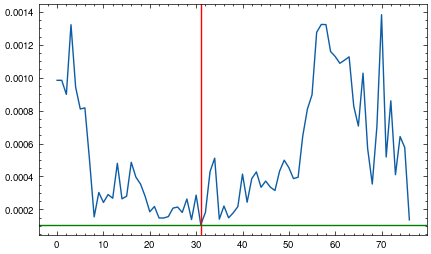

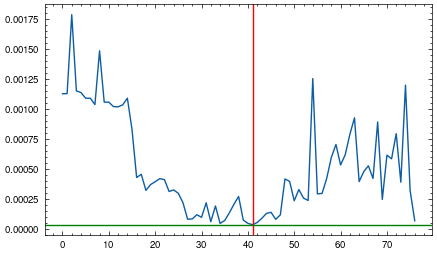

In [26]:
for episode in bo_real.episodes:
    episode.plot_best_return_deviation_example()


### Zero target episodes vs. non-zero target episodes

In [27]:
import numpy as np

size_maes = []
for episode in zero_sim.episodes:
    final = episode.observations[-1]["beam"] - episode.observations[-1]["target"]
    error = np.abs(final)
    size_mae = (error[1] + error[3]) / 2
    size_maes.append(size_mae)
print(np.mean(size_maes), np.std(size_maes))

sim_mean = np.mean(size_maes)

size_maes = []
for episode in zero_real.episodes:
    final = episode.observations[-1]["beam"] - episode.observations[-1]["target"]
    error = np.abs(final)
    size_mae = (error[1] + error[3]) / 2
    size_maes.append(size_mae)
print(np.mean(size_maes), np.std(size_maes))

real_mean = np.mean(size_maes)

print(real_mean / sim_mean)

print("-------------------")

size_maes = []
for episode in nonzero_sim.episodes:
    final = episode.observations[-1]["beam"] - episode.observations[-1]["target"]
    error = np.abs(final)
    size_mae = (error[1] + error[3]) / 2
    size_maes.append(size_mae)
print(np.mean(size_maes), np.std(size_maes))

sim_mean = np.mean(size_maes)

size_maes = []
for episode in nonzero_real.episodes:
    final = episode.observations[-1]["beam"] - episode.observations[-1]["target"]
    error = np.abs(final)
    size_mae = (error[1] + error[3]) / 2
    size_maes.append(size_mae)
print(np.mean(size_maes), np.std(size_maes))

real_mean = np.mean(size_maes)

print(real_mean / sim_mean)


3.4377415431663394e-05 2.055988913573149e-05
8.210670639527962e-05 8.668955951227786e-06
2.388390906189389
-------------------
2.0501491254088758e-05 4.0250234546855424e-05
7.589861214749843e-05 9.082033495598519e-05
3.702102018181796


In [28]:
aligned_zero_sim, aligned_zero_real = problem_aligned([zero_sim, zero_real])
aligned_nonzero_sim, aligned_nonzero_real = problem_aligned([nonzero_sim, nonzero_real])


def compute_size_mae(episode: Episode) -> float:
    final = episode.observations[-1]["beam"] - episode.observations[-1]["target"]
    error = np.abs(final)
    size_mae = (error[1] + error[3]) / 2
    return size_mae


for sim, real in zip(aligned_zero_sim.episodes, aligned_zero_real.episodes):
    sim_size_mae = compute_size_mae(sim)
    real_size_mae = compute_size_mae(real)
    print(
        f"{sim.problem_index} vs. {real.problem_index} ->"
        f" {real_size_mae / sim_size_mae = :.2f}"
    )

print("--------")

for sim, real in zip(aligned_nonzero_sim.episodes, aligned_nonzero_real.episodes):
    sim_size_mae = compute_size_mae(sim)
    real_size_mae = compute_size_mae(real)
    print(
        f"{sim.problem_index} vs. {real.problem_index} ->"
        f" {real_size_mae / sim_size_mae = :.2f}"
    )


0 vs. 0 -> real_size_mae / sim_size_mae = 0.94
3 vs. 3 -> real_size_mae / sim_size_mae = 4.56
6 vs. 6 -> real_size_mae / sim_size_mae = 5.82
9 vs. 9 -> real_size_mae / sim_size_mae = 3.06
24 vs. 24 -> real_size_mae / sim_size_mae = 2.53
--------
32 vs. 32 -> real_size_mae / sim_size_mae = 1.58
33 vs. 33 -> real_size_mae / sim_size_mae = 1.68
2 vs. 2 -> real_size_mae / sim_size_mae = 1.28
34 vs. 34 -> real_size_mae / sim_size_mae = 8.12
4 vs. 4 -> real_size_mae / sim_size_mae = 5.58
5 vs. 5 -> real_size_mae / sim_size_mae = 2.85
35 vs. 35 -> real_size_mae / sim_size_mae = 51.57
7 vs. 7 -> real_size_mae / sim_size_mae = 0.10
8 vs. 8 -> real_size_mae / sim_size_mae = 1.74
36 vs. 36 -> real_size_mae / sim_size_mae = 465.86
42 vs. 42 -> real_size_mae / sim_size_mae = 53.65
37 vs. 37 -> real_size_mae / sim_size_mae = 1.13
1 vs. 1 -> real_size_mae / sim_size_mae = 0.25
38 vs. 38 -> real_size_mae / sim_size_mae = 2.87
39 vs. 39 -> real_size_mae / sim_size_mae = 11.01
30 vs. 30 -> real_size_mae

In [29]:
nonzero_sim.get_episodes_by_problem(36)[0].observations[-1]["target"]


array([ 0.00130596,  0.00044123, -0.00148354,  0.00044417], dtype=float32)

In [30]:
nonzero_sim.get_episodes_by_problem(7)[0].observations[-1]["target"]


array([0.001 , 0.0005, 0.    , 0.    ], dtype=float32)

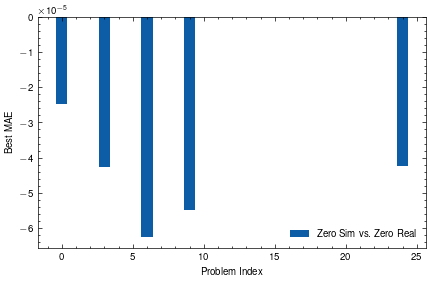

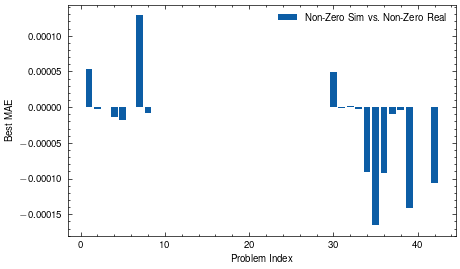

In [31]:
plot_best_mae_diff_over_problem(aligned_zero_sim, aligned_zero_real)
plot_best_mae_diff_over_problem(aligned_nonzero_sim, aligned_nonzero_real)


### Charge studies

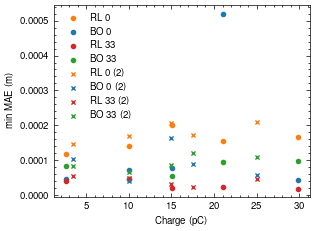

In [32]:
charges_pC = [2.6, 10.0, 21.0, 29.9, 15.1]

zero_over_charges_rl = Study(
    [episode for episode in charge_study_rl.episodes if episode.problem_index == 0]
)
zero_over_charges_bo = Study(
    [episode for episode in charge_study_bo.episodes if episode.problem_index == 0]
)
large_over_charges_rl = Study(
    [episode for episode in charge_study_rl.episodes if episode.problem_index == 33]
)
large_over_charges_bo = Study(
    [episode for episode in charge_study_bo.episodes if episode.problem_index == 33]
)

charges_pC_2 = [3.4, 15.0, 25.1, 10.0, 17.5]

zero_over_charges_rl_2 = Study(
    [episode for episode in charge_study_rl_2.episodes if episode.problem_index == 0]
)
zero_over_charges_bo_2 = Study(
    [episode for episode in charge_study_bo_2.episodes if episode.problem_index == 0]
)
large_over_charges_rl_2 = Study(
    [episode for episode in charge_study_rl_2.episodes if episode.problem_index == 33]
)
large_over_charges_bo_2 = Study(
    [episode for episode in charge_study_bo_2.episodes if episode.problem_index == 33]
)

plt.scatter(
    charges_pC,
    [min(episode.maes()) for episode in zero_over_charges_rl.episodes],
    label="RL 0",
    color="tab:orange",
)
plt.scatter(
    charges_pC,
    [min(episode.maes()) for episode in zero_over_charges_bo.episodes],
    label="BO 0",
    color="tab:blue",
)
plt.scatter(
    charges_pC,
    [min(episode.maes()) for episode in large_over_charges_rl.episodes],
    label="RL 33",
    color="tab:red",
)
plt.scatter(
    charges_pC,
    [min(episode.maes()) for episode in large_over_charges_bo.episodes],
    label="BO 33",
    color="tab:green",
)
plt.scatter(
    charges_pC_2,
    [min(episode.maes()) for episode in zero_over_charges_rl_2.episodes],
    label="RL 0 (2)",
    color="tab:orange",
    marker="x",
)
plt.scatter(
    charges_pC_2,
    [min(episode.maes()) for episode in zero_over_charges_bo_2.episodes],
    label="BO 0 (2)",
    color="tab:blue",
    marker="x",
)
plt.scatter(
    charges_pC_2,
    [min(episode.maes()) for episode in large_over_charges_rl_2.episodes],
    label="RL 33 (2)",
    color="tab:red",
    marker="x",
)
plt.scatter(
    charges_pC_2,
    [min(episode.maes()) for episode in large_over_charges_bo_2.episodes],
    label="BO 33 (2)",
    color="tab:green",
    marker="x",
)
plt.xlabel("Charge (pC)")
plt.ylabel("min MAE (m)")
plt.legend()
plt.show()


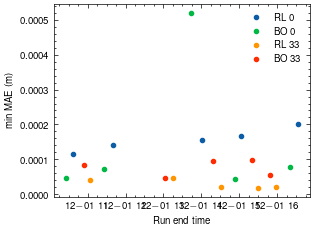

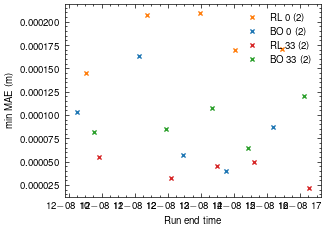

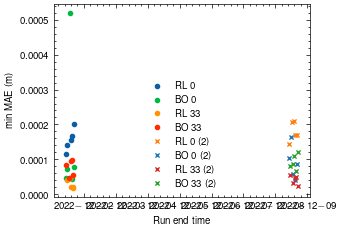

In [33]:
plt.scatter(
    [episode.t_end for episode in zero_over_charges_rl.episodes],
    [min(episode.maes()) for episode in zero_over_charges_rl.episodes],
    label="RL 0",
)
plt.scatter(
    [episode.t_end for episode in zero_over_charges_bo.episodes],
    [min(episode.maes()) for episode in zero_over_charges_bo.episodes],
    label="BO 0",
)
plt.scatter(
    [episode.t_end for episode in large_over_charges_rl.episodes],
    [min(episode.maes()) for episode in large_over_charges_rl.episodes],
    label="RL 33",
)
plt.scatter(
    [episode.t_end for episode in large_over_charges_bo.episodes],
    [min(episode.maes()) for episode in large_over_charges_bo.episodes],
    label="BO 33",
)
plt.xlabel("Run end time")
plt.ylabel("min MAE (m)")
plt.legend()
plt.show()

plt.scatter(
    [episode.t_end for episode in zero_over_charges_rl_2.episodes],
    [min(episode.maes()) for episode in zero_over_charges_rl_2.episodes],
    label="RL 0 (2)",
    color="tab:orange",
    marker="x",
)
plt.scatter(
    [episode.t_end for episode in zero_over_charges_bo_2.episodes],
    [min(episode.maes()) for episode in zero_over_charges_bo_2.episodes],
    label="BO 0 (2)",
    color="tab:blue",
    marker="x",
)
plt.scatter(
    [episode.t_end for episode in large_over_charges_rl_2.episodes],
    [min(episode.maes()) for episode in large_over_charges_rl_2.episodes],
    label="RL 33 (2)",
    color="tab:red",
    marker="x",
)
plt.scatter(
    [episode.t_end for episode in large_over_charges_bo_2.episodes],
    [min(episode.maes()) for episode in large_over_charges_bo_2.episodes],
    label="BO 33 (2)",
    color="tab:green",
    marker="x",
)
plt.xlabel("Run end time")
plt.ylabel("min MAE (m)")
plt.legend()
plt.show()

plt.scatter(
    [episode.t_end for episode in zero_over_charges_rl.episodes],
    [min(episode.maes()) for episode in zero_over_charges_rl.episodes],
    label="RL 0",
)
plt.scatter(
    [episode.t_end for episode in zero_over_charges_bo.episodes],
    [min(episode.maes()) for episode in zero_over_charges_bo.episodes],
    label="BO 0",
)
plt.scatter(
    [episode.t_end for episode in large_over_charges_rl.episodes],
    [min(episode.maes()) for episode in large_over_charges_rl.episodes],
    label="RL 33",
)
plt.scatter(
    [episode.t_end for episode in large_over_charges_bo.episodes],
    [min(episode.maes()) for episode in large_over_charges_bo.episodes],
    label="BO 33",
)
# plt.xlabel("Run end time")
# plt.ylabel("min MAE (m)")
# plt.legend()
# plt.show()

plt.scatter(
    [episode.t_end for episode in zero_over_charges_rl_2.episodes],
    [min(episode.maes()) for episode in zero_over_charges_rl_2.episodes],
    label="RL 0 (2)",
    color="tab:orange",
    marker="x",
)
plt.scatter(
    [episode.t_end for episode in zero_over_charges_bo_2.episodes],
    [min(episode.maes()) for episode in zero_over_charges_bo_2.episodes],
    label="BO 0 (2)",
    color="tab:blue",
    marker="x",
)
plt.scatter(
    [episode.t_end for episode in large_over_charges_rl_2.episodes],
    [min(episode.maes()) for episode in large_over_charges_rl_2.episodes],
    label="RL 33 (2)",
    color="tab:red",
    marker="x",
)
plt.scatter(
    [episode.t_end for episode in large_over_charges_bo_2.episodes],
    [min(episode.maes()) for episode in large_over_charges_bo_2.episodes],
    label="BO 33 (2)",
    color="tab:green",
    marker="x",
)
plt.xlabel("Run end time")
plt.ylabel("min MAE (m)")
plt.legend()
plt.show()


### Safe BO

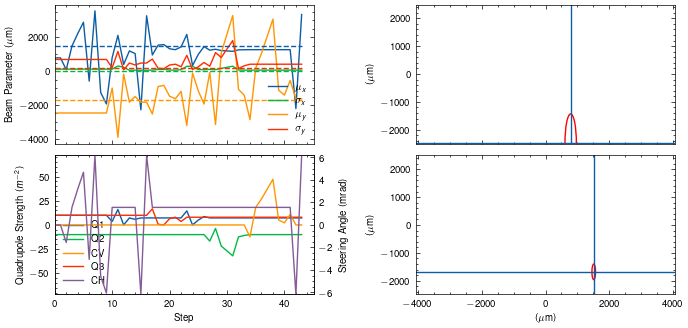

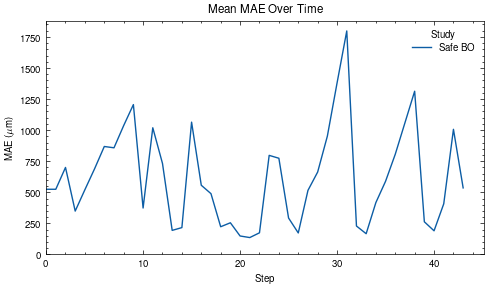

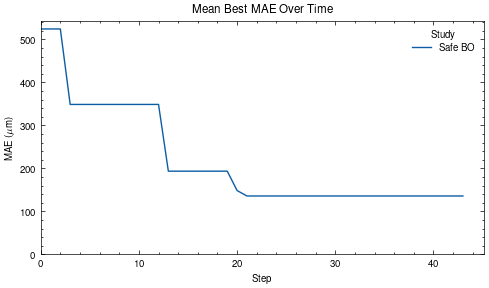

In [34]:
safe_bo_sim = Study.load(
    "data/bo_vs_rl/simulation/safe_bo", runs="problem_034", name="Safe BO"
)

safe_bo_sim.episodes[0].plot_summary()
plot_mae_over_time([safe_bo_sim])
plot_best_mae_over_time([safe_bo_sim])


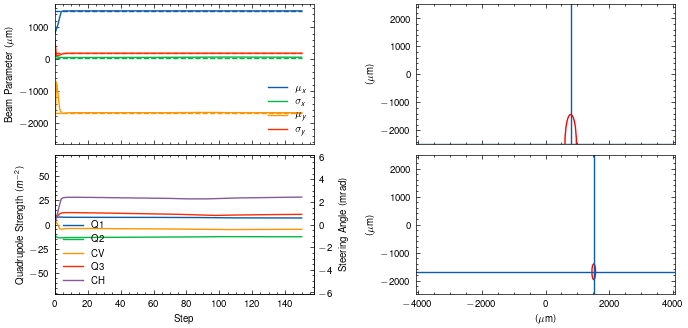

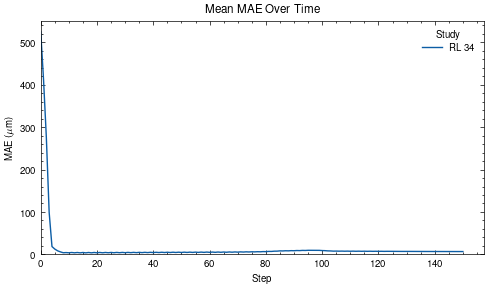

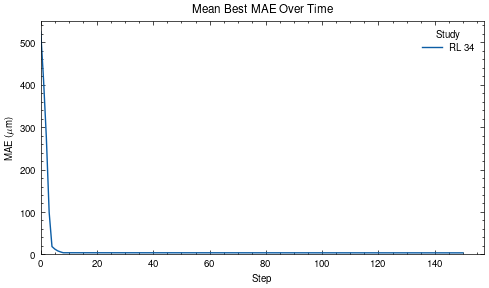

In [35]:
rl_34 = Study(
    [episode for episode in rl_sim.episodes if episode.problem_index == 34],
    name="RL 34",
)

rl_34.episodes[0].plot_summary()
plot_mae_over_time([rl_34])
plot_best_mae_over_time([rl_34])


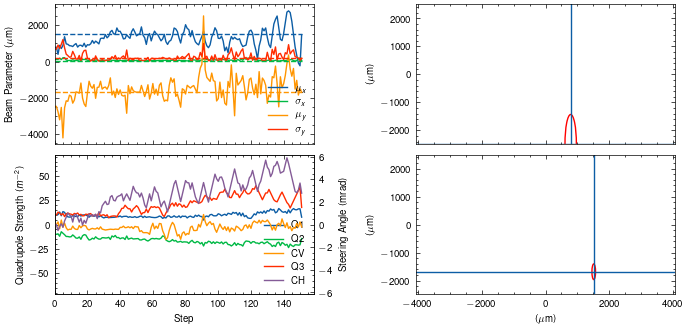

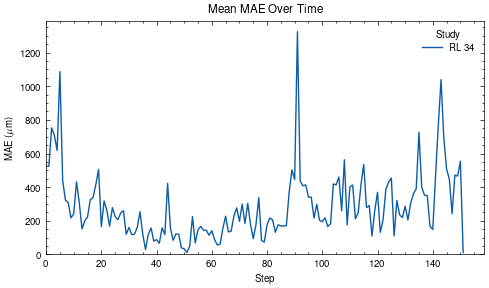

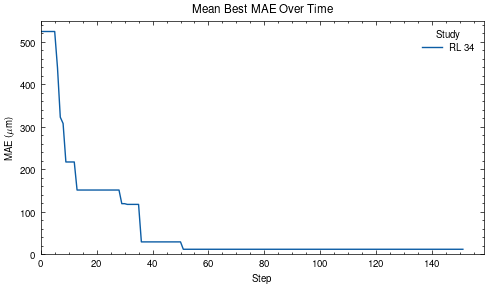

In [36]:
bo_34 = Study(
    [episode for episode in bo_sim.episodes if episode.problem_index == 34],
    name="RL 34",
)

bo_34.episodes[0].plot_summary()
plot_mae_over_time([bo_34])
plot_best_mae_over_time([bo_34])


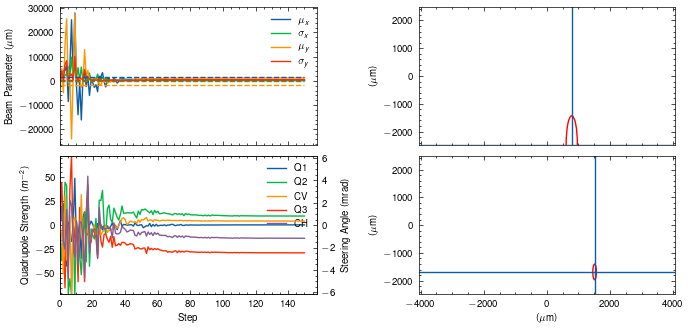

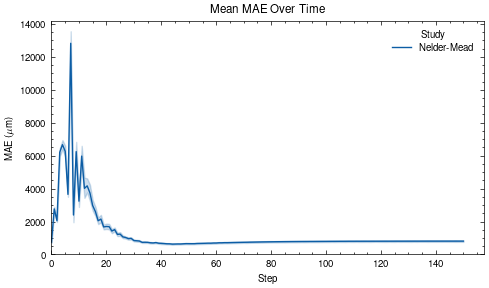

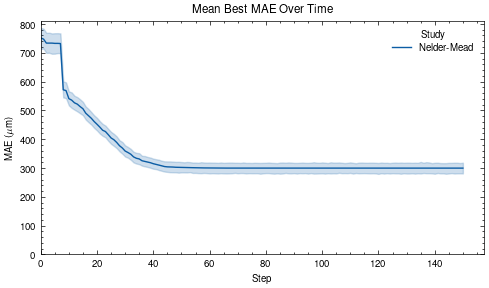

In [37]:
nelder_mead_sim.get_episodes_by_problem(34)[0].plot_summary()

plot_mae_over_time([nelder_mead_sim])
plot_best_mae_over_time([nelder_mead_sim])


### Further zero beam vs. other beams studies

In [38]:
problem_0_rl_real = Study.load(
    "data/bo_vs_rl/real/rl",
    runs="*_problem*_000",
    name="Trial 0 (RL)",
    drop_screen_images=True,
)
problem_0_bo_real = Study.load(
    "data/bo_vs_rl/real/bo",
    runs="*_problem*_000",
    name="Trial 0 (BO)",
    drop_screen_images=True,
)
problem_33_rl_real = Study.load(
    "data/bo_vs_rl/real/rl",
    runs="*_problem*_033",
    name="Trial 33 (RL)",
    drop_screen_images=True,
)
problem_33_bo_real = Study.load(
    "data/bo_vs_rl/real/bo",
    runs="*_problem*_033",
    name="Trial 33 (BO)",
    drop_screen_images=True,
)


In [39]:
print(f"{len(problem_0_rl_real) = }")
print(f"{len(problem_0_bo_real) = }")
print(f"{len(problem_33_rl_real) = }")
print(f"{len(problem_33_bo_real) = }")


len(problem_0_rl_real) = 23
len(problem_0_bo_real) = 24
len(problem_33_rl_real) = 20
len(problem_33_bo_real) = 22


In [40]:
start_times = [
    episode.t_start
    for study in [
        problem_0_rl_real,
        problem_0_bo_real,
        problem_33_rl_real,
        problem_33_bo_real,
    ]
    for episode in study.episodes
]
max(start_times) - min(start_times)


datetime.timedelta(days=105, seconds=19640, microseconds=181682)

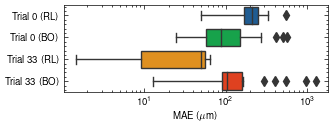

In [41]:
plot_final_mae_box(
    [problem_0_rl_real, problem_0_bo_real, problem_33_rl_real, problem_33_bo_real],
    title=None,
    figsize=(510 / 72.72 * 0.49, 510 / 72.72 * 0.49 * 0.1 * 4),
    save_path=f"{FIG_DIR}/maes_over_shifts.pdf",
)


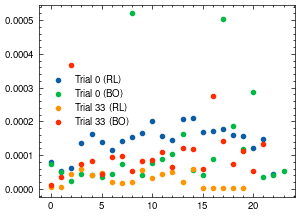

In [42]:
plt.scatter(
    range(len(problem_0_rl_real.episodes)),
    [min(episode.maes()) for episode in problem_0_rl_real.episodes],
    label=problem_0_rl_real.name,
)
plt.scatter(
    range(len(problem_0_bo_real.episodes)),
    [min(episode.maes()) for episode in problem_0_bo_real.episodes],
    label=problem_0_bo_real.name,
)
plt.scatter(
    range(len(problem_33_rl_real.episodes)),
    [min(episode.maes()) for episode in problem_33_rl_real.episodes],
    label=problem_33_rl_real.name,
)
plt.scatter(
    range(len(problem_33_bo_real.episodes)),
    [min(episode.maes()) for episode in problem_33_bo_real.episodes],
    label=problem_33_bo_real.name,
)
plt.legend()
plt.show()


In [43]:
sorted_problems = sorted(rl_real.problem_indicies())
sorted_episodes = [
    rl_real.get_episodes_by_problem(problem)[0] for problem in sorted_problems
]
final_min_maes = [episode.min_maes()[-1] for episode in sorted_episodes]

list(zip(sorted_problems, final_min_maes))


[(0, 6.166160164866596e-05),
 (1, 1.3177806067687925e-05),
 (2, 2.047203633992467e-05),
 (3, 4.906066169496626e-05),
 (4, 1.9877907107002102e-05),
 (5, 2.708476677071303e-05),
 (6, 7.286231266334653e-05),
 (7, 1.493725176260341e-05),
 (8, 2.183725155191496e-05),
 (9, 7.171634933911264e-05),
 (24, 6.118914461694658e-05),
 (30, 4.126715793972835e-06),
 (31, 3.852808731608093e-06),
 (32, 3.246586857130751e-06),
 (33, 4.813027771888301e-06),
 (34, 9.409036283614114e-05),
 (35, 0.0001694927050266415),
 (36, 9.354593930765986e-05),
 (37, 1.2204119229863863e-05),
 (38, 4.9297595978714526e-06),
 (39, 0.00014544001896865666),
 (42, 0.00011335502495057881)]

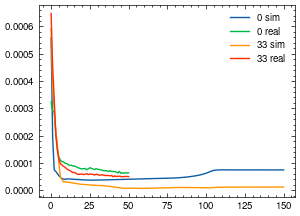

In [44]:
plt.plot(rl_sim.get_episodes_by_problem(0)[0].maes(), label="0 sim")
plt.plot(rl_real.get_episodes_by_problem(0)[0].maes(), label="0 real")
plt.plot(rl_sim.get_episodes_by_problem(3)[0].maes(), label="33 sim")
plt.plot(rl_real.get_episodes_by_problem(3)[0].maes(), label="33 real")
plt.legend()
plt.show()


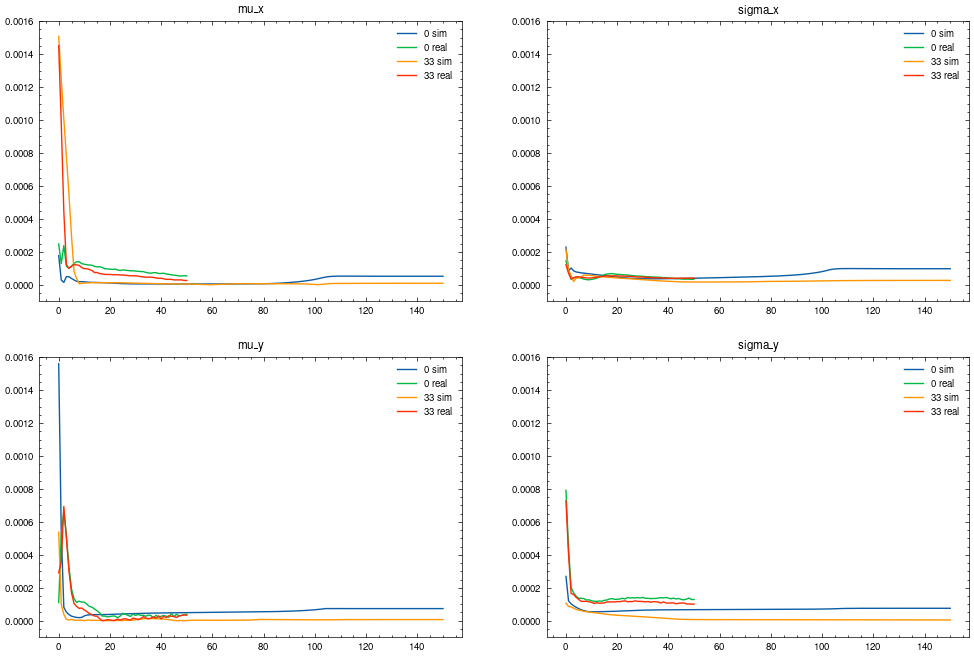

In [45]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title("mu_x")
plt.plot(
    rl_sim.get_episodes_by_problem(0)[0].abs_delta_beam_parameters()[:, 0],
    label="0 sim",
)
plt.plot(
    rl_real.get_episodes_by_problem(0)[0].abs_delta_beam_parameters()[:, 0],
    label="0 real",
)
plt.plot(
    rl_sim.get_episodes_by_problem(3)[0].abs_delta_beam_parameters()[:, 0],
    label="33 sim",
)
plt.plot(
    rl_real.get_episodes_by_problem(3)[0].abs_delta_beam_parameters()[:, 0],
    label="33 real",
)
plt.ylim(-1e-4, 0.0016)
plt.legend()
plt.subplot(222)
plt.title("sigma_x")
plt.plot(
    rl_sim.get_episodes_by_problem(0)[0].abs_delta_beam_parameters()[:, 1],
    label="0 sim",
)
plt.plot(
    rl_real.get_episodes_by_problem(0)[0].abs_delta_beam_parameters()[:, 1],
    label="0 real",
)
plt.plot(
    rl_sim.get_episodes_by_problem(3)[0].abs_delta_beam_parameters()[:, 1],
    label="33 sim",
)
plt.plot(
    rl_real.get_episodes_by_problem(3)[0].abs_delta_beam_parameters()[:, 1],
    label="33 real",
)
plt.ylim(-1e-4, 0.0016)
plt.legend()
plt.subplot(223)
plt.title("mu_y")
plt.plot(
    rl_sim.get_episodes_by_problem(0)[0].abs_delta_beam_parameters()[:, 2],
    label="0 sim",
)
plt.plot(
    rl_real.get_episodes_by_problem(0)[0].abs_delta_beam_parameters()[:, 2],
    label="0 real",
)
plt.plot(
    rl_sim.get_episodes_by_problem(3)[0].abs_delta_beam_parameters()[:, 2],
    label="33 sim",
)
plt.plot(
    rl_real.get_episodes_by_problem(3)[0].abs_delta_beam_parameters()[:, 2],
    label="33 real",
)
plt.ylim(-1e-4, 0.0016)
plt.legend()
plt.subplot(224)
plt.title("sigma_y")
plt.plot(
    rl_sim.get_episodes_by_problem(0)[0].abs_delta_beam_parameters()[:, 3],
    label="0 sim",
)
plt.plot(
    rl_real.get_episodes_by_problem(0)[0].abs_delta_beam_parameters()[:, 3],
    label="0 real",
)
plt.plot(
    rl_sim.get_episodes_by_problem(3)[0].abs_delta_beam_parameters()[:, 3],
    label="33 sim",
)
plt.plot(
    rl_real.get_episodes_by_problem(3)[0].abs_delta_beam_parameters()[:, 3],
    label="33 real",
)
plt.ylim(-1e-4, 0.0016)
plt.legend()
plt.show()


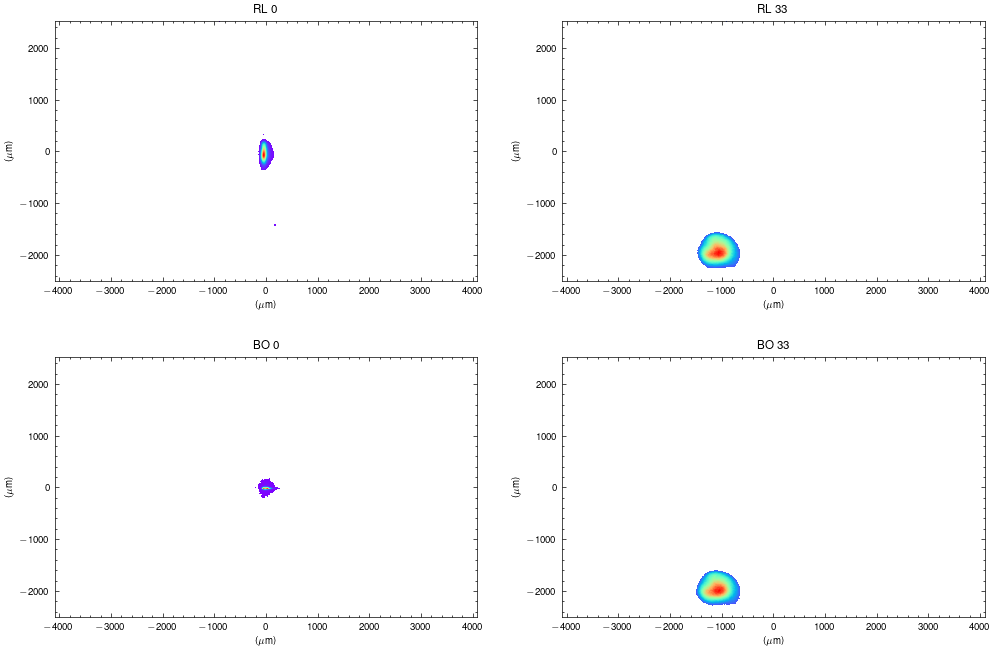

In [46]:
plt.figure(figsize=(12, 8))

ax = plt.subplot(221)
plt.title("RL 0")
episode = rl_real.get_episodes_by_problem(0)[0]
plot_screen_image(image=episode.infos[-1]["beam_image"], resolution=episode.infos[-1]["screen_resolution"], pixel_size=episode.infos[-1]["pixel_size"], ax=ax)

ax = plt.subplot(222)
plt.title("RL 33")
episode = rl_real.get_episodes_by_problem(33)[0]
plot_screen_image(image=episode.infos[-1]["beam_image"], resolution=episode.infos[-1]["screen_resolution"], pixel_size=episode.infos[-1]["pixel_size"], ax=ax)

ax = plt.subplot(223)
plt.title("BO 0")
episode = bo_real.get_episodes_by_problem(0)[0]
plot_screen_image(image=episode.infos[-1]["beam_image"], resolution=episode.infos[-1]["screen_resolution"], pixel_size=episode.infos[-1]["pixel_size"], ax=ax)

ax = plt.subplot(224)
plt.title("BO 33")
episode = bo_real.get_episodes_by_problem(33)[0]
plot_screen_image(image=episode.infos[-1]["beam_image"], resolution=episode.infos[-1]["screen_resolution"], pixel_size=episode.infos[-1]["pixel_size"], ax=ax)
plt.show()


In [47]:
real_rl_zeros = Study.load(
    "data/bo_vs_rl/real/rl/",
    runs="*_problem*000",
    name="Real RL Zeros",
)
real_bo_zeros = Study.load(
    "data/bo_vs_rl/real/bo/",
    runs="*_problem*000",
    name="Real BO Zeros",
)
real_rl_33s = Study.load(
    "data/bo_vs_rl/real/rl/",
    runs="*_problem*033",
    name="Real RL 33s",
)
real_bo_33s = Study.load(
    "data/bo_vs_rl/real/bo/",
    runs="*_problem*033",
    name="Real BO 33s",
)


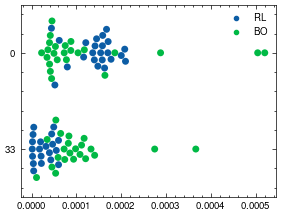

In [48]:
final_maes_rl_0 = [episode.min_maes()[-1] for episode in real_rl_zeros.episodes]
final_maes_bo_0 = [episode.min_maes()[-1] for episode in real_bo_zeros.episodes]
final_maes_rl_33 = [episode.min_maes()[-1] for episode in real_rl_33s.episodes]
final_maes_bo_33 = [episode.min_maes()[-1] for episode in real_bo_33s.episodes]
sns.swarmplot(
    x=final_maes_rl_0 + final_maes_bo_0 + final_maes_rl_33 + final_maes_bo_33,
    y=["0"] * len(final_maes_rl_0)
    + ["0"] * len(final_maes_bo_0)
    + ["33"] * len(final_maes_rl_33)
    + ["33"] * len(final_maes_bo_33),
    hue=["RL"] * len(final_maes_rl_0)
    + ["BO"] * len(final_maes_bo_0)
    + ["RL"] * len(final_maes_rl_33)
    + ["BO"] * len(final_maes_bo_33),
)
plt.show()


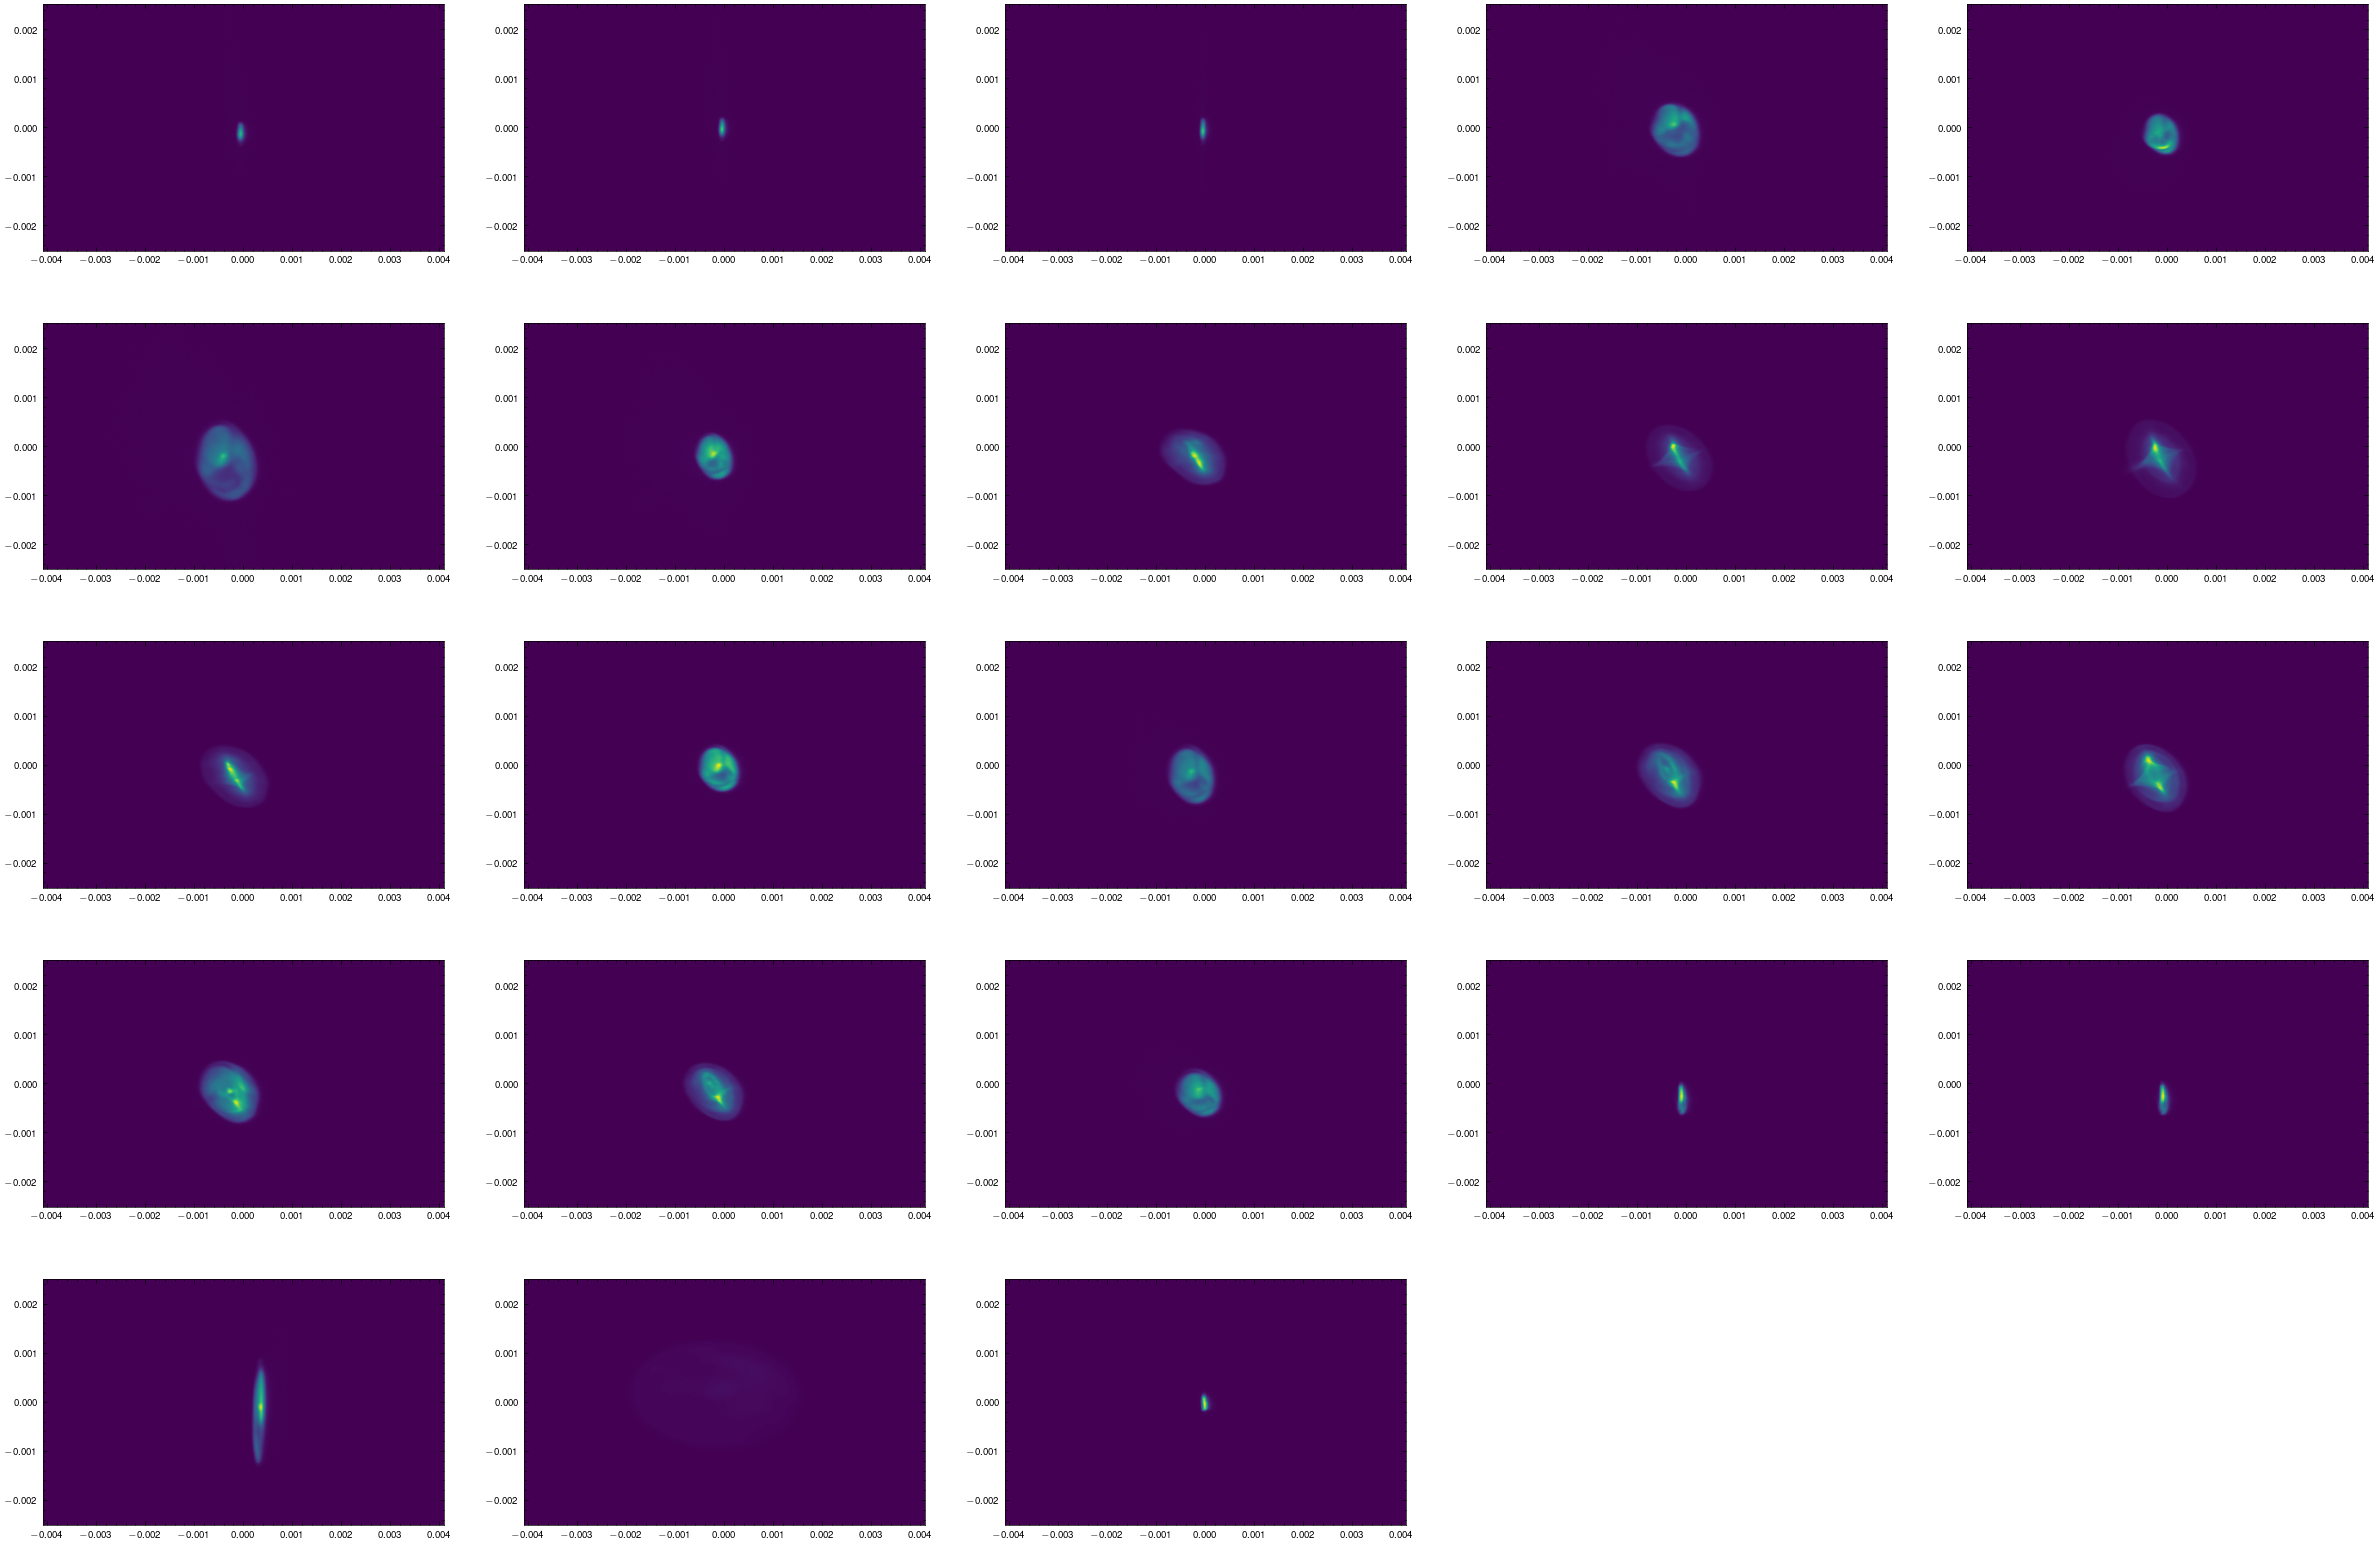

In [49]:
study = real_rl_zeros

n_plots_on_edge = int(np.ceil(np.sqrt(len(study.episodes))))
plt.figure(figsize=(n_plots_on_edge * 6, n_plots_on_edge * 4))
for i, episode in enumerate(study.episodes):
    plt.subplot(n_plots_on_edge, n_plots_on_edge, i + 1)
    plt.imshow(
        episode.infos[-1]["beam_image"],
        extent=screen_extent(
            episode.infos[-1]["screen_resolution"],
            episode.infos[-1]["pixel_size"],
        ),
    )
plt.show()


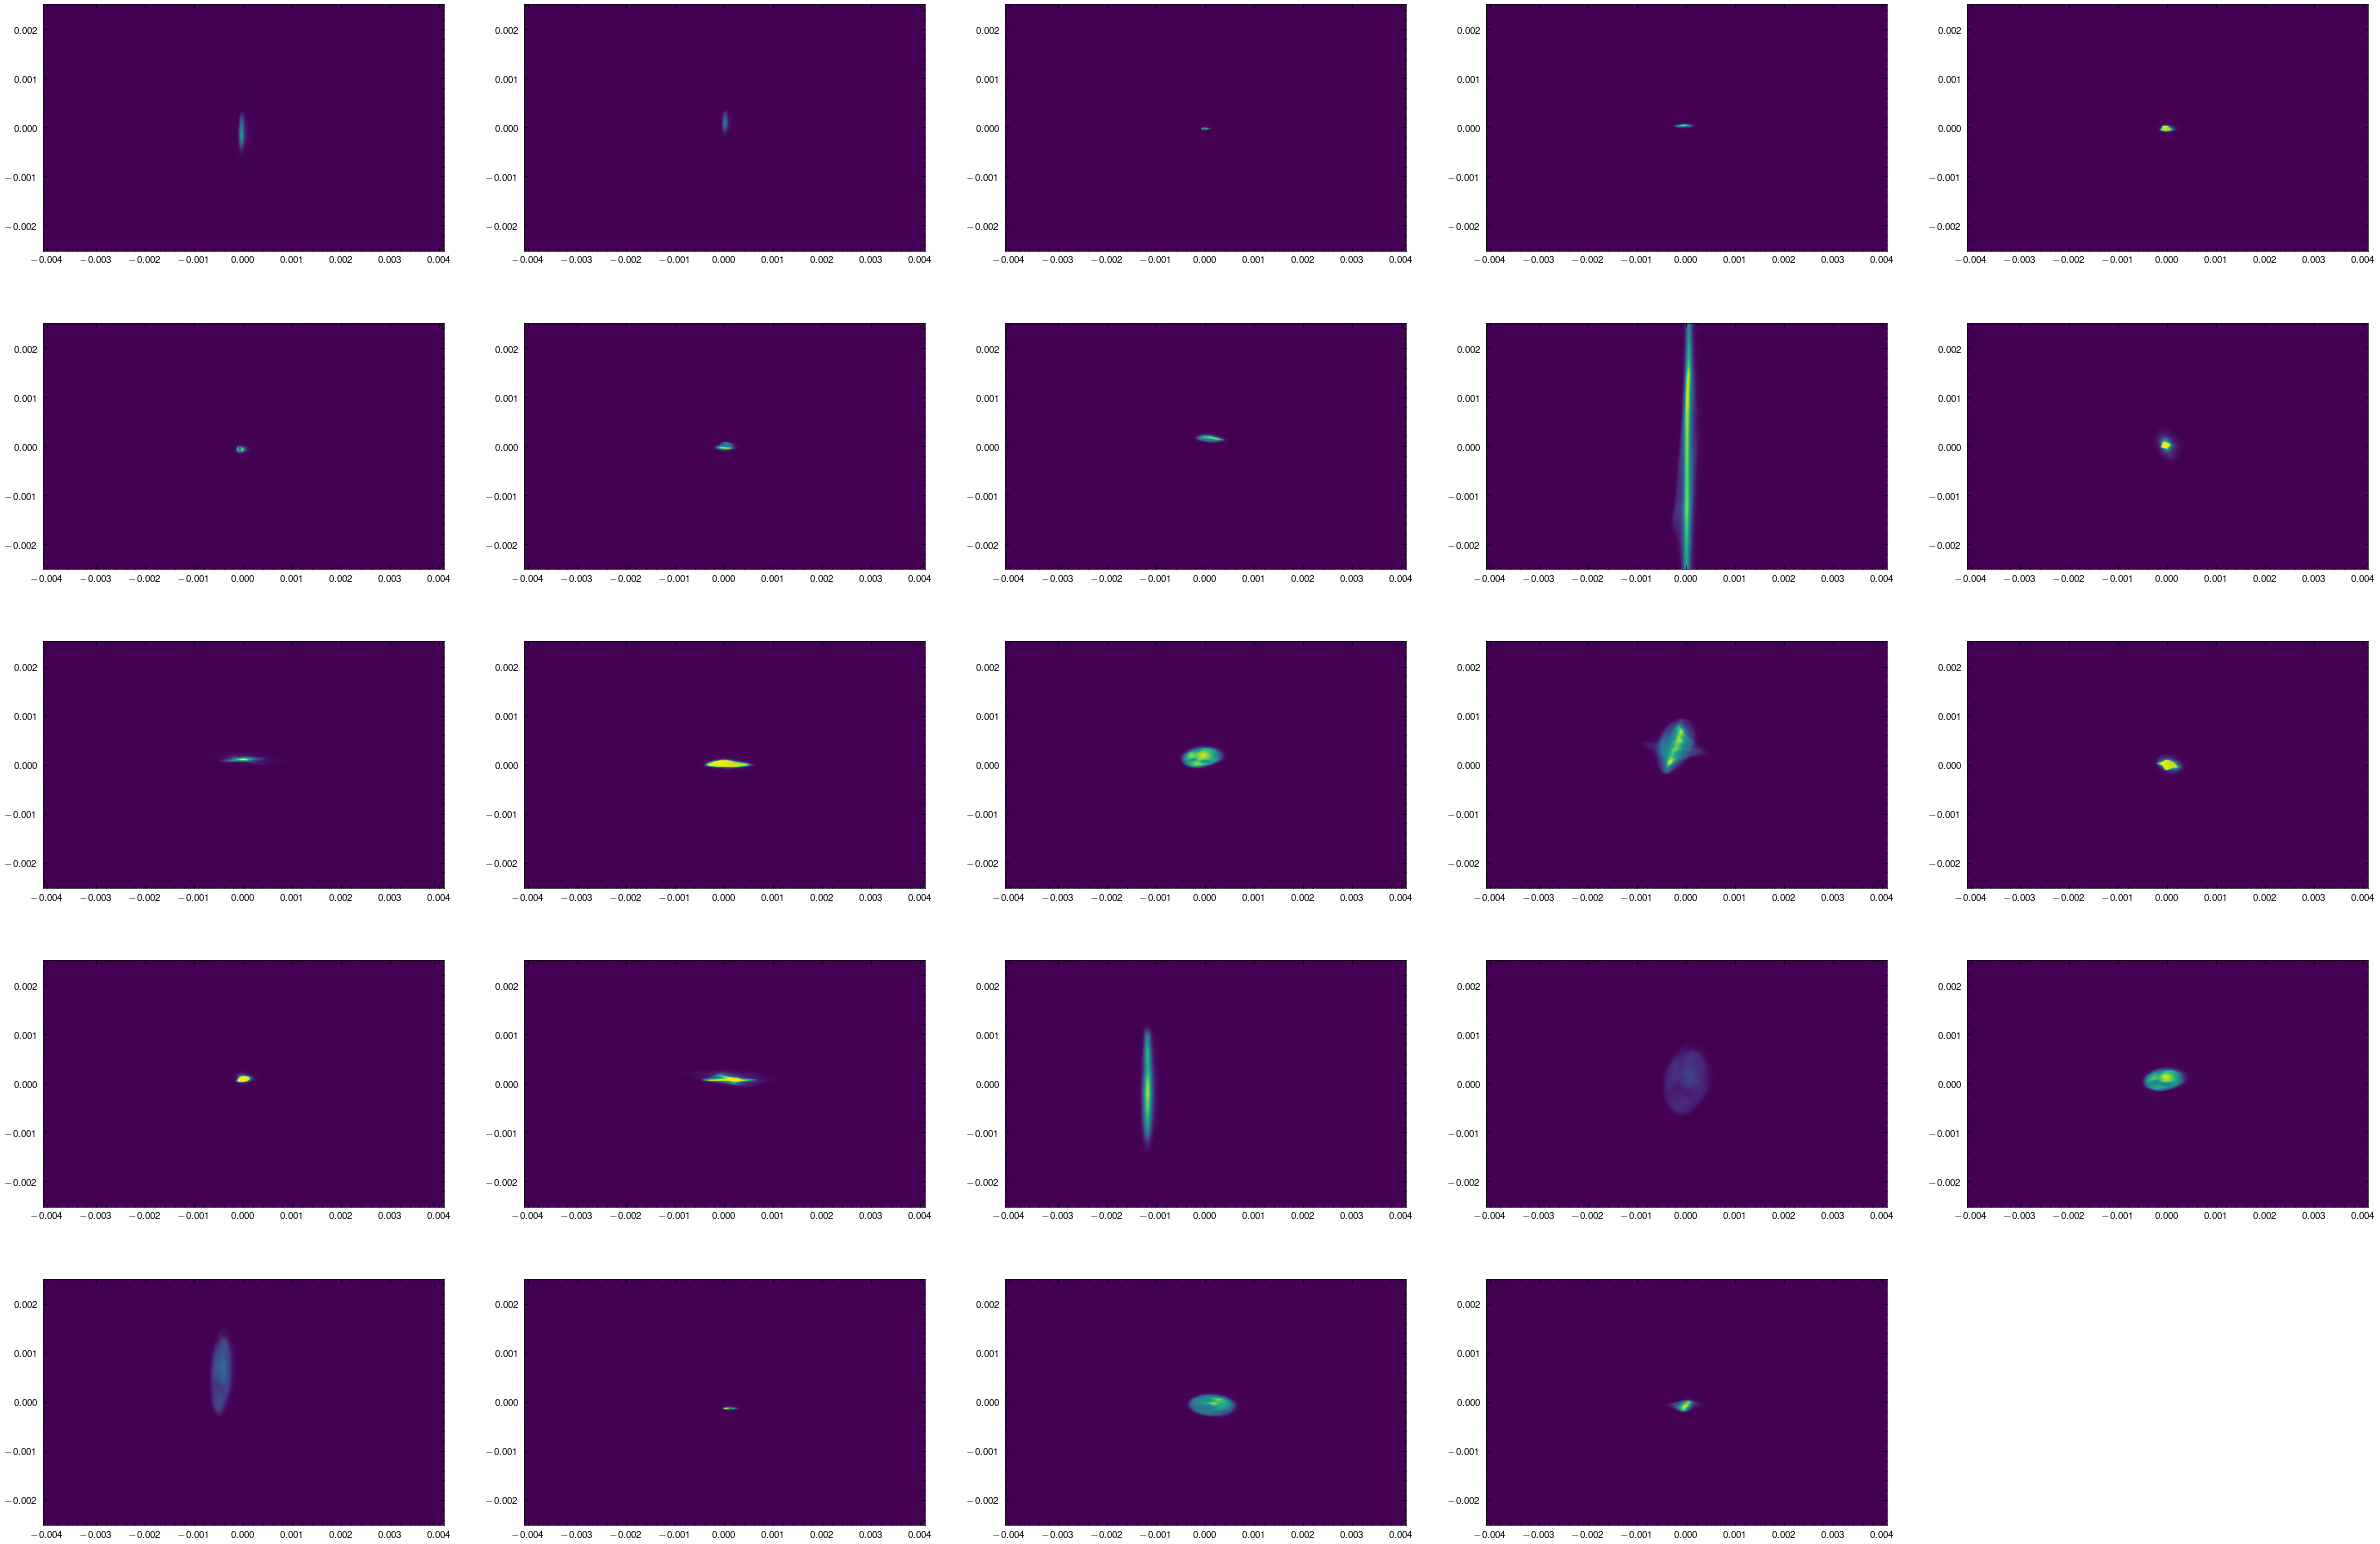

In [50]:
study = real_bo_zeros

n_plots_on_edge = int(np.ceil(np.sqrt(len(study.episodes))))
plt.figure(figsize=(n_plots_on_edge * 6, n_plots_on_edge * 4))
for i, episode in enumerate(study.episodes):
    plt.subplot(n_plots_on_edge, n_plots_on_edge, i + 1)
    plt.imshow(
        episode.infos[-1]["beam_image"],
        extent=screen_extent(
            episode.infos[-1]["screen_resolution"],
            episode.infos[-1]["pixel_size"],
        ),
    )
plt.show()


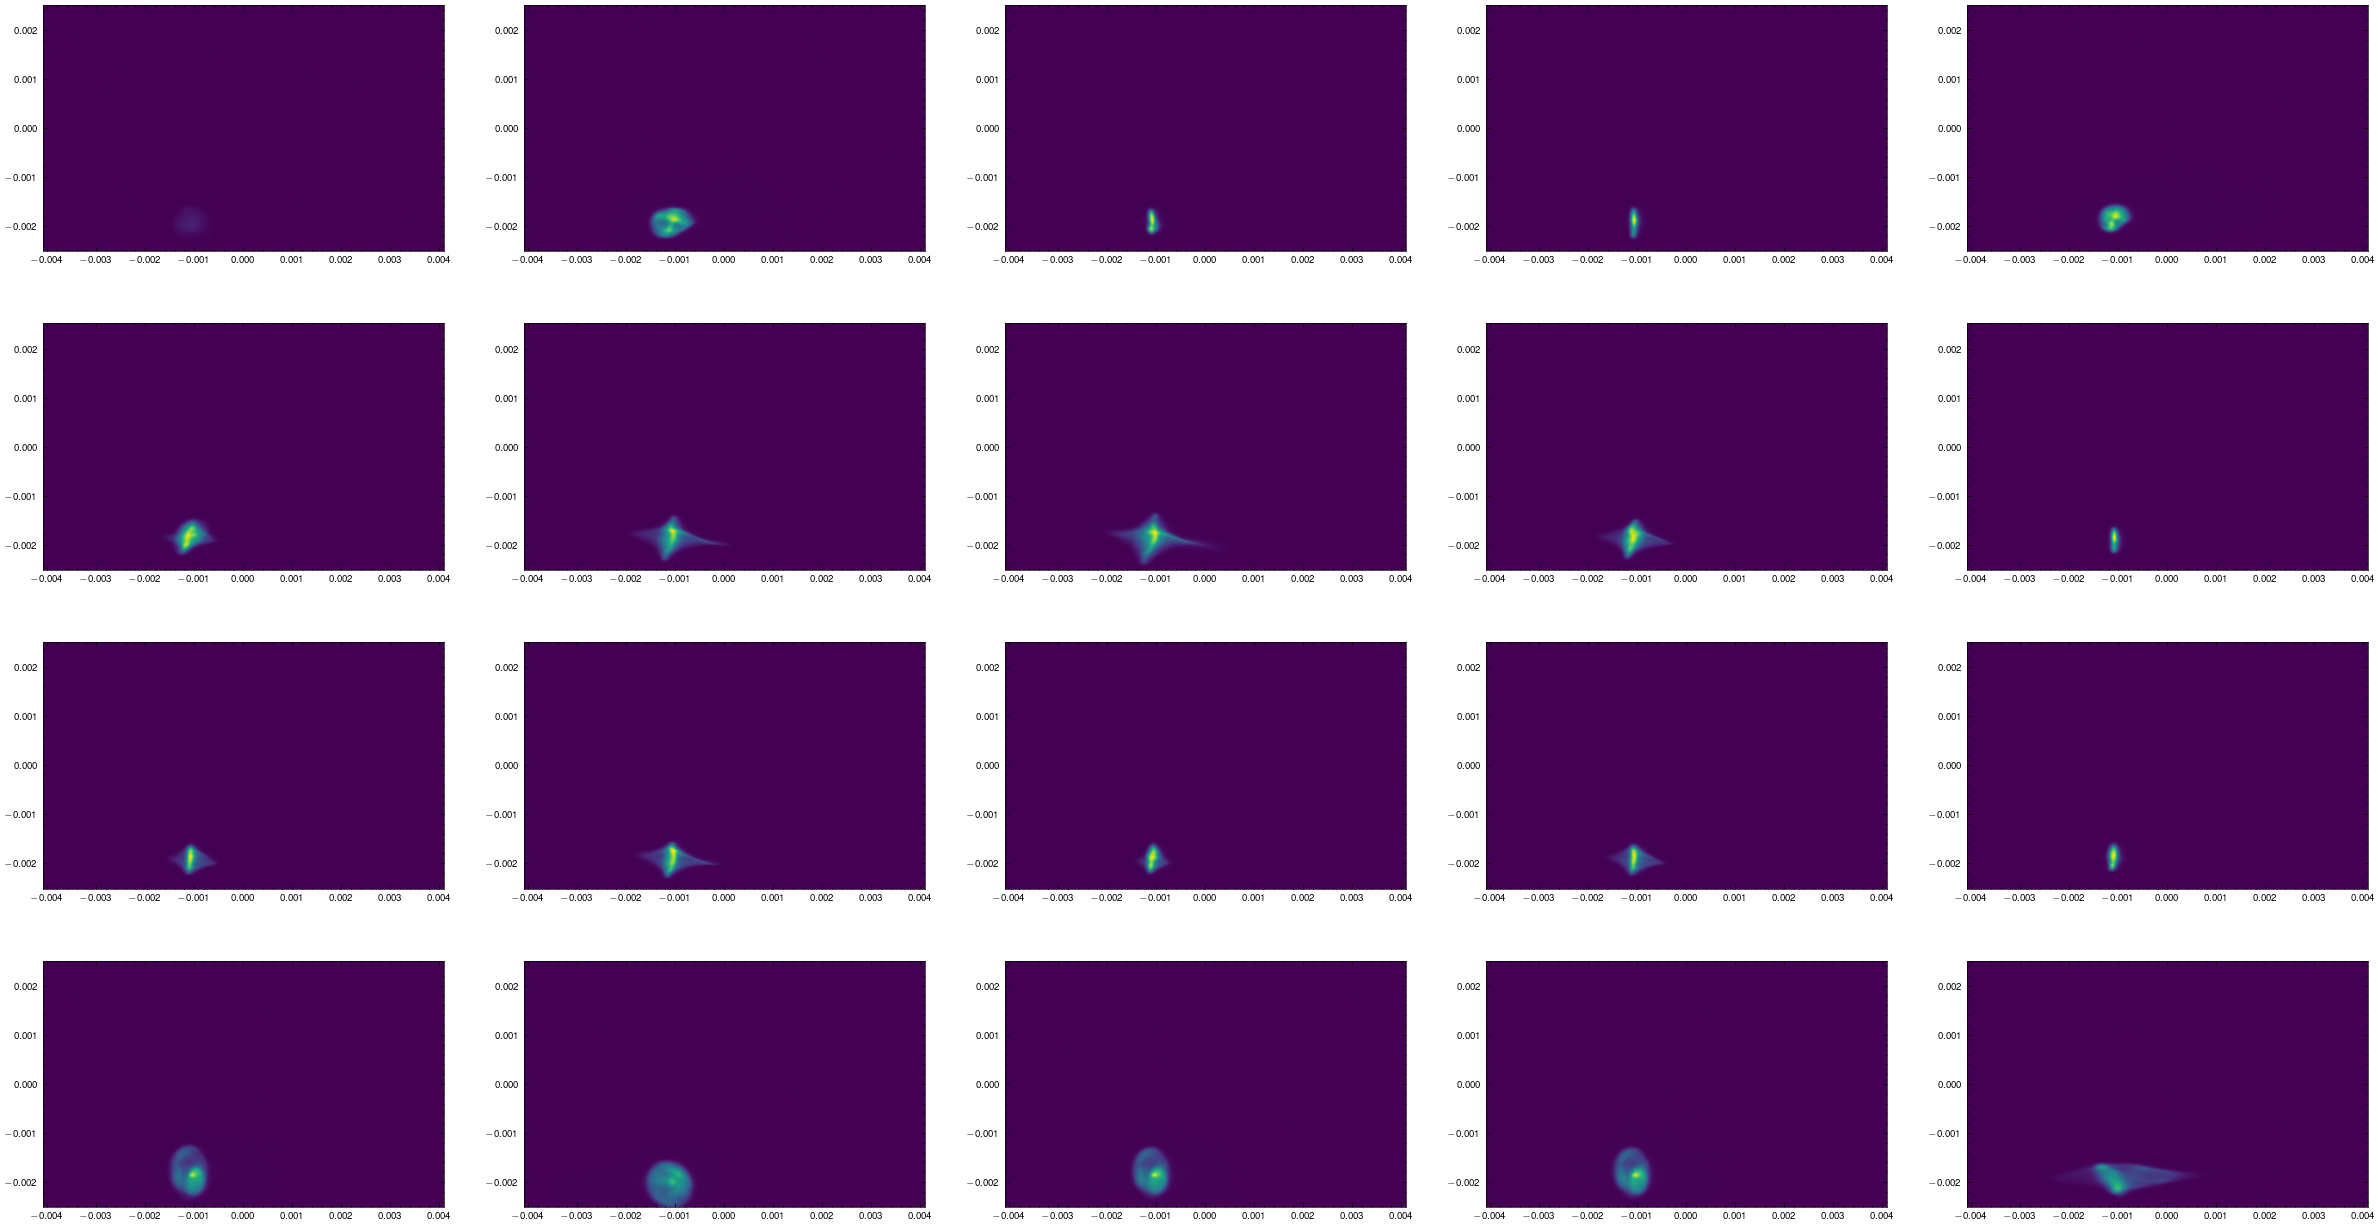

In [51]:
study = real_rl_33s

n_plots_on_edge = int(np.ceil(np.sqrt(len(study.episodes))))
plt.figure(figsize=(n_plots_on_edge * 6, n_plots_on_edge * 4))
for i, episode in enumerate(study.episodes):
    plt.subplot(n_plots_on_edge, n_plots_on_edge, i + 1)
    plt.imshow(
        episode.infos[-1]["beam_image"],
        extent=screen_extent(
            episode.infos[-1]["screen_resolution"],
            episode.infos[-1]["pixel_size"],
        ),
    )
plt.show()


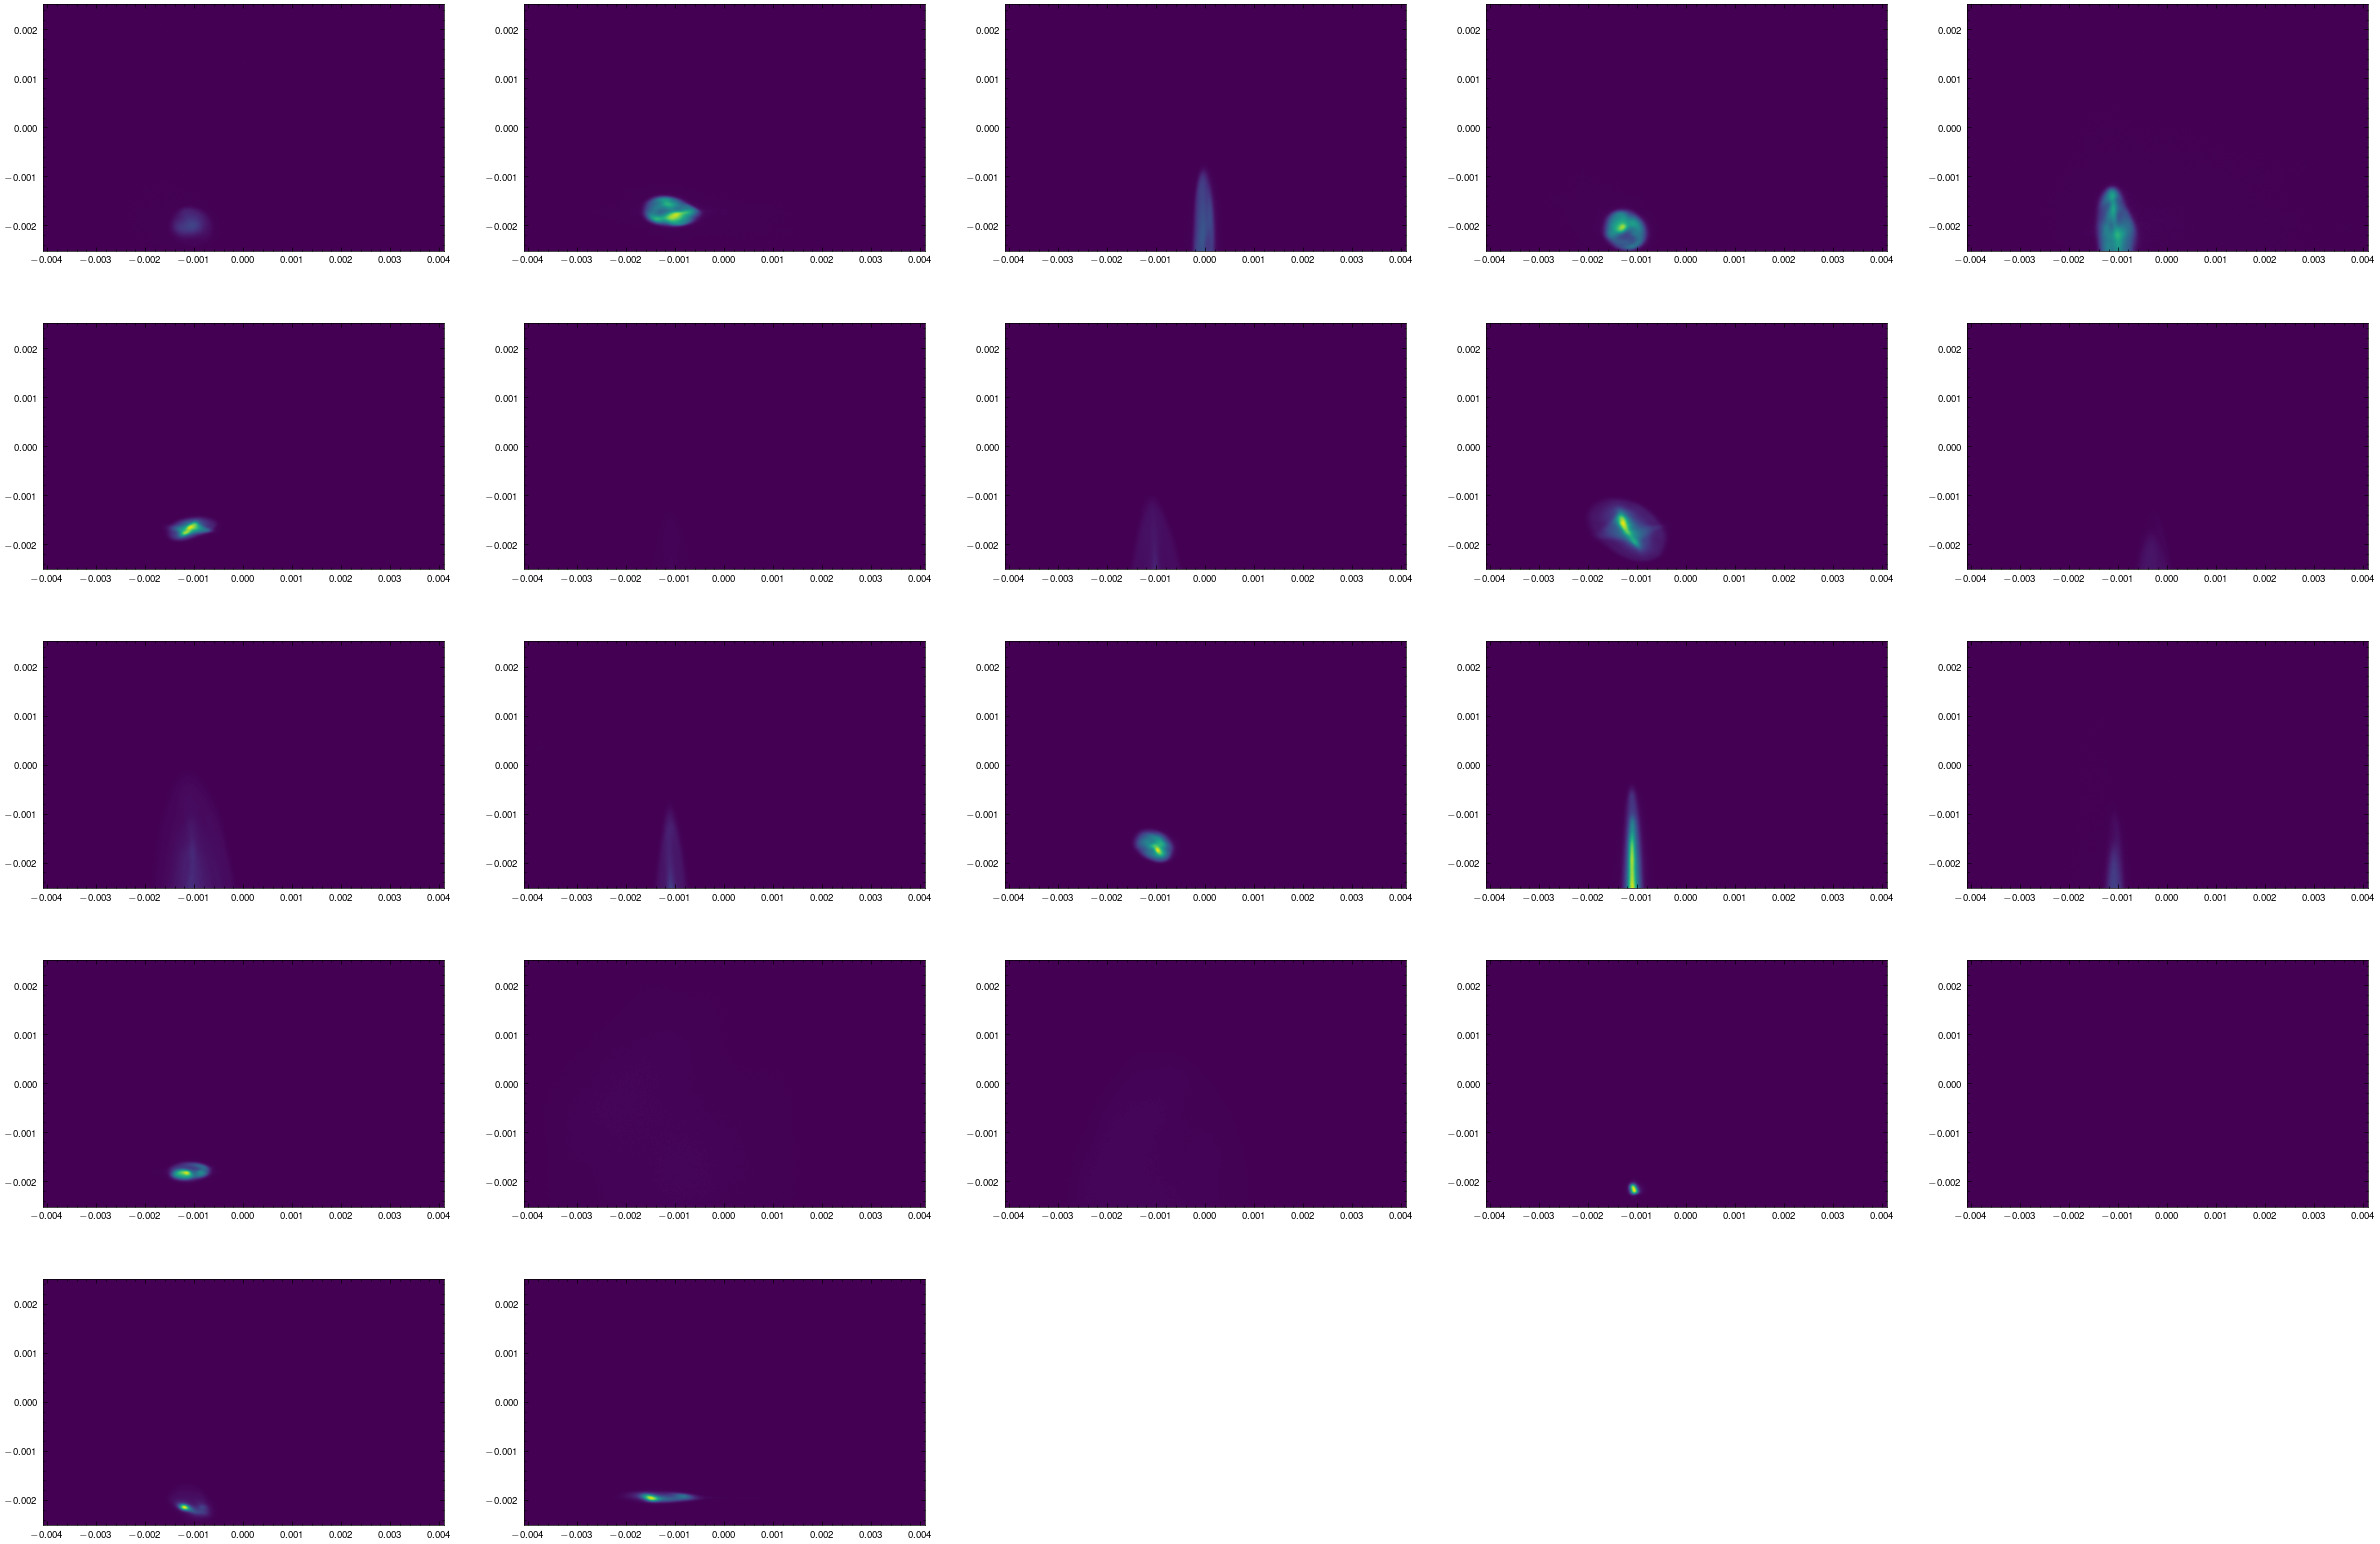

In [52]:
study = real_bo_33s

n_plots_on_edge = int(np.ceil(np.sqrt(len(study.episodes))))
plt.figure(figsize=(n_plots_on_edge * 6, n_plots_on_edge * 4))
for i, episode in enumerate(study.episodes):
    plt.subplot(n_plots_on_edge, n_plots_on_edge, i + 1)
    plt.imshow(
        episode.infos[-1]["beam_image"],
        extent=screen_extent(
            episode.infos[-1]["screen_resolution"],
            episode.infos[-1]["pixel_size"],
        ),
    )
plt.show()


### Feedback studies

In [53]:
rl_disturbance = Study.load(
    "data/bo_vs_rl/real/rl/",
    runs="20221220*_problemx_*",
    name="RL Disturbance",
    drop_screen_images=True,
)
bo_disturbance = Study.load(
    "data/bo_vs_rl/real/bo/",
    runs="20221220*_problemx_*",
    name="BO Disturbance",
    drop_screen_images=True,
)


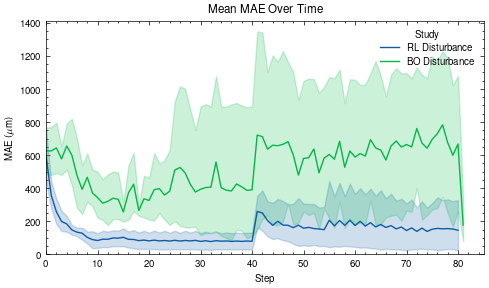

In [54]:
plot_mae_over_time([rl_disturbance, bo_disturbance])


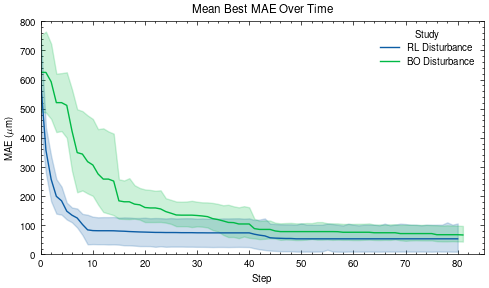

In [55]:
plot_best_mae_over_time([rl_disturbance, bo_disturbance])


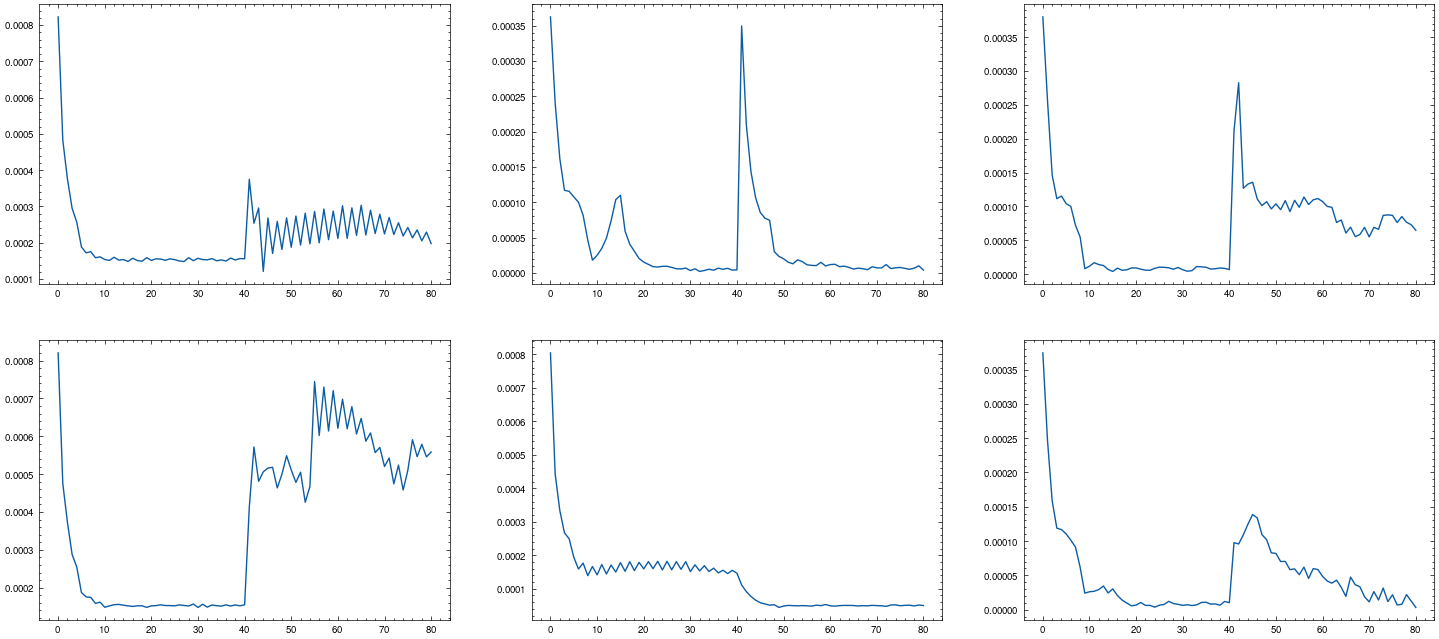

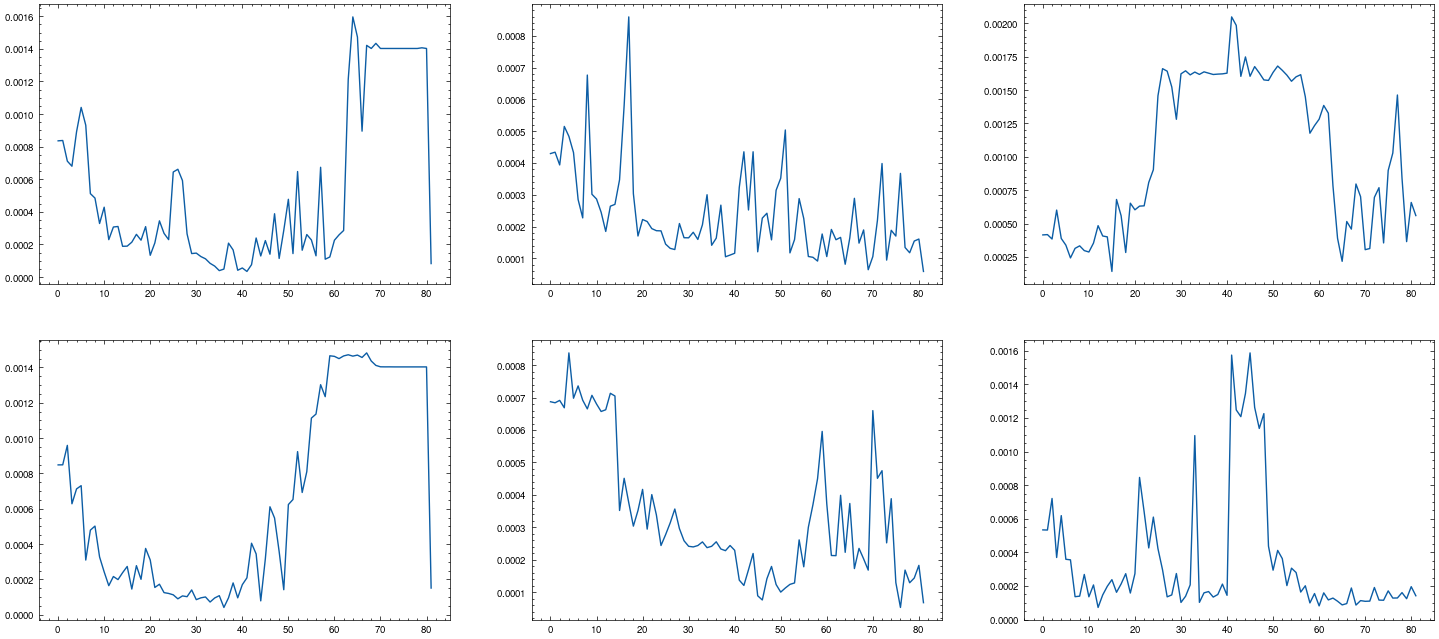

In [56]:
plt.figure(figsize=(6 * 3, 4 * 2))
for i, episode in enumerate(rl_disturbance.episodes):
    plt.subplot(2, 3, i + 1)
    plt.plot(episode.maes())
plt.show()

plt.figure(figsize=(6 * 3, 4 * 2))
for i, episode in enumerate(bo_disturbance.episodes):
    plt.subplot(2, 3, i + 1)
    plt.plot(episode.maes())
plt.show()


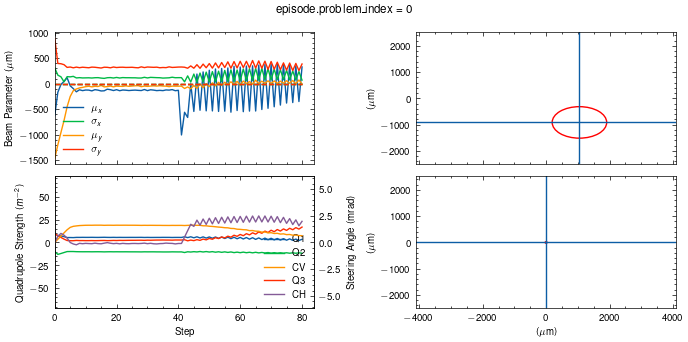

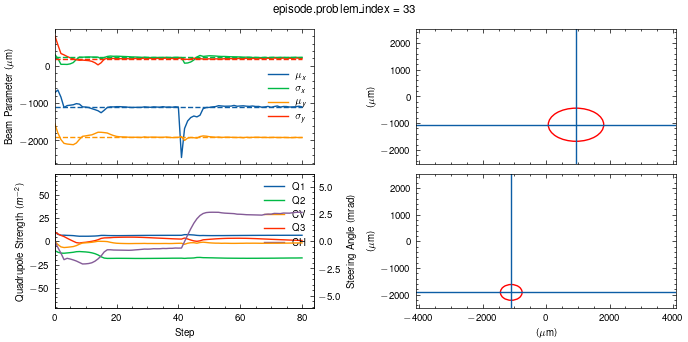

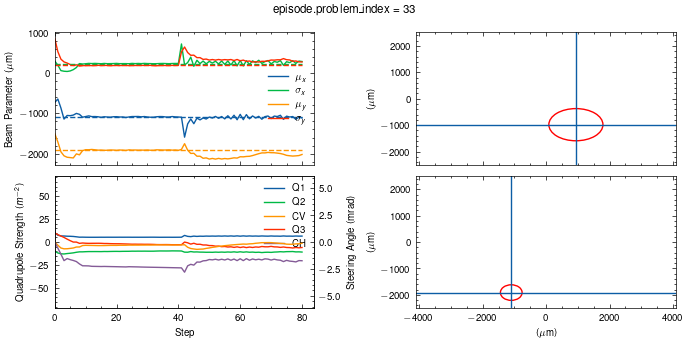

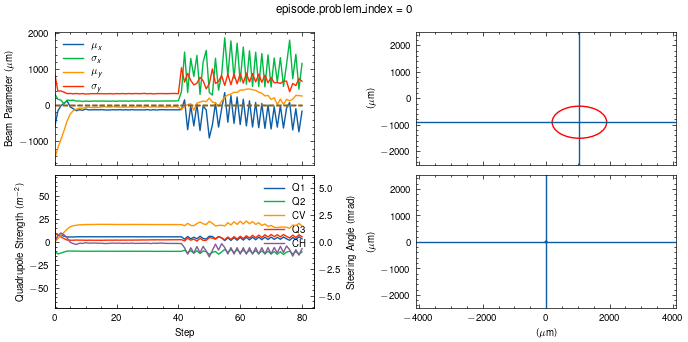

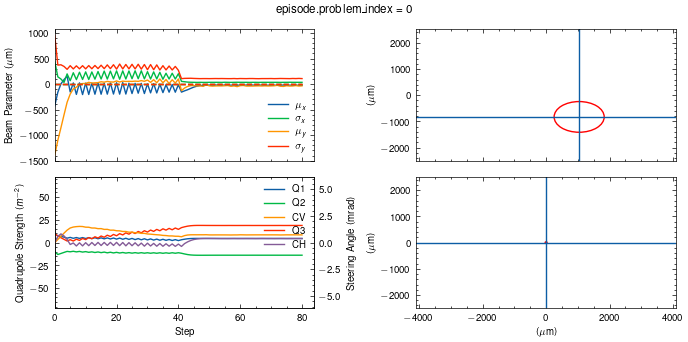

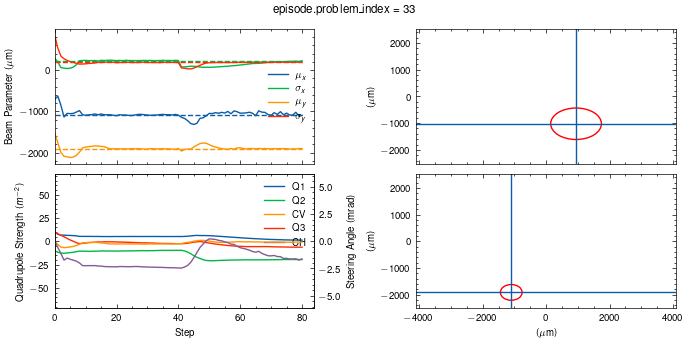

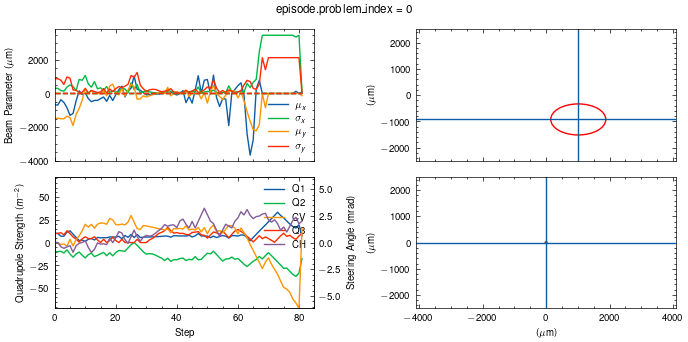

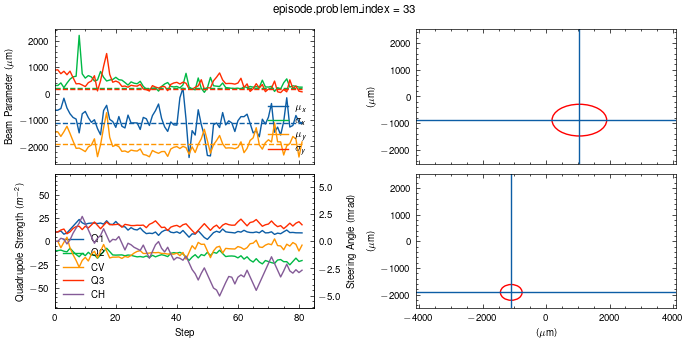

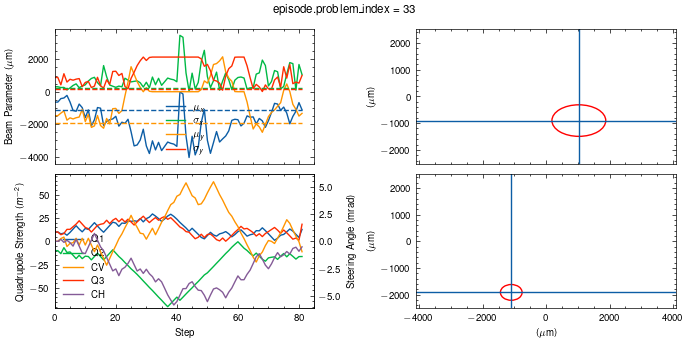

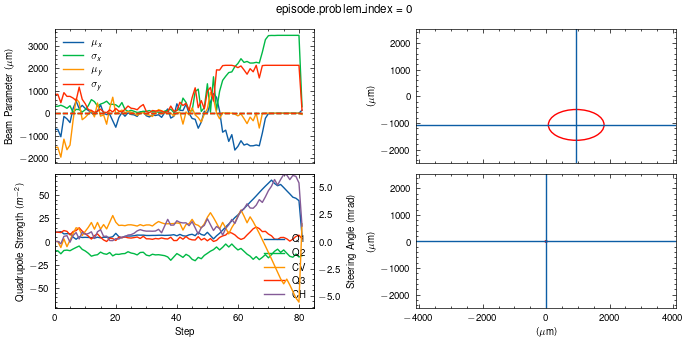

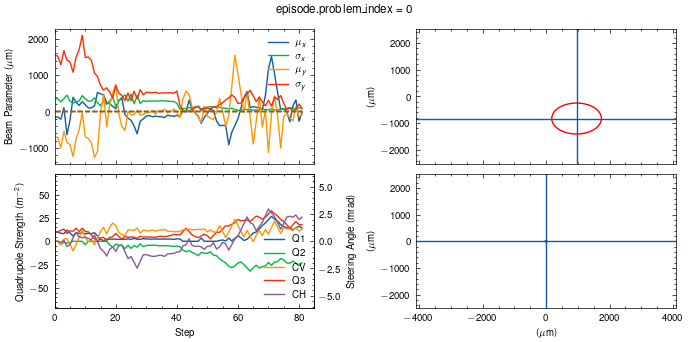

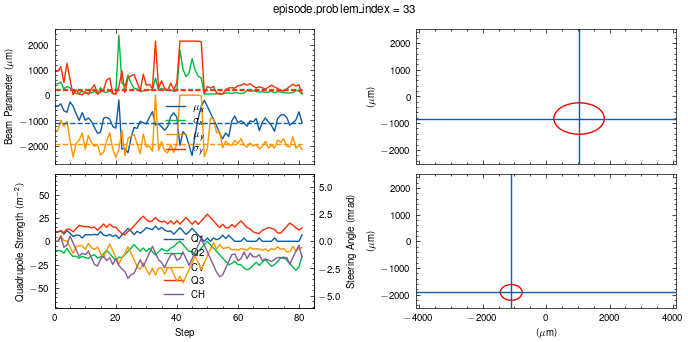

In [57]:
for i, episode in enumerate(rl_disturbance.episodes):
    episode.plot_summary(title=f"{episode.problem_index = }")
plt.show()

for i, episode in enumerate(bo_disturbance.episodes):
    episode.plot_summary(title=f"{episode.problem_index = }")
plt.show()


<AxesSubplot: xlabel='Step', ylabel='Beam Parameter ($\\mu$m)'>

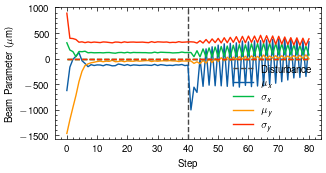

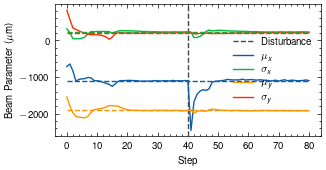

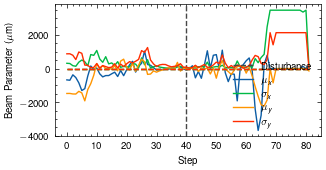

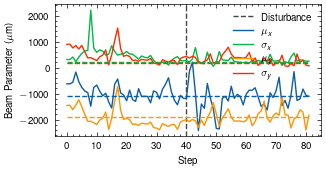

In [58]:
# Prettier versions for the paper
rl_disturbance.episodes[0].plot_beam_parameters(
    save_path=f"{FIG_DIR}/disturbance_rl_episodes_0.pdf",
    vertical_marker=(40, "Disturbance"),
    figsize=(510 / 72.72 * 0.49, 510 / 72.72 * 0.49 * 0.5),
)
rl_disturbance.episodes[1].plot_beam_parameters(
    save_path=f"{FIG_DIR}/disturbance_rl_episodes_1.pdf",
    vertical_marker=(40, "Disturbance"),
    figsize=(510 / 72.72 * 0.49, 510 / 72.72 * 0.49 * 0.5),
)
bo_disturbance.episodes[0].plot_beam_parameters(
    save_path=f"{FIG_DIR}/disturbance_bo_episodes_0.pdf",
    vertical_marker=(40, "Disturbance"),
    figsize=(510 / 72.72 * 0.49, 510 / 72.72 * 0.49 * 0.5),
)
bo_disturbance.episodes[1].plot_beam_parameters(
    save_path=f"{FIG_DIR}/disturbance_bo_episodes_1.pdf",
    vertical_marker=(40, "Disturbance"),
    figsize=(510 / 72.72 * 0.49, 510 / 72.72 * 0.49 * 0.5),
)


### Inference time studies

In [59]:
rl_runtime_study = Study.load(
    "data/bo_vs_rl/simulation/rl_runtime_measurement", name="RL Runtime Study"
)
print(f"Mean action inference time RL: {rl_runtime_study.average_inference_times()}")

bo_runtime_study = Study.load(
    "data/bo_vs_rl/simulation/bo_runtime_measurement", name="BO Runtime Study"
)
print(f"Mean action inference time BO: {bo_runtime_study.average_inference_times()}")


Mean action inference time RL: 0:00:00.000216
Mean action inference time BO: 0:00:00.702033


In [60]:
rl_runtime_study.average_inference_times()


datetime.timedelta(microseconds=216)

In [61]:
bo_runtime_study.average_inference_times()


datetime.timedelta(microseconds=702033)

### Refactoring

In [62]:
refactor_bo_before = bo_sim
refactor_bo_before_2 = Study.load(
    "data/bo_vs_rl/simulation/bo_before_refactor_1", name="Before Refactoring 2"
)  # Fixed rescale_action back to 3 and fixed reward modes
refactor_bo_after = Study.load(
    "data/bo_vs_rl/simulation/bo_refactor_test", name="After Refactoring"
)  # Rescale action 1, faulty reward mode and some changes by Chenran
refactor_bo_after_2 = Study.load(
    "data/bo_vs_rl/simulation/bo_refactor_test_2", name="After Refactoring 2"
)  # Fixed reward mode
refactor_bo_after_3 = Study.load(
    "data/bo_vs_rl/simulation/bo_refactor_test_3", name="After Refactoring 3"
)  # Fixed rescale action to 3
refactor_bo_after_4 = Study.load(
    "data/bo_vs_rl/simulation/bo_refactor_test_4/", name="After Refactoring 4"
)  # Changed w_on_screen from 100 to 10
refactor_bo_after_5 = Study.load(
    "data/bo_vs_rl/simulation/bo_refactor_test_5/", name="After Refactoring 5"
)  # Changed w_on_screen from 100 to 10 and rescale_action to 1
refactor_bo_after_6_final = Study.load(
    "data/bo_vs_rl/simulation/bo_refactor_test_6_final",
    name="After Refactoring 6 (Final)",
)  # Final test of refactored BO agent with rescale action 3
refactor_bo_after_7_scale = Study.load(
    "data/bo_vs_rl/simulation/bo_refactor_test_7_scale/",
    name="After Refactoring 7 (Scale)",
)  # Improve scale_action function
refactor_bo_after_8_explicit = Study.load(
    "data/bo_vs_rl/simulation/bo_refactor_test_8_explicit/",
    name="After Refactoring 8 (Explicit)",
)  # Force explicit reward weight in environment init


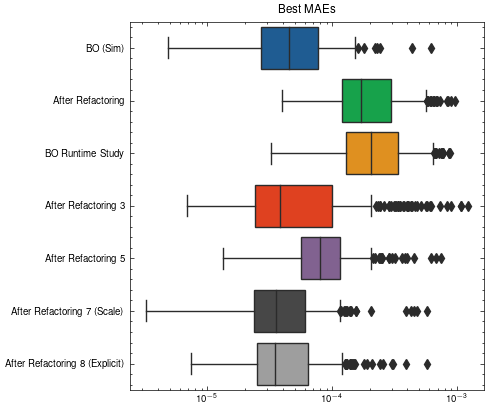

In [63]:
plot_best_mae_box(
    [
        refactor_bo_before,
        refactor_bo_after,
        bo_runtime_study,
        # refactor_bo_after_2,
        refactor_bo_after_3,
        # refactor_bo_before_2,
        # refactor_bo_after_4,
        refactor_bo_after_5,
        # refactor_bo_after_6_final,
        refactor_bo_after_7_scale,
        refactor_bo_after_8_explicit,
    ]
)


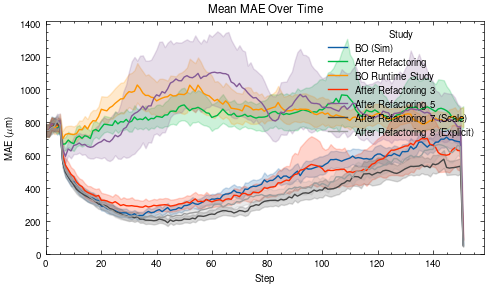

In [64]:
plot_mae_over_time(
    [
        refactor_bo_before,
        refactor_bo_after,
        bo_runtime_study,
        # refactor_bo_after_2,
        refactor_bo_after_3,
        # refactor_bo_before_2,
        # refactor_bo_after_4,
        refactor_bo_after_5,
        # refactor_bo_after_6_final,
        refactor_bo_after_7_scale,
        refactor_bo_after_8_explicit,
    ]
)


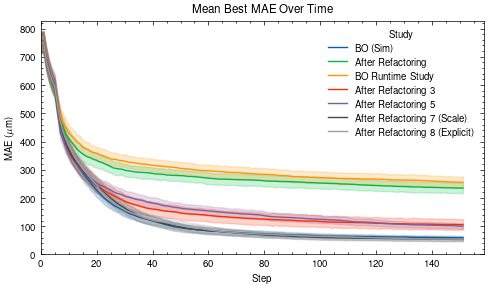

In [65]:
plot_best_mae_over_time(
    [
        refactor_bo_before,
        refactor_bo_after,
        bo_runtime_study,
        # refactor_bo_after_2,
        refactor_bo_after_3,
        # refactor_bo_before_2,
        # refactor_bo_after_4,
        refactor_bo_after_5,
        # refactor_bo_after_6_final,
        refactor_bo_after_7_scale,
        refactor_bo_after_8_explicit,
    ]
)


### Investigate importance of rescale action for BO

In [66]:
rescale_action_real_1 = Study.load(
    "data/bo_vs_rl/real/bo", runs="202301121701*", name="Rescale Action 1 (1)"
)
rescale_action_real_2 = Study.load(
    "data/bo_vs_rl/real/bo", runs="202301121730*", name="Rescale Action 2"
)
rescale_action_real_3 = Study.load(
    "data/bo_vs_rl/real/bo", runs="202301121746*", name="Rescale Action 1 (2)"
)


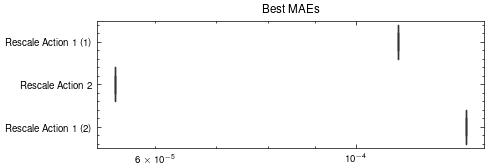

In [67]:
plot_best_mae_box([rescale_action_real_1, rescale_action_real_2, rescale_action_real_3])


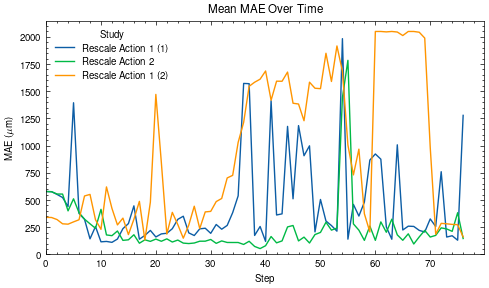

In [68]:
plot_mae_over_time(
    [rescale_action_real_1, rescale_action_real_2, rescale_action_real_3]
)


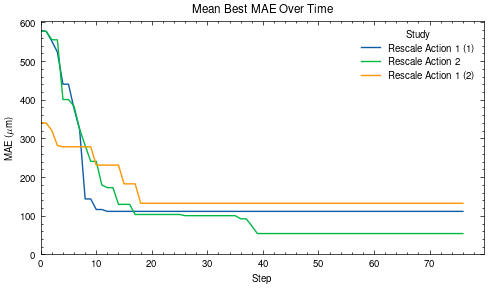

In [69]:
plot_best_mae_over_time(
    [rescale_action_real_1, rescale_action_real_2, rescale_action_real_3]
)


### Success rates & convergence steps

In [70]:
# Proportions of episodes that got to threshold in less than max steps

print(
    f"{rl_sim.name}:"
    f" {sum(np.array([episode.steps_to_threshold(2e-5) for episode in rl_sim.episodes]) < 151) / len(rl_sim)}"
)
print(
    f"{bo_sim.name}:"
    f" {sum(np.array([episode.steps_to_threshold(2e-5) for episode in bo_sim.episodes]) < 151) / len(bo_sim)}"
)
print(
    f"{random_sim.name}:"
    f" {sum(np.array([episode.steps_to_threshold(2e-5) for episode in random_sim.episodes]) < 151) / len(random_sim)}"
)
print(
    f"{nelder_mead_sim.name}:"
    f" {sum(np.array([episode.steps_to_threshold(2e-5) for episode in nelder_mead_sim.episodes]) < 151) / len(nelder_mead_sim)}"
)

print(
    f"{rl_real.name}:"
    f" {sum(np.array([episode.steps_to_threshold(2e-5) for episode in rl_real.episodes]) < 51) / len(rl_real)}"
)
print(
    f"{bo_real.name}:"
    f" {sum(np.array([episode.steps_to_threshold(2e-5) for episode in bo_real.episodes]) < 77) / len(bo_real)}"
)


RL (Sim): 0.8666666666666667
BO (Sim): 0.12
Random: 0.0
Nelder-Mead: 0.0033333333333333335
RL (Real): 0.4090909090909091
BO (Real): 0.09090909090909091


In [71]:
# Median number of steps to get below threshold ONLY for episodes that actually got
# there in less than the step limit
print(
    f"{rl_sim.name} ->"
    f" {rl_sim.median_steps_to_threshold(max_steps=151)} ({rl_sim.mean_steps_to_threshold(max_steps=151)})"
)
print(
    f"{bo_sim.name} ->"
    f" {bo_sim.median_steps_to_threshold(max_steps=151)} ({bo_sim.mean_steps_to_threshold(max_steps=151)})"
)
print(
    f"{random_sim.name} ->"
    f" {random_sim.median_steps_to_threshold(max_steps=151)} ({random_sim.mean_steps_to_threshold(max_steps=151)})"
)
print(
    f"{nelder_mead_sim.name} ->"
    f" {nelder_mead_sim.median_steps_to_threshold(max_steps=151)} ({nelder_mead_sim.mean_steps_to_threshold(max_steps=151)})"
)
print(
    f"{rl_real.name} ->"
    f" {rl_real.median_steps_to_threshold(max_steps=51)} ({rl_real.mean_steps_to_threshold(max_steps=51)})"
)
print(
    f"{bo_real.name} ->"
    f" {bo_real.median_steps_to_threshold(max_steps=71)} ({bo_real.mean_steps_to_threshold(max_steps=71)})"
)


RL (Sim) -> 8.0 (15.611538461538462)
BO (Sim) -> 51.5 (61.22222222222222)
Random -> None (None)
Nelder-Mead -> 56.0 (56.0)
RL (Real) -> 15.0 (16.77777777777778)
BO (Real) -> 52.5 (52.5)


In [72]:
# Proportions of episodes that got to convergence in less than max steps

print(
    f"{rl_sim.name}:"
    f" {sum(np.array([episode.steps_to_convergence(2e-5) for episode in rl_sim.episodes]) < 151) / len(rl_sim)}"
)
print(
    f"{bo_sim.name}:"
    f" {sum(np.array([episode.steps_to_convergence(2e-5) for episode in bo_sim.episodes]) < 151) / len(bo_sim)}"
)
print(
    f"{random_sim.name}:"
    f" {sum(np.array([episode.steps_to_convergence(2e-5) for episode in random_sim.episodes]) < 151) / len(random_sim)}"
)
print(
    f"{nelder_mead_sim.name}:"
    f" {sum(np.array([episode.steps_to_convergence(2e-5) for episode in nelder_mead_sim.episodes]) < 151) / len(nelder_mead_sim)}"
)

print(
    f"{rl_real.name}:"
    f" {sum(np.array([episode.steps_to_convergence(2e-5) for episode in rl_real.episodes]) < 51) / len(rl_real)}"
)
print(
    f"{bo_real.name}:"
    f" {sum(np.array([episode.steps_to_convergence(2e-5) for episode in bo_real.episodes]) < 77) / len(bo_real)}"
)


RL (Sim): 1.0
BO (Sim): 0.9966666666666667
Random: 1.0
Nelder-Mead: 1.0
RL (Real): 1.0
BO (Real): 1.0


In [73]:
# Median number of steps to converge ONLY for episodes that actually got there in less
# than the step limit
print(
    f"{rl_sim.name} ->"
    f" {rl_sim.median_steps_to_convergence(max_steps=151)} ({rl_sim.mean_steps_to_convergence(max_steps=151)})"
)
print(
    f"{bo_sim.name} ->"
    f" {bo_sim.median_steps_to_convergence(max_steps=151)} ({bo_sim.mean_steps_to_convergence(max_steps=151)})"
)
print(
    f"{random_sim.name} ->"
    f" {random_sim.median_steps_to_convergence(max_steps=151)} ({random_sim.mean_steps_to_convergence(max_steps=151)})"
)
print(
    f"{nelder_mead_sim.name} ->"
    f" {nelder_mead_sim.median_steps_to_convergence(max_steps=151)} ({nelder_mead_sim.mean_steps_to_convergence(max_steps=151)})"
)
print(
    f"{rl_real.name} ->"
    f" {rl_real.median_steps_to_convergence(max_steps=51)} ({rl_real.mean_steps_to_convergence(max_steps=51)})"
)
print(
    f"{bo_real.name} ->"
    f" {bo_real.median_steps_to_convergence(max_steps=71)} ({bo_real.mean_steps_to_convergence(max_steps=71)})"
)


RL (Sim) -> 7.0 (9.04)
BO (Sim) -> 32.0 (41.836120401337794)
Random -> 33.0 (50.76)
Nelder-Mead -> 29.0 (27.98)
RL (Real) -> 10.0 (10.409090909090908)
BO (Real) -> 32.5 (33.27272727272727)


### Winner correlations

In [74]:
for i in rl_real_aligned.problem_indicies():
    rl_episode = rl_real_aligned.get_episodes_by_problem(i)[0]
    bo_episode = bo_real_aligned.get_episodes_by_problem(i)[0]

    print(
        f"Problem {i} -> |delta_t_start| ="
        f" {abs(rl_episode.t_start - bo_episode.t_start)}"
    )


Problem 0 -> |delta_t_start| = 0:13:59.932882
Problem 1 -> |delta_t_start| = 0:14:23.141571
Problem 2 -> |delta_t_start| = 0:11:55.872812
Problem 3 -> |delta_t_start| = 0:14:00.085179
Problem 4 -> |delta_t_start| = 0:13:55.466474
Problem 5 -> |delta_t_start| = 0:14:09.618730
Problem 6 -> |delta_t_start| = 0:16:15.501206
Problem 7 -> |delta_t_start| = 0:32:05.751232
Problem 8 -> |delta_t_start| = 0:15:42.538050
Problem 9 -> |delta_t_start| = 0:14:03.051807
Problem 24 -> |delta_t_start| = 0:40:32.628239
Problem 30 -> |delta_t_start| = 0:14:10.771075
Problem 31 -> |delta_t_start| = 0:23:30.568337
Problem 32 -> |delta_t_start| = 0:30:00.111403
Problem 33 -> |delta_t_start| = 0:14:10.153679
Problem 34 -> |delta_t_start| = 0:41:05.770770
Problem 35 -> |delta_t_start| = 0:15:52.323649
Problem 36 -> |delta_t_start| = 0:34:06.778451
Problem 37 -> |delta_t_start| = 0:15:14.234645
Problem 38 -> |delta_t_start| = 0:14:56.936875
Problem 39 -> |delta_t_start| = 0:14:48.364969
Problem 42 -> |delta_t_

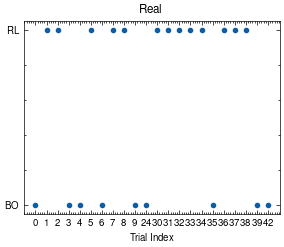

Locator attempting to generate 1644 ticks ([-14.8, ..., 313.7999999999988]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1644 ticks ([-14.8, ..., 313.7999999999988]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1644 ticks ([-14.8, ..., 313.7999999999988]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1644 ticks ([-14.8, ..., 313.7999999999988]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1644 ticks ([-14.8, ..., 313.7999999999988]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1644 ticks ([-14.8, ..., 313.7999999999988]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1644 ticks ([-14.8, ..., 313.7999999999988]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1644 ticks ([-14.8, ..., 313.7999999999988]), which exceeds Locator.MAXTICKS (1000).


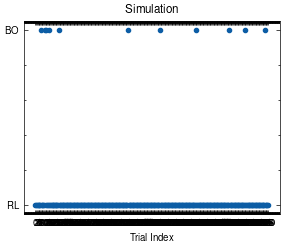

In [75]:
problem_indicies = []
winners = []
for i in rl_real_aligned.problem_indicies():
    rl_episode = rl_real_aligned.get_episodes_by_problem(i)[0]
    bo_episode = bo_real_aligned.get_episodes_by_problem(i)[0]

    rl_result = min(rl_episode.maes())
    bo_result = min(bo_episode.maes())

    problem_indicies.append(str(i))
    winners.append("RL" if rl_result <= bo_result else "BO")

plt.title("Real")
plt.scatter(problem_indicies, winners)
plt.xlabel("Trial Index")
plt.show()

problem_indicies = []
winners = []
for i in rl_sim.problem_indicies():
    rl_episode = rl_sim.get_episodes_by_problem(i)[0]
    bo_episode = bo_sim.get_episodes_by_problem(i)[0]

    rl_result = min(rl_episode.maes())
    bo_result = min(bo_episode.maes())

    problem_indicies.append(str(i))
    winners.append("RL" if rl_result <= bo_result else "BO")

plt.title("Simulation")
plt.scatter(problem_indicies, winners)
plt.xlabel("Trial Index")
plt.show()


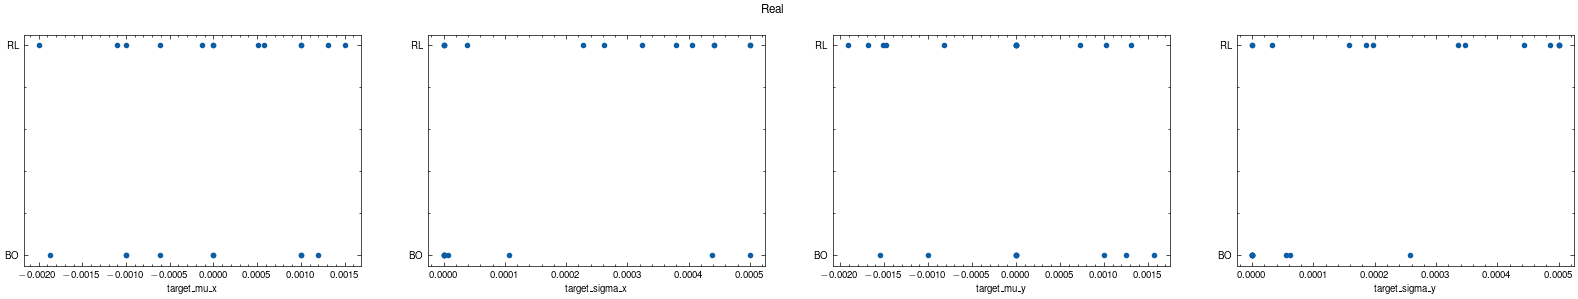

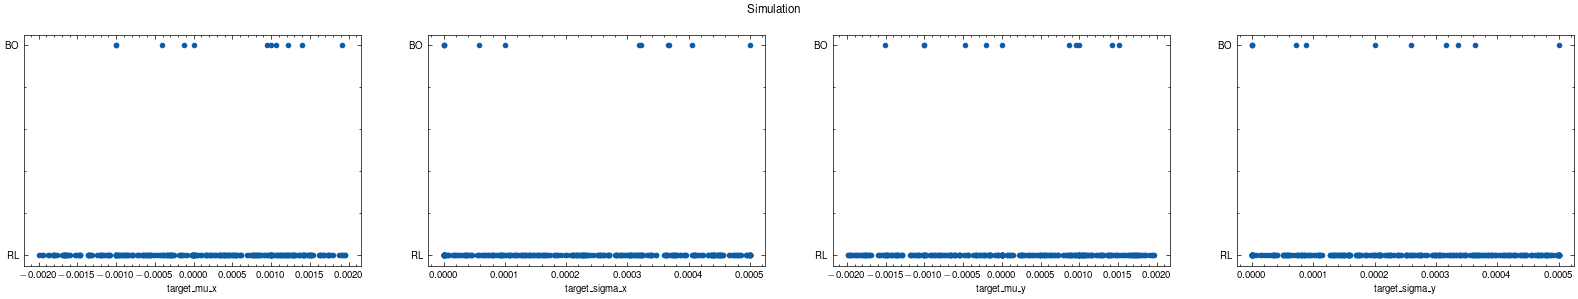

In [76]:
target_mu_x = []
target_sigma_x = []
target_mu_y = []
target_sigma_y = []
winners = []
for i in rl_real_aligned.problem_indicies():
    rl_episode = rl_real_aligned.get_episodes_by_problem(i)[0]
    bo_episode = bo_real_aligned.get_episodes_by_problem(i)[0]

    rl_result = min(rl_episode.maes())
    bo_result = min(bo_episode.maes())

    target_mu_x.append(rl_episode.observations[0]["target"][0])
    target_sigma_x.append(rl_episode.observations[0]["target"][1])
    target_mu_y.append(rl_episode.observations[0]["target"][2])
    target_sigma_y.append(rl_episode.observations[0]["target"][3])
    winners.append("RL" if rl_result <= bo_result else "BO")

plt.figure(figsize=(20, 3))
plt.suptitle("Real")
plt.subplot(141)
plt.scatter(target_mu_x, winners)
plt.xlabel("target_mu_x")
plt.subplot(142)
plt.scatter(target_sigma_x, winners)
plt.xlabel("target_sigma_x")
plt.subplot(143)
plt.scatter(target_mu_y, winners)
plt.xlabel("target_mu_y")
plt.subplot(144)
plt.scatter(target_sigma_y, winners)
plt.xlabel("target_sigma_y")
plt.show()

# -------------------

target_mu_x = []
target_sigma_x = []
target_mu_y = []
target_sigma_y = []
winners = []
for i in rl_sim.problem_indicies():
    rl_episode = rl_sim.get_episodes_by_problem(i)[0]
    bo_episode = bo_sim.get_episodes_by_problem(i)[0]

    rl_result = min(rl_episode.maes())
    bo_result = min(bo_episode.maes())

    target_mu_x.append(rl_episode.observations[0]["target"][0])
    target_sigma_x.append(rl_episode.observations[0]["target"][1])
    target_mu_y.append(rl_episode.observations[0]["target"][2])
    target_sigma_y.append(rl_episode.observations[0]["target"][3])
    winners.append("RL" if rl_result <= bo_result else "BO")

plt.figure(figsize=(20, 3))
plt.suptitle("Simulation")
plt.subplot(141)
plt.scatter(target_mu_x, winners)
plt.xlabel("target_mu_x")
plt.subplot(142)
plt.scatter(target_sigma_x, winners)
plt.xlabel("target_sigma_x")
plt.subplot(143)
plt.scatter(target_mu_y, winners)
plt.xlabel("target_mu_y")
plt.subplot(144)
plt.scatter(target_sigma_y, winners)
plt.xlabel("target_sigma_y")
plt.show()


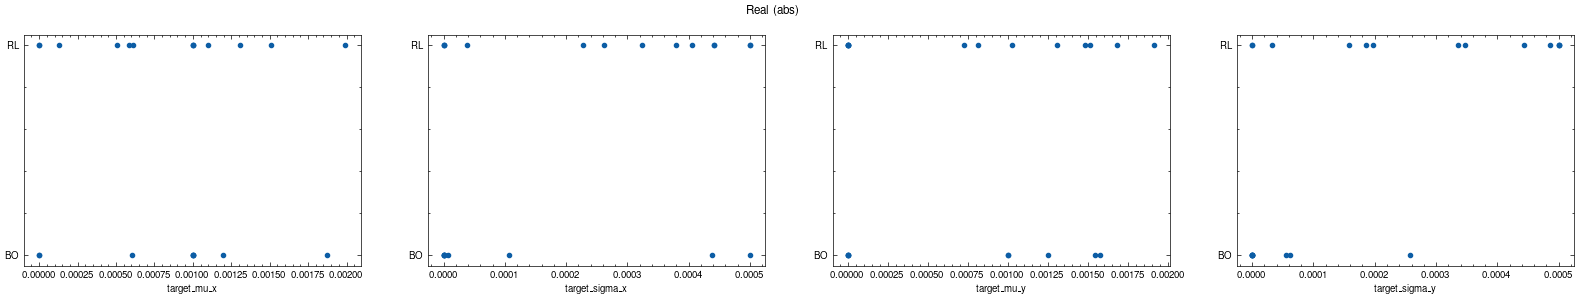

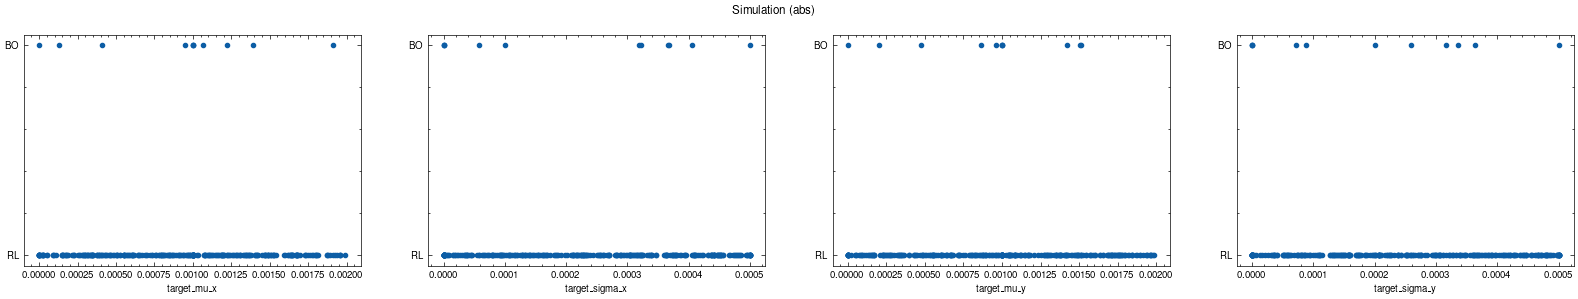

In [77]:
target_mu_x = []
target_sigma_x = []
target_mu_y = []
target_sigma_y = []
winners = []
for i in rl_real_aligned.problem_indicies():
    rl_episode = rl_real_aligned.get_episodes_by_problem(i)[0]
    bo_episode = bo_real_aligned.get_episodes_by_problem(i)[0]

    rl_result = min(rl_episode.maes())
    bo_result = min(bo_episode.maes())

    target_mu_x.append(rl_episode.observations[0]["target"][0])
    target_sigma_x.append(rl_episode.observations[0]["target"][1])
    target_mu_y.append(rl_episode.observations[0]["target"][2])
    target_sigma_y.append(rl_episode.observations[0]["target"][3])
    winners.append("RL" if rl_result <= bo_result else "BO")

plt.figure(figsize=(20, 3))
plt.suptitle("Real (abs)")
plt.subplot(141)
plt.scatter(abs(np.array(target_mu_x)), winners)
plt.xlabel("target_mu_x")
plt.subplot(142)
plt.scatter(abs(np.array(target_sigma_x)), winners)
plt.xlabel("target_sigma_x")
plt.subplot(143)
plt.scatter(abs(np.array(target_mu_y)), winners)
plt.xlabel("target_mu_y")
plt.subplot(144)
plt.scatter(abs(np.array(target_sigma_y)), winners)
plt.xlabel("target_sigma_y")
plt.show()

# -------------------

target_mu_x = []
target_sigma_x = []
target_mu_y = []
target_sigma_y = []
winners = []
for i in rl_sim.problem_indicies():
    rl_episode = rl_sim.get_episodes_by_problem(i)[0]
    bo_episode = bo_sim.get_episodes_by_problem(i)[0]

    rl_result = min(rl_episode.maes())
    bo_result = min(bo_episode.maes())

    target_mu_x.append(rl_episode.observations[0]["target"][0])
    target_sigma_x.append(rl_episode.observations[0]["target"][1])
    target_mu_y.append(rl_episode.observations[0]["target"][2])
    target_sigma_y.append(rl_episode.observations[0]["target"][3])
    winners.append("RL" if rl_result <= bo_result else "BO")

plt.figure(figsize=(20, 3))
plt.suptitle("Simulation (abs)")
plt.subplot(141)
plt.scatter(abs(np.array(target_mu_x)), winners)
plt.xlabel("target_mu_x")
plt.subplot(142)
plt.scatter(abs(np.array(target_sigma_x)), winners)
plt.xlabel("target_sigma_x")
plt.subplot(143)
plt.scatter(abs(np.array(target_mu_y)), winners)
plt.xlabel("target_mu_y")
plt.subplot(144)
plt.scatter(abs(np.array(target_sigma_y)), winners)
plt.xlabel("target_sigma_y")
plt.show()


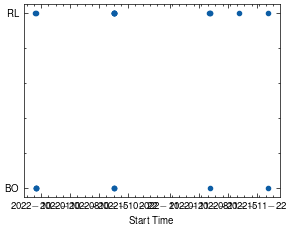

In [78]:
start_times = []
winners = []
for i in rl_real_aligned.problem_indicies():
    rl_episode = rl_real_aligned.get_episodes_by_problem(i)[0]
    bo_episode = bo_real_aligned.get_episodes_by_problem(i)[0]

    rl_result = min(rl_episode.maes())
    bo_result = min(bo_episode.maes())

    start_times.append(rl_episode.t_start)
    winners.append("RL" if rl_result <= bo_result else "BO")

plt.scatter(start_times, winners)
plt.xlabel("Start Time")
plt.show()


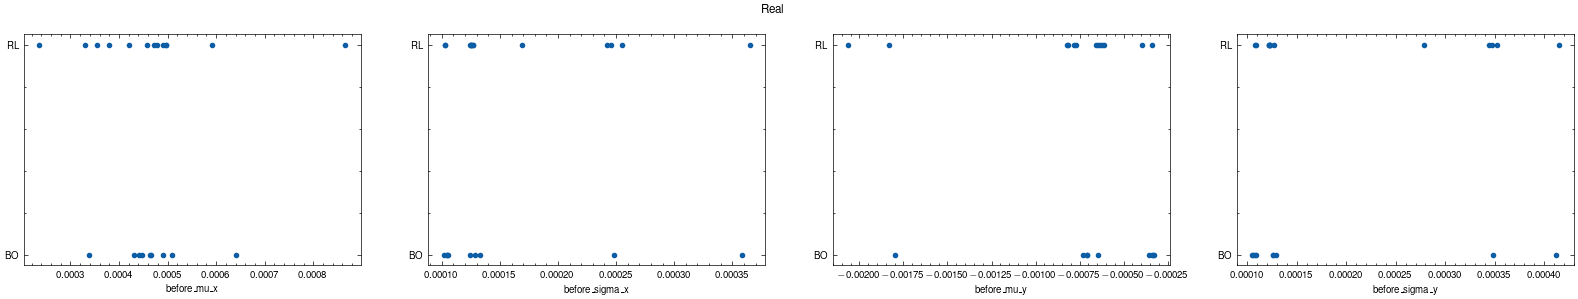

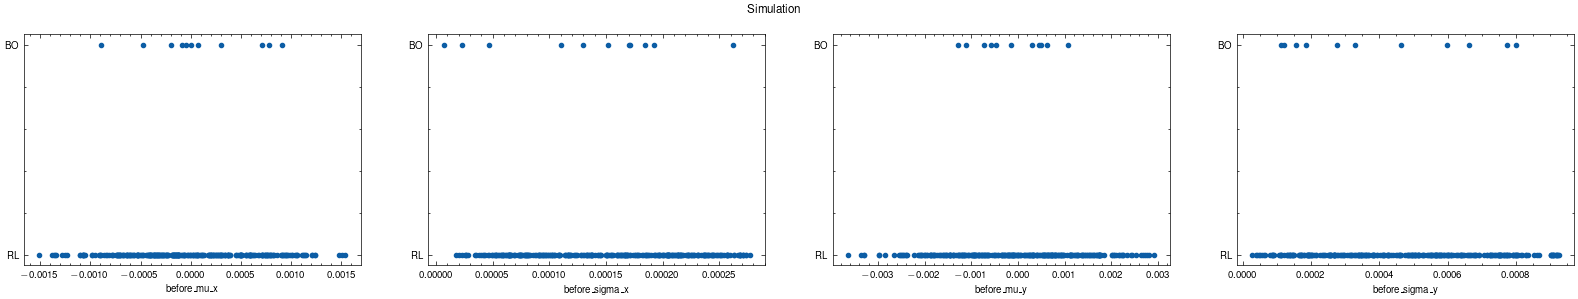

In [79]:
before_mu_x = []
before_sigma_x = []
before_mu_y = []
before_sigma_y = []
winners = []
for i in rl_real_aligned.problem_indicies():
    rl_episode = rl_real_aligned.get_episodes_by_problem(i)[0]
    bo_episode = bo_real_aligned.get_episodes_by_problem(i)[0]

    rl_result = min(rl_episode.maes())
    bo_result = min(bo_episode.maes())

    before_mu_x.append(rl_episode.infos[0]["beam_before_reset"][0])
    before_sigma_x.append(rl_episode.infos[0]["beam_before_reset"][1])
    before_mu_y.append(rl_episode.infos[0]["beam_before_reset"][2])
    before_sigma_y.append(rl_episode.infos[0]["beam_before_reset"][3])
    winners.append("RL" if rl_result <= bo_result else "BO")

plt.figure(figsize=(20, 3))
plt.suptitle("Real")
plt.subplot(141)
plt.scatter(before_mu_x, winners)
plt.xlabel("before_mu_x")
plt.subplot(142)
plt.scatter(before_sigma_x, winners)
plt.xlabel("before_sigma_x")
plt.subplot(143)
plt.scatter(before_mu_y, winners)
plt.xlabel("before_mu_y")
plt.subplot(144)
plt.scatter(before_sigma_y, winners)
plt.xlabel("before_sigma_y")
plt.show()

# ---------------

before_mu_x = []
before_sigma_x = []
before_mu_y = []
before_sigma_y = []
winners = []
for i in rl_sim.problem_indicies():
    rl_episode = rl_sim.get_episodes_by_problem(i)[0]
    bo_episode = bo_sim.get_episodes_by_problem(i)[0]

    rl_result = min(rl_episode.maes())
    bo_result = min(bo_episode.maes())

    before_mu_x.append(rl_episode.observations[0]["beam"][0])
    before_sigma_x.append(rl_episode.observations[0]["beam"][1])
    before_mu_y.append(rl_episode.observations[0]["beam"][2])
    before_sigma_y.append(rl_episode.observations[0]["beam"][3])
    winners.append("RL" if rl_result <= bo_result else "BO")

plt.figure(figsize=(20, 3))
plt.suptitle("Simulation")
plt.subplot(141)
plt.scatter(before_mu_x, winners)
plt.xlabel("before_mu_x")
plt.subplot(142)
plt.scatter(before_sigma_x, winners)
plt.xlabel("before_sigma_x")
plt.subplot(143)
plt.scatter(before_mu_y, winners)
plt.xlabel("before_mu_y")
plt.subplot(144)
plt.scatter(before_sigma_y, winners)
plt.xlabel("before_sigma_y")
plt.show()


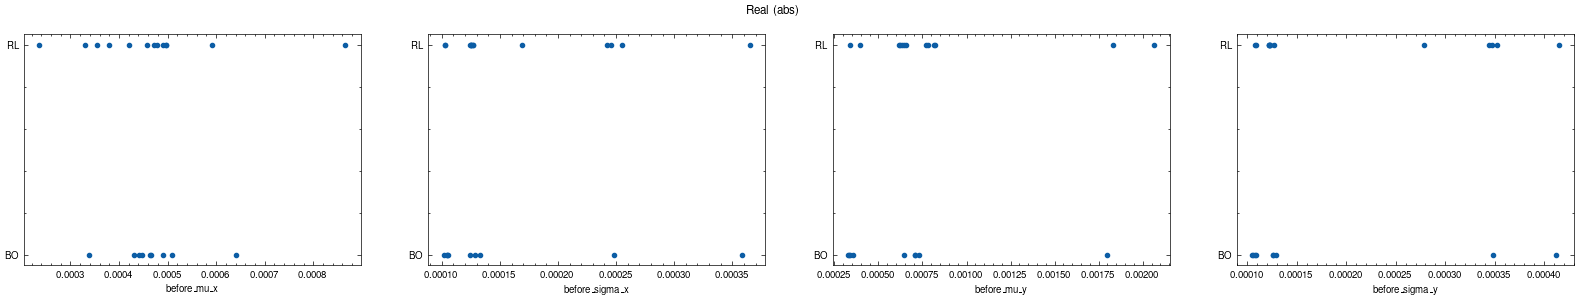

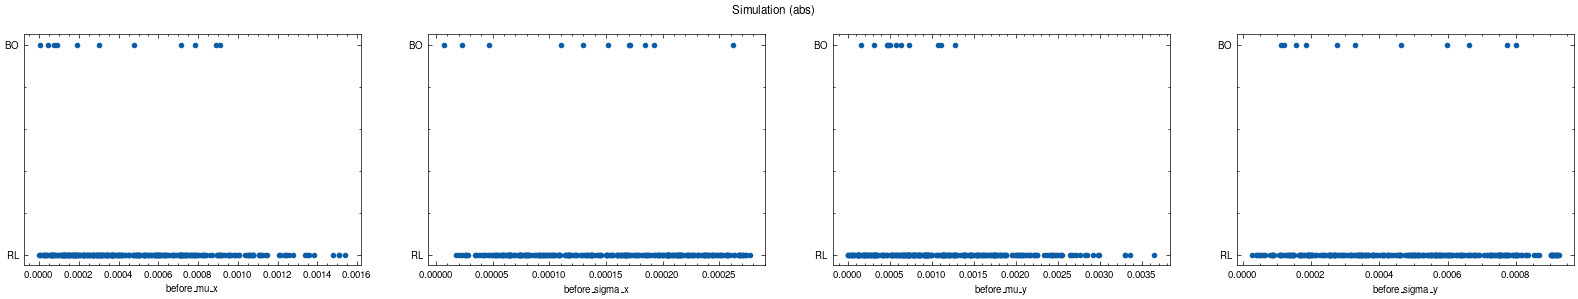

In [80]:
before_mu_x = []
before_sigma_x = []
before_mu_y = []
before_sigma_y = []
winners = []
for i in rl_real_aligned.problem_indicies():
    rl_episode = rl_real_aligned.get_episodes_by_problem(i)[0]
    bo_episode = bo_real_aligned.get_episodes_by_problem(i)[0]

    rl_result = min(rl_episode.maes())
    bo_result = min(bo_episode.maes())

    before_mu_x.append(rl_episode.infos[0]["beam_before_reset"][0])
    before_sigma_x.append(rl_episode.infos[0]["beam_before_reset"][1])
    before_mu_y.append(rl_episode.infos[0]["beam_before_reset"][2])
    before_sigma_y.append(rl_episode.infos[0]["beam_before_reset"][3])
    winners.append("RL" if rl_result <= bo_result else "BO")

plt.figure(figsize=(20, 3))
plt.suptitle("Real (abs)")
plt.subplot(141)
plt.scatter(abs(np.array(before_mu_x)), winners)
plt.xlabel("before_mu_x")
plt.subplot(142)
plt.scatter(abs(np.array(before_sigma_x)), winners)
plt.xlabel("before_sigma_x")
plt.subplot(143)
plt.scatter(abs(np.array(before_mu_y)), winners)
plt.xlabel("before_mu_y")
plt.subplot(144)
plt.scatter(abs(np.array(before_sigma_y)), winners)
plt.xlabel("before_sigma_y")
plt.show()

# ---------------

before_mu_x = []
before_sigma_x = []
before_mu_y = []
before_sigma_y = []
winners = []
for i in rl_sim.problem_indicies():
    rl_episode = rl_sim.get_episodes_by_problem(i)[0]
    bo_episode = bo_sim.get_episodes_by_problem(i)[0]

    rl_result = min(rl_episode.maes())
    bo_result = min(bo_episode.maes())

    before_mu_x.append(rl_episode.observations[0]["beam"][0])
    before_sigma_x.append(rl_episode.observations[0]["beam"][1])
    before_mu_y.append(rl_episode.observations[0]["beam"][2])
    before_sigma_y.append(rl_episode.observations[0]["beam"][3])
    winners.append("RL" if rl_result <= bo_result else "BO")

plt.figure(figsize=(20, 3))
plt.suptitle("Simulation (abs)")
plt.subplot(141)
plt.scatter(abs(np.array(before_mu_x)), winners)
plt.xlabel("before_mu_x")
plt.subplot(142)
plt.scatter(abs(np.array(before_sigma_x)), winners)
plt.xlabel("before_sigma_x")
plt.subplot(143)
plt.scatter(abs(np.array(before_mu_y)), winners)
plt.xlabel("before_mu_y")
plt.subplot(144)
plt.scatter(abs(np.array(before_sigma_y)), winners)
plt.xlabel("before_sigma_y")
plt.show()


### Further zero target and hybrid studies

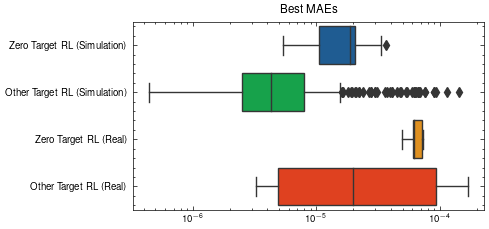

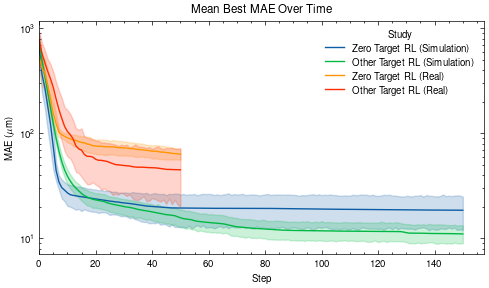

In [81]:
zero_target_rl_real = []
other_target_rl_real = []
for episode in rl_real.episodes:
    target = episode.observations[0]["target"]
    if all(p == 0 for p in target[[1, 3]]):
        zero_target_rl_real.append(episode)
    else:
        other_target_rl_real.append(episode)
zero_target_rl_real = Study(zero_target_rl_real, name="Zero Target RL (Real)")
other_target_rl_real = Study(other_target_rl_real, name="Other Target RL (Real)")

zero_target_rl_sim = []
other_target_rl_sim = []
for episode in rl_sim.episodes:
    target = episode.observations[0]["target"]
    if all(p == 0 for p in target[[1, 3]]):
        zero_target_rl_sim.append(episode)
    else:
        other_target_rl_sim.append(episode)
zero_target_rl_sim = Study(zero_target_rl_sim, name="Zero Target RL (Simulation)")
other_target_rl_sim = Study(other_target_rl_sim, name="Other Target RL (Simulation)")

zero_sim_vs_real_rl_studies = [
    zero_target_rl_sim,
    other_target_rl_sim,
    zero_target_rl_real,
    other_target_rl_real,
]

plot_best_mae_box(zero_sim_vs_real_rl_studies)
plot_best_mae_over_time(zero_sim_vs_real_rl_studies, logarithmic=True)


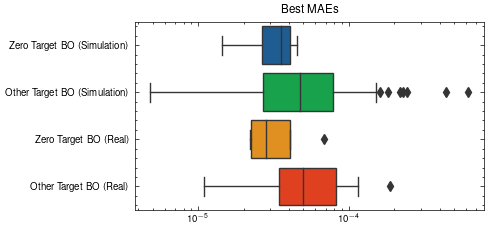

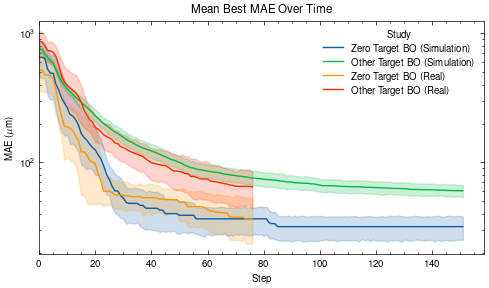

In [82]:
zero_target_bo_real = []
other_target_bo_real = []
for episode in bo_real.episodes:
    target = episode.observations[0]["target"]
    if all(p == 0 for p in target[[1, 3]]):
        zero_target_bo_real.append(episode)
    else:
        other_target_bo_real.append(episode)
zero_target_bo_real = Study(zero_target_bo_real, name="Zero Target BO (Real)")
other_target_bo_real = Study(other_target_bo_real, name="Other Target BO (Real)")

zero_target_bo_sim = []
other_target_bo_sim = []
for episode in bo_sim.episodes:
    target = episode.observations[0]["target"]
    if all(p == 0 for p in target[[1, 3]]):
        zero_target_bo_sim.append(episode)
    else:
        other_target_bo_sim.append(episode)
zero_target_bo_sim = Study(zero_target_bo_sim, name="Zero Target BO (Simulation)")
other_target_bo_sim = Study(other_target_bo_sim, name="Other Target BO (Simulation)")

zero_sim_vs_real_bo_studies = [
    zero_target_bo_sim,
    other_target_bo_sim,
    zero_target_bo_real,
    other_target_bo_real,
]

plot_best_mae_box(zero_sim_vs_real_bo_studies)
plot_best_mae_over_time(zero_sim_vs_real_bo_studies, logarithmic=True)


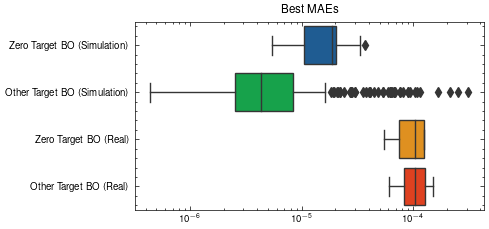

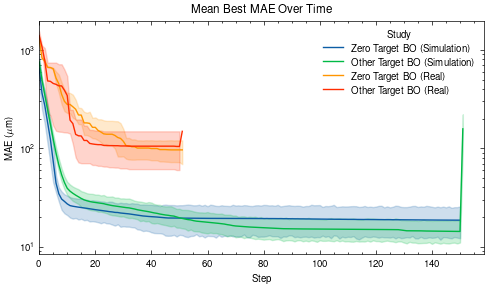

In [83]:
zero_target_hybrid_real = []
other_target_hybrid_real = []
for episode in closing_rlbo.episodes:
    target = episode.observations[0]["target"]
    if all(p == 0 for p in target[[1, 3]]):
        zero_target_hybrid_real.append(episode)
    else:
        other_target_hybrid_real.append(episode)
zero_target_hybrid_real = Study(zero_target_hybrid_real, name="Zero Target BO (Real)")
other_target_hybrid_real = Study(
    other_target_hybrid_real, name="Other Target BO (Real)"
)

zero_target_hybrid_sim = []
other_target_hybrid_sim = []
for episode in hybrid_sim.episodes:
    target = episode.observations[0]["target"]
    if all(p == 0 for p in target[[1, 3]]):
        zero_target_hybrid_sim.append(episode)
    else:
        other_target_hybrid_sim.append(episode)
zero_target_hybrid_sim = Study(
    zero_target_hybrid_sim, name="Zero Target BO (Simulation)"
)
other_target_hybrid_sim = Study(
    other_target_hybrid_sim, name="Other Target BO (Simulation)"
)

zero_sim_vs_real_bo_studies = [
    zero_target_hybrid_sim,
    other_target_hybrid_sim,
    zero_target_hybrid_real,
    other_target_hybrid_real,
]

plot_best_mae_box(zero_sim_vs_real_bo_studies)
plot_best_mae_over_time(zero_sim_vs_real_bo_studies, logarithmic=True)


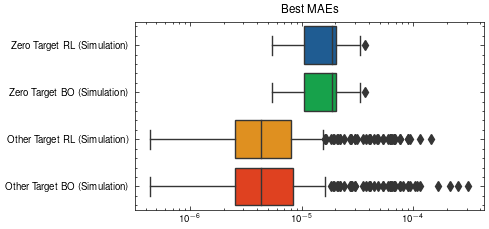

In [84]:
plot_best_mae_box(
    [
        zero_target_rl_sim,
        zero_target_hybrid_sim,
        other_target_rl_sim,
        other_target_hybrid_sim,
    ]
)


In [85]:
zero_target_rl_sim.median_best_mae(), zero_target_hybrid_sim.median_best_mae(), other_target_rl_sim.median_best_mae()


(1.8766873836284503e-05, 1.8766873836284503e-05, 4.315588739700615e-06)

### Best & worst runs

Best according to final MAE
--------------------
Problem Index = 74
Final MAE = 5.42544512427412e-07


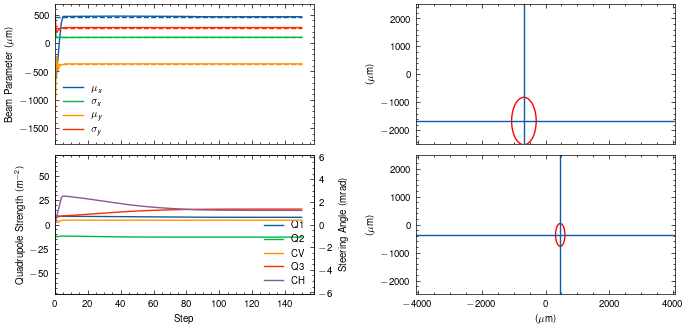

In [86]:
i = np.argmin([episode.final_mae() for episode in rl_sim.episodes])
print("Best according to final MAE")
print("--------------------")
print(f"Problem Index = {rl_sim.episodes[i].problem_index}")
print(f"Final MAE = {rl_sim.episodes[i].final_mae()}")
rl_sim.episodes[i].plot_summary()


Best according to RMSE
--------------------
Problem Index = 41
Final MAE = 1.8392243873677216e-05


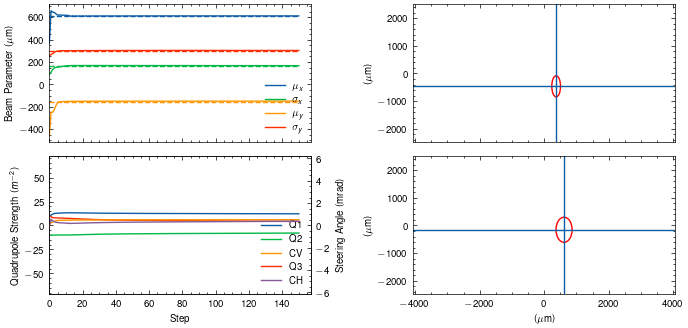

In [87]:
i = np.argmin([episode.rmse() for episode in rl_sim.episodes])
print("Best according to RMSE")
print("--------------------")
print(f"Problem Index = {rl_sim.episodes[i].problem_index}")
print(f"Final MAE = {rl_sim.episodes[i].rmse()}")
rl_sim.episodes[i].plot_summary()



Worst according to final MAE
--------------------
Problem Index = 7
Final MAE = 0.00016058974142652005


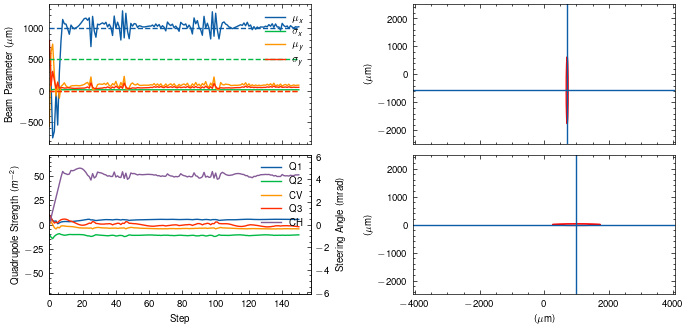

In [88]:
i = np.argmax([episode.final_mae() for episode in rl_sim.episodes])
print("Worst according to final MAE")
print("--------------------")
print(f"Problem Index = {rl_sim.episodes[i].problem_index}")
print(f"Final MAE = {rl_sim.episodes[i].final_mae()}")
rl_sim.episodes[i].plot_summary()



Worst according to RMSE
--------------------
Problem Index = 290
Final MAE = 0.0003658001951407641


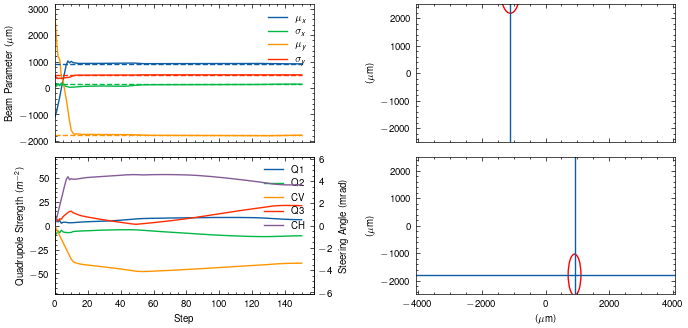

In [89]:
i = np.argmax([episode.rmse() for episode in rl_sim.episodes])
print("Worst according to RMSE")
print("--------------------")
print(f"Problem Index = {rl_sim.episodes[i].problem_index}")
print(f"Final MAE = {rl_sim.episodes[i].rmse()}")
rl_sim.episodes[i].plot_summary()



### Compare BO took over runs to RL equivalnet

Problem Index = 7
RMSE (RL) = 0.0002913970092777163 / RMSE (BO) = 0.0003671335580293089 / RMSE (Hybrid) = 0.00040590870776213706


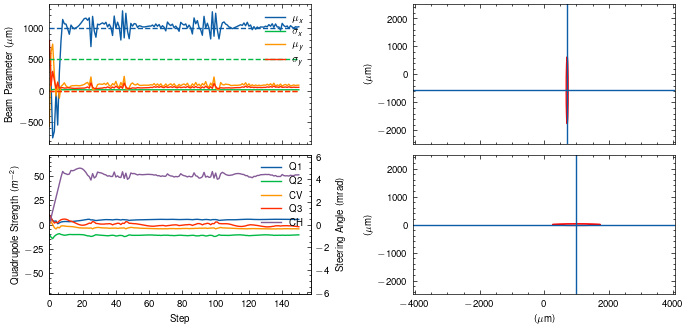

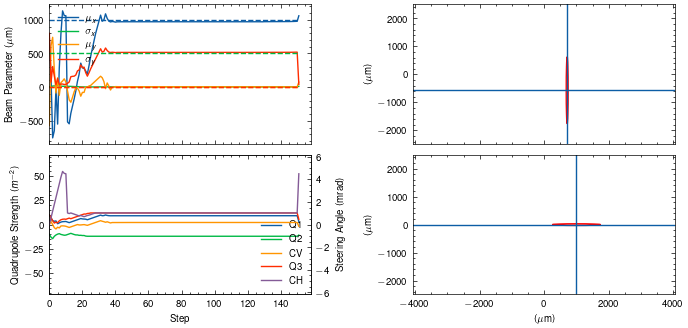

Problem Index = 42
RMSE (RL) = 0.00035012897569686174 / RMSE (BO) = 0.0009988261153921485 / RMSE (Hybrid) = 0.000729428487829864


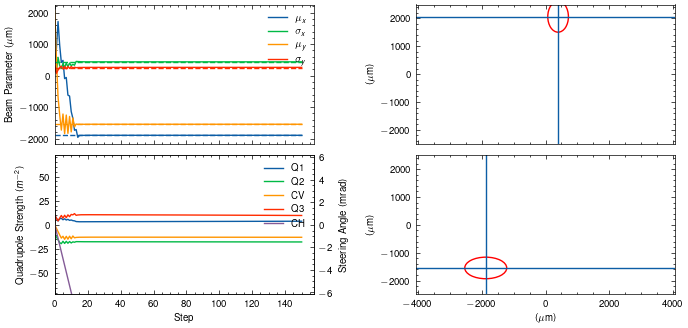

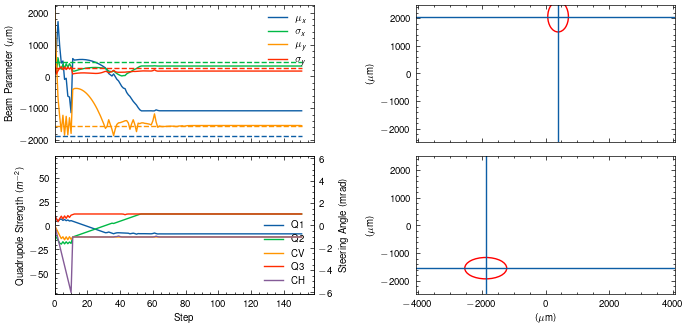

Problem Index = 44
RMSE (RL) = 0.00028882184415124357 / RMSE (BO) = 0.0008243777556344867 / RMSE (Hybrid) = 0.0010994256008416414


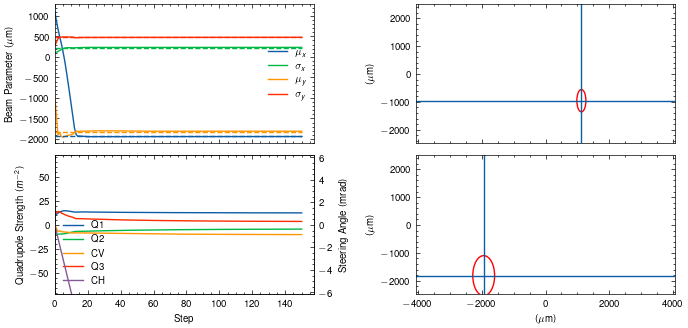

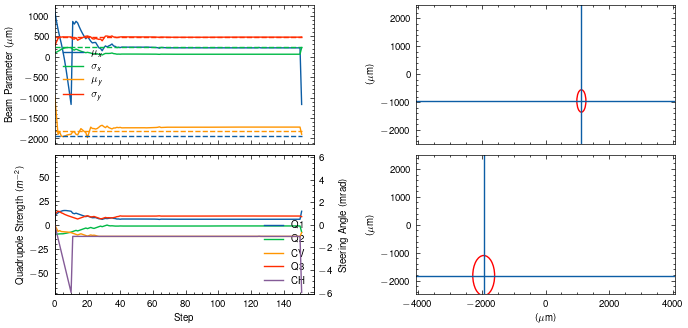

Problem Index = 53
RMSE (RL) = 9.164732182398438e-05 / RMSE (BO) = 0.0005715223960578442 / RMSE (Hybrid) = 9.164732182398438e-05


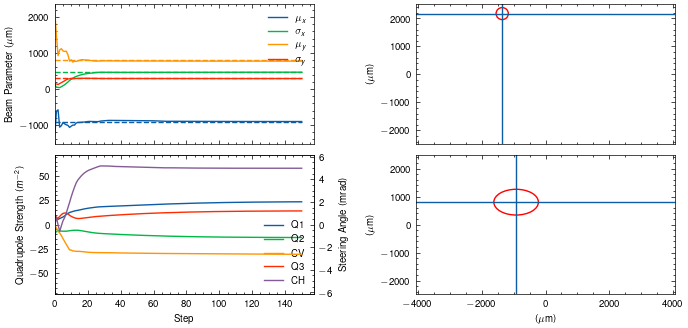

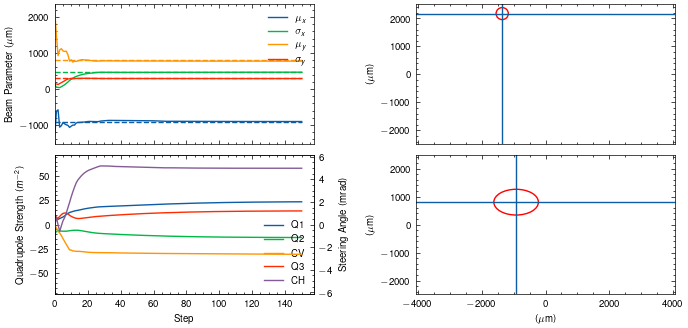

Problem Index = 68
RMSE (RL) = 0.0002791660081129521 / RMSE (BO) = 0.0012214584276080132 / RMSE (Hybrid) = 0.001293693669140339


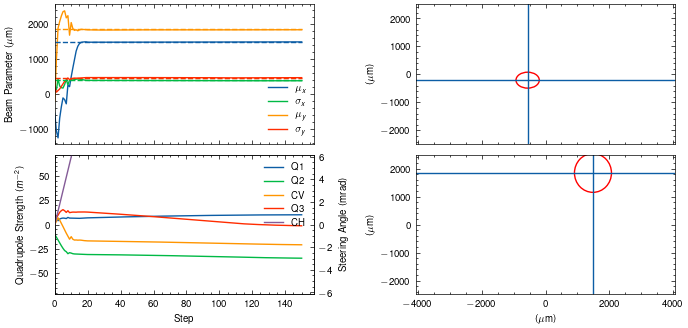

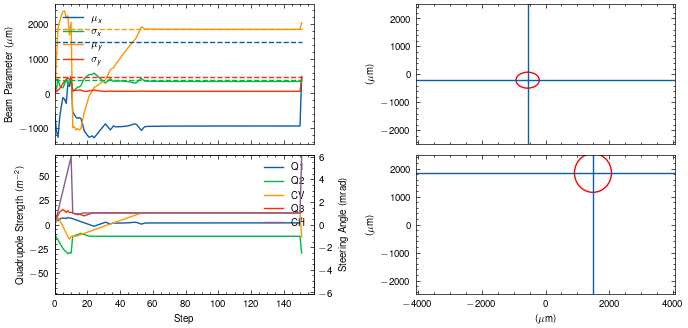

Problem Index = 81
RMSE (RL) = 6.283342372626066e-05 / RMSE (BO) = 0.000260859087575227 / RMSE (Hybrid) = 6.283342372626066e-05


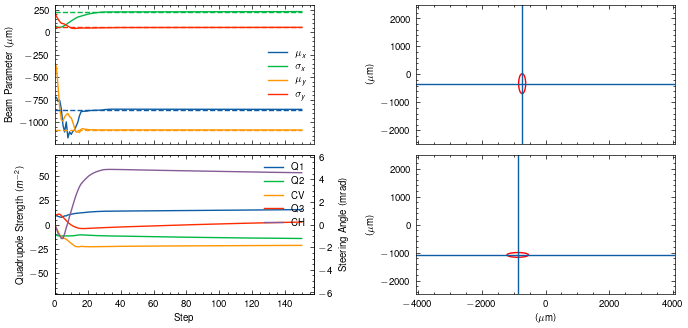

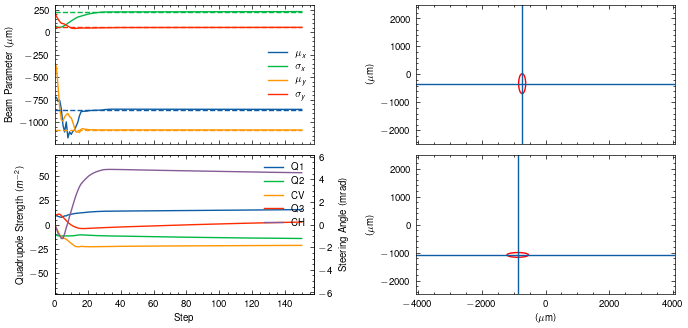

Problem Index = 89
RMSE (RL) = 0.0002005058922804892 / RMSE (BO) = 0.0005847486318089068 / RMSE (Hybrid) = 0.0003393727238290012


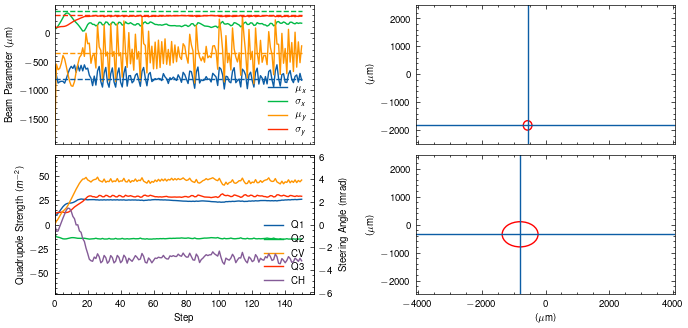

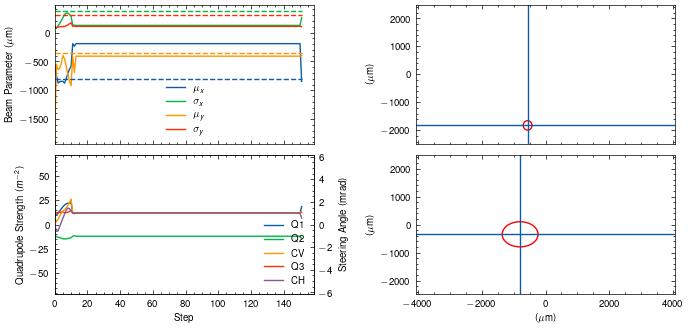

Problem Index = 115
RMSE (RL) = 0.00028988561825826764 / RMSE (BO) = 0.001009379862807691 / RMSE (Hybrid) = 0.0005277930176816881


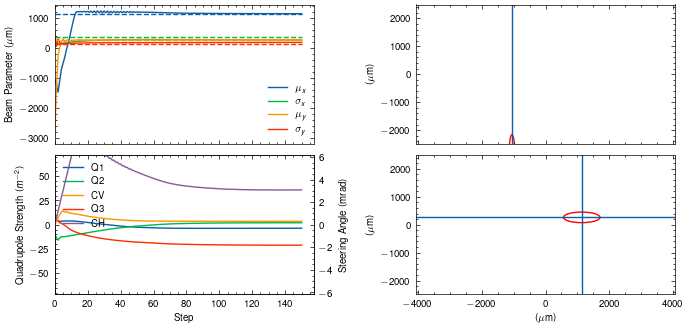

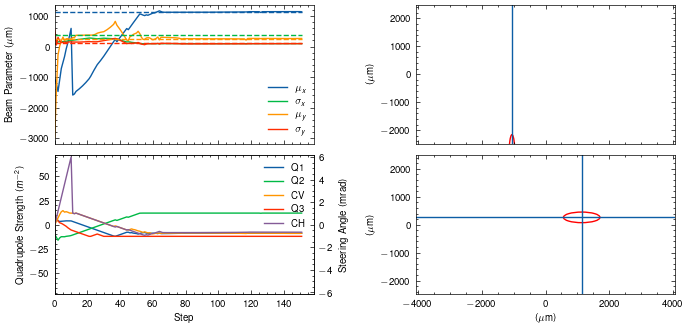

Problem Index = 138
RMSE (RL) = 0.00014387327246367931 / RMSE (BO) = 0.0003605002711992711 / RMSE (Hybrid) = 0.00031839904841035604


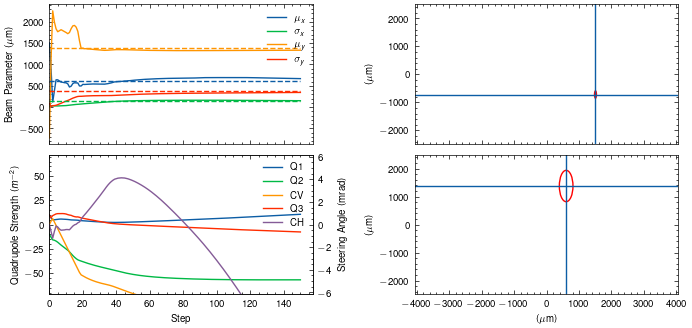

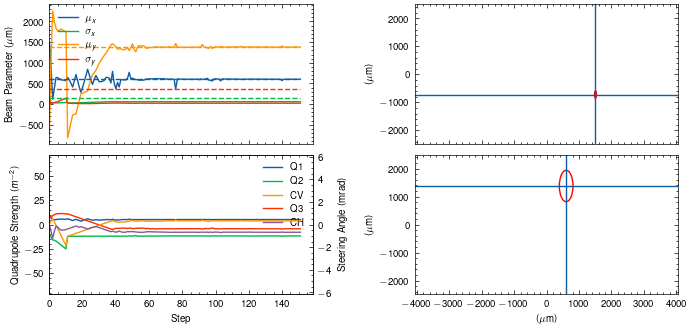

Problem Index = 203
RMSE (RL) = 0.00026409185375086963 / RMSE (BO) = 0.001174262841232121 / RMSE (Hybrid) = 0.00048233300913125277


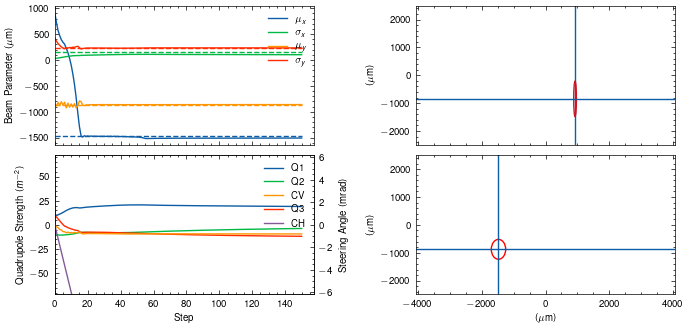

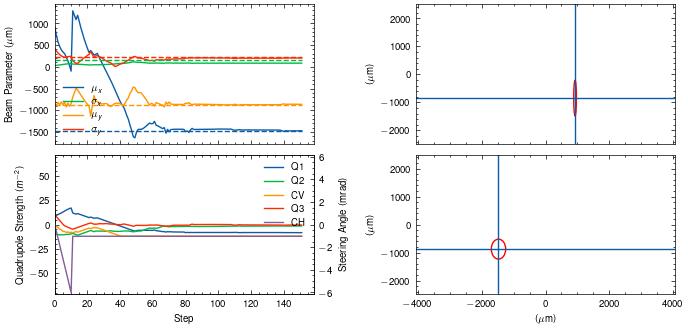

Problem Index = 210
RMSE (RL) = 0.00018292892491444945 / RMSE (BO) = 0.0005913057248108089 / RMSE (Hybrid) = 0.00018292892491444945


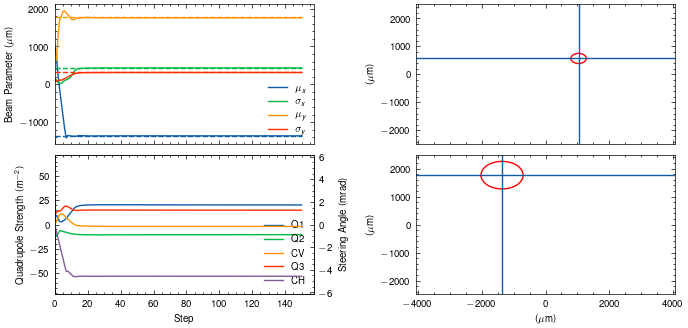

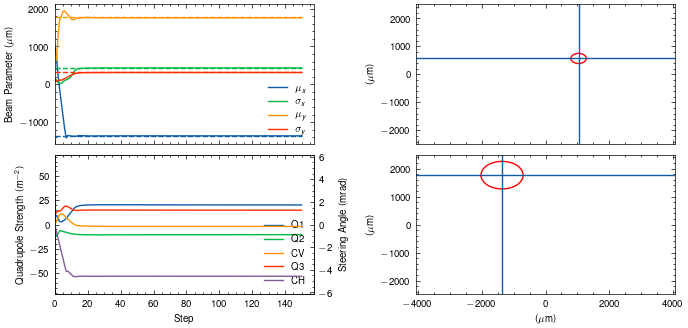

Problem Index = 222
RMSE (RL) = 0.00026086001889780164 / RMSE (BO) = 0.001126913819462061 / RMSE (Hybrid) = 0.00026086001889780164


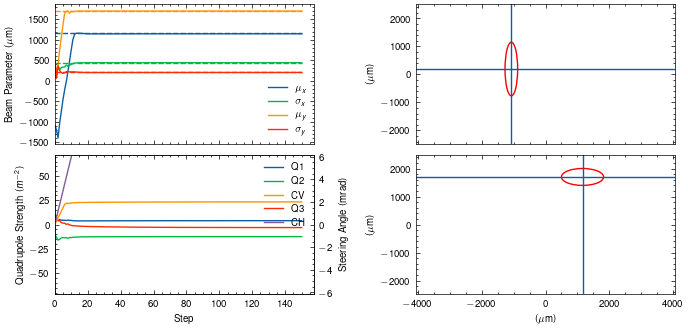

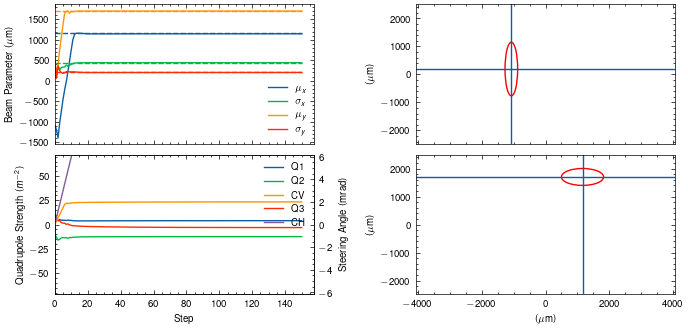

In [90]:
took_over_indicies = [7, 42, 44, 53, 68, 81, 89, 115, 138, 203, 210, 222]
for i in took_over_indicies:
    print(f"Problem Index = {rl_sim.get_episodes_by_problem(i)[0].problem_index}")
    print(
        f"RMSE (RL) = {rl_sim.get_episodes_by_problem(i)[0].rmse()} / RMSE (BO) ="
        f" {bo_sim.get_episodes_by_problem(i)[0].rmse()} / RMSE (Hybrid) ="
        f" {hybrid_sim.get_episodes_by_problem(i)[0].rmse()}"
    )
    rl_sim.get_episodes_by_problem(i)[0].plot_summary()
    # bo_sim.get_episodes_by_problem(i)[0].plot_summary()
    hybrid_sim.get_episodes_by_problem(i)[0].plot_summary()


### Compare to hybrid approach in real world

Trial 0
RMSE = 0.0007657475653104484
MAE = 0.00017723912606015801


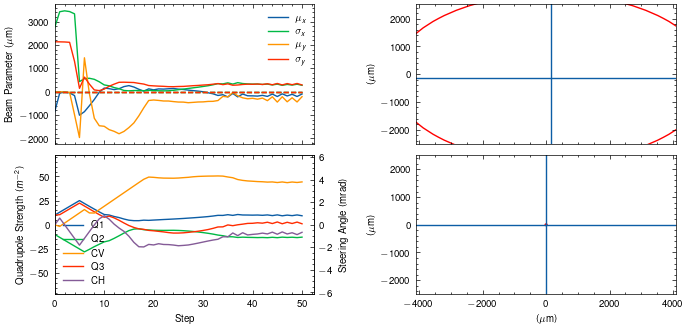

Trial 33
RMSE = 0.0010156376520171762
MAE = 6.006189505569637e-05


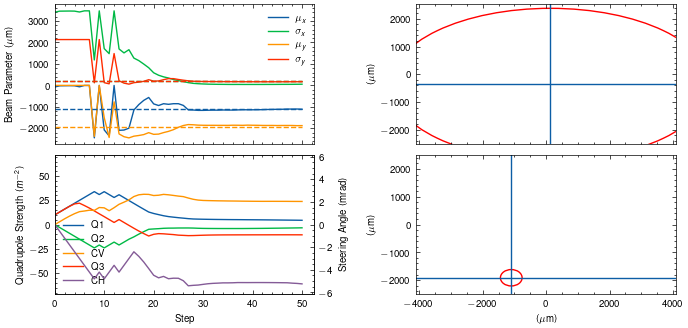

Trial 0
RMSE = 0.00045620364835485816
MAE = 0.0001586170110385865


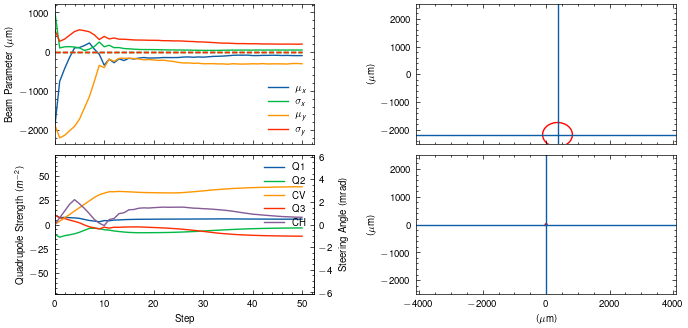

Trial 0
RMSE = 0.0005270129768177867
MAE = 0.00015801664267200977


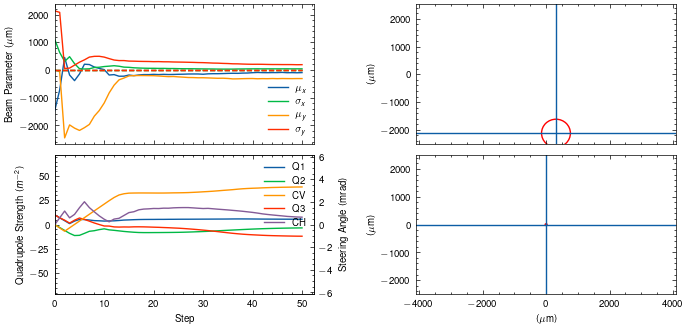

Trial 39
RMSE = 0.0006935822893865407
MAE = 0.0001708267373032868


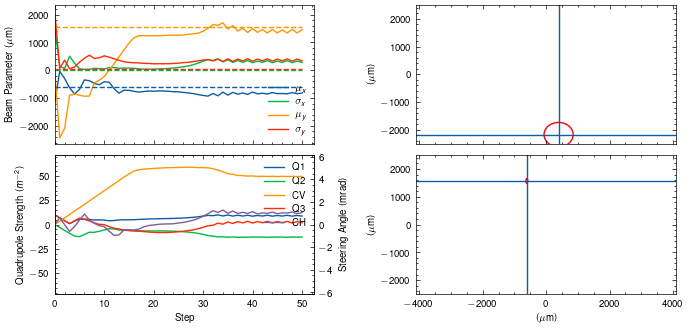

In [91]:
for episode in closing_rl.episodes:
    print(f"Trial {episode.problem_index}")
    print(f"RMSE = {episode.rmse()}")
    print(f"MAE = {episode.best_mae()}")
    episode.plot_summary()


Trial 0
RMSE = 0.0004895959282293916
MAE = 0.00012541766045615077


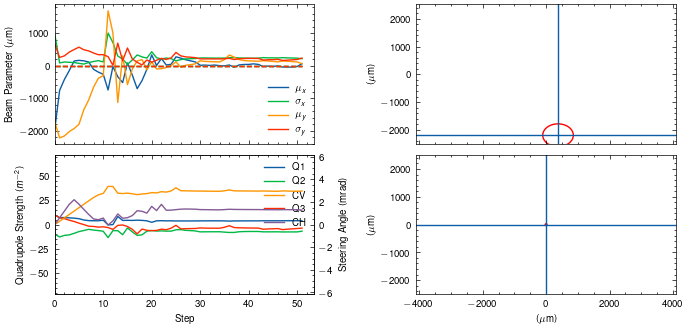

Trial 0
RMSE = 0.0005572258378379047
MAE = 0.0001036852045217529


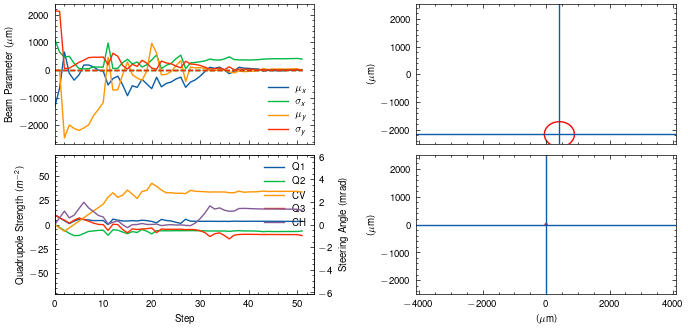

Trial 0
RMSE = 0.0004477545153349638
MAE = 7.412253762595356e-05


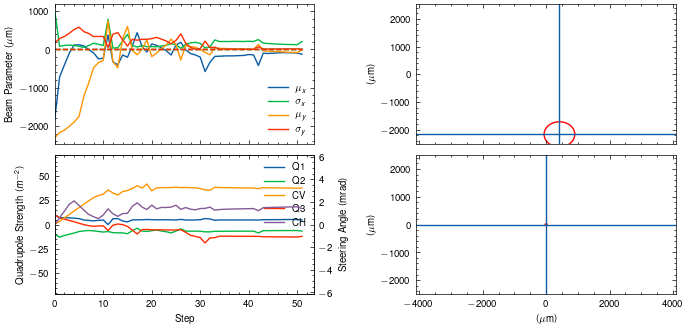

Trial 33
RMSE = 0.0003142598725389689
MAE = 6.007752745063044e-05


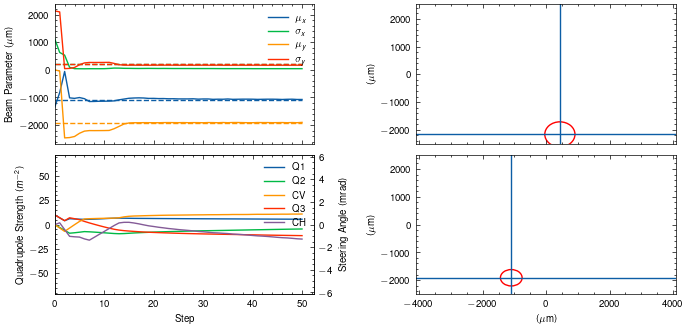

Trial 0
RMSE = 0.00044669141061604023
MAE = 5.478943421621807e-05


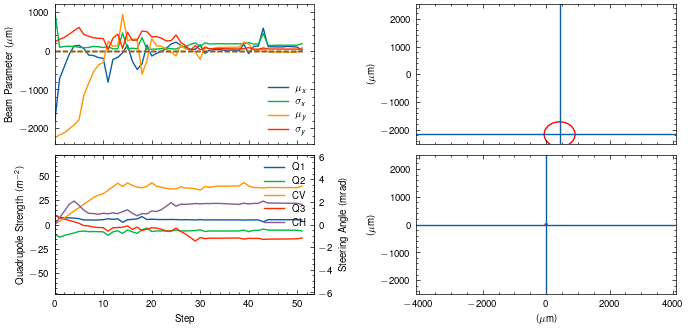

Trial 0
RMSE = 0.0004469216801226139
MAE = 0.00012365140719339252


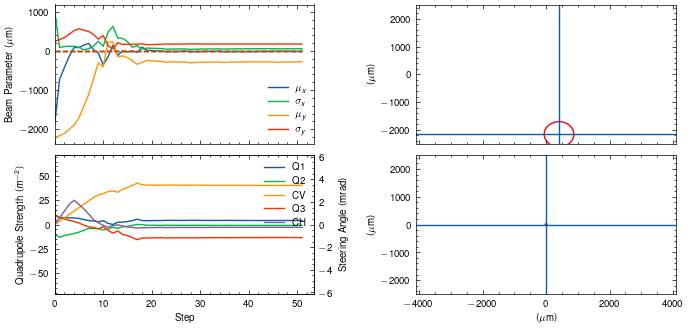

Trial 39
RMSE = 0.0007149036391638219
MAE = 0.0001487799163442105


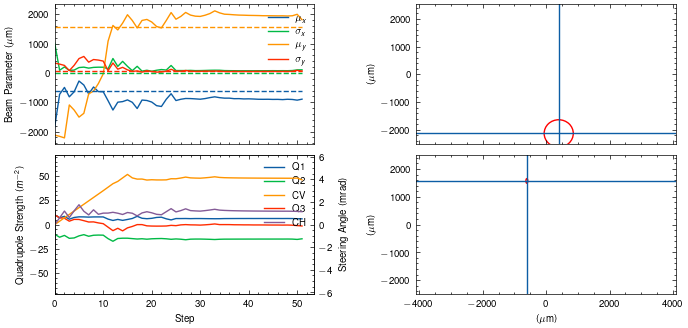

In [92]:
for episode in closing_rlbo.episodes:
    print(f"Trial {episode.problem_index}")
    print(f"RMSE = {episode.rmse()}")
    print(f"MAE = {episode.best_mae()}")
    episode.plot_summary()


### MAE at the beginning vs. MAE at the end

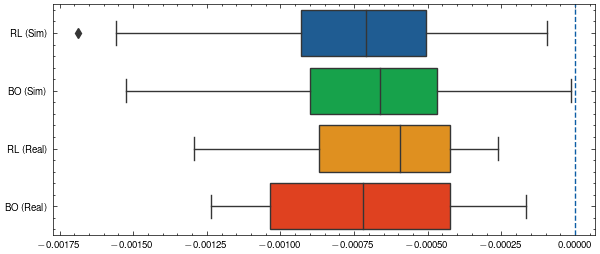

In [93]:
labels = []
improvements = []
for study in [rl_sim, bo_sim, rl_real, bo_real]:
    for episode in study.episodes:
        labels.append(study.name)
        improvements.append(episode.final_mae() - episode.maes()[0])

plt.figure(figsize=(7, 3))
sns.boxplot(x=improvements, y=labels)
plt.axvline(0, ls="--")
plt.show()


### Episode summary plots

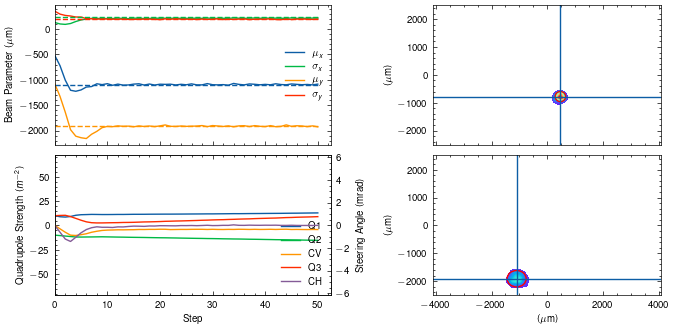

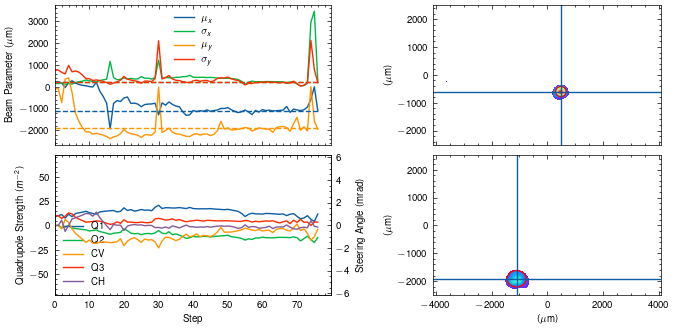

In [94]:
rl_real.get_episodes_by_problem(33)[0].plot_summary(
    figsize=(510 / 72.72, 510 / 72.72 * 0.5),
    save_path=f"{FIG_DIR}/example_episode_rl.pdf",
)
bo_real.get_episodes_by_problem(33)[0].plot_summary(
    figsize=(510 / 72.72, 510 / 72.72 * 0.5),
    save_path=f"{FIG_DIR}/example_episode_bo.pdf",
)


### BO without beam-to-quad alignment

In [95]:
aligned_rl = Study(
    episodes=rl_real.get_episodes_by_problem(0) + rl_real.get_episodes_by_problem(33),
    name="RL quad-aligned",
)
misaligned_rl = Study(episodes=closing_rl.episodes[:2], name="RL not aligned")
aligned_bo = Study(
    episodes=bo_real.get_episodes_by_problem(0) + bo_real.get_episodes_by_problem(33),
    name="BO quad-aligned",
)
misaligned_bo = Study(episodes=closing_bo.episodes[:2], name="BO not aligned")


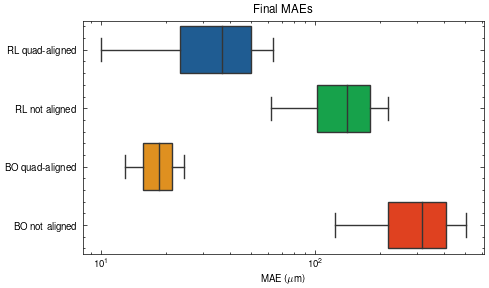

In [96]:
plot_final_mae_box([aligned_rl, misaligned_rl, aligned_bo, misaligned_bo])


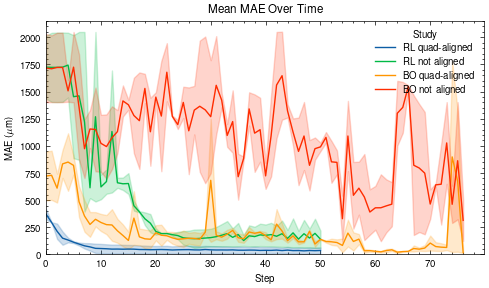

In [97]:
plot_mae_over_time([aligned_rl, misaligned_rl, aligned_bo, misaligned_bo])


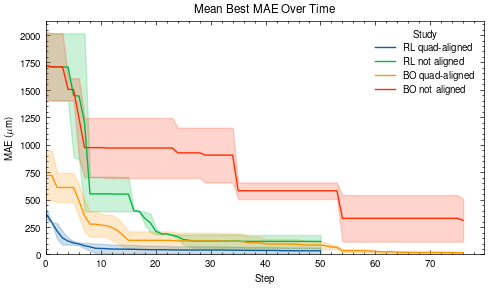

In [98]:
plot_best_mae_over_time([aligned_rl, misaligned_rl, aligned_bo, misaligned_bo])


### Look into worst trial indicies

In [99]:
for study in [rl_sim, bo_sim, rl_real, bo_real]:
    n = 10
    final_maes = [episode.final_mae() for episode in study.episodes]
    worst_indicies = np.argpartition(final_maes, -n)[-n:]
    print(f"{study.name} -> {worst_indicies}")

RL (Sim) -> [ 88  14  89  11  22  17  16 223 249   7]
BO (Sim) -> [274 290  48 280 101  68 216  59 223 131]
RL (Real) -> [ 1 10  9 15 16 17  6  5  4 21]
BO (Real) -> [ 5 12  6 15 13 17  7 19 20  0]


### Correlations

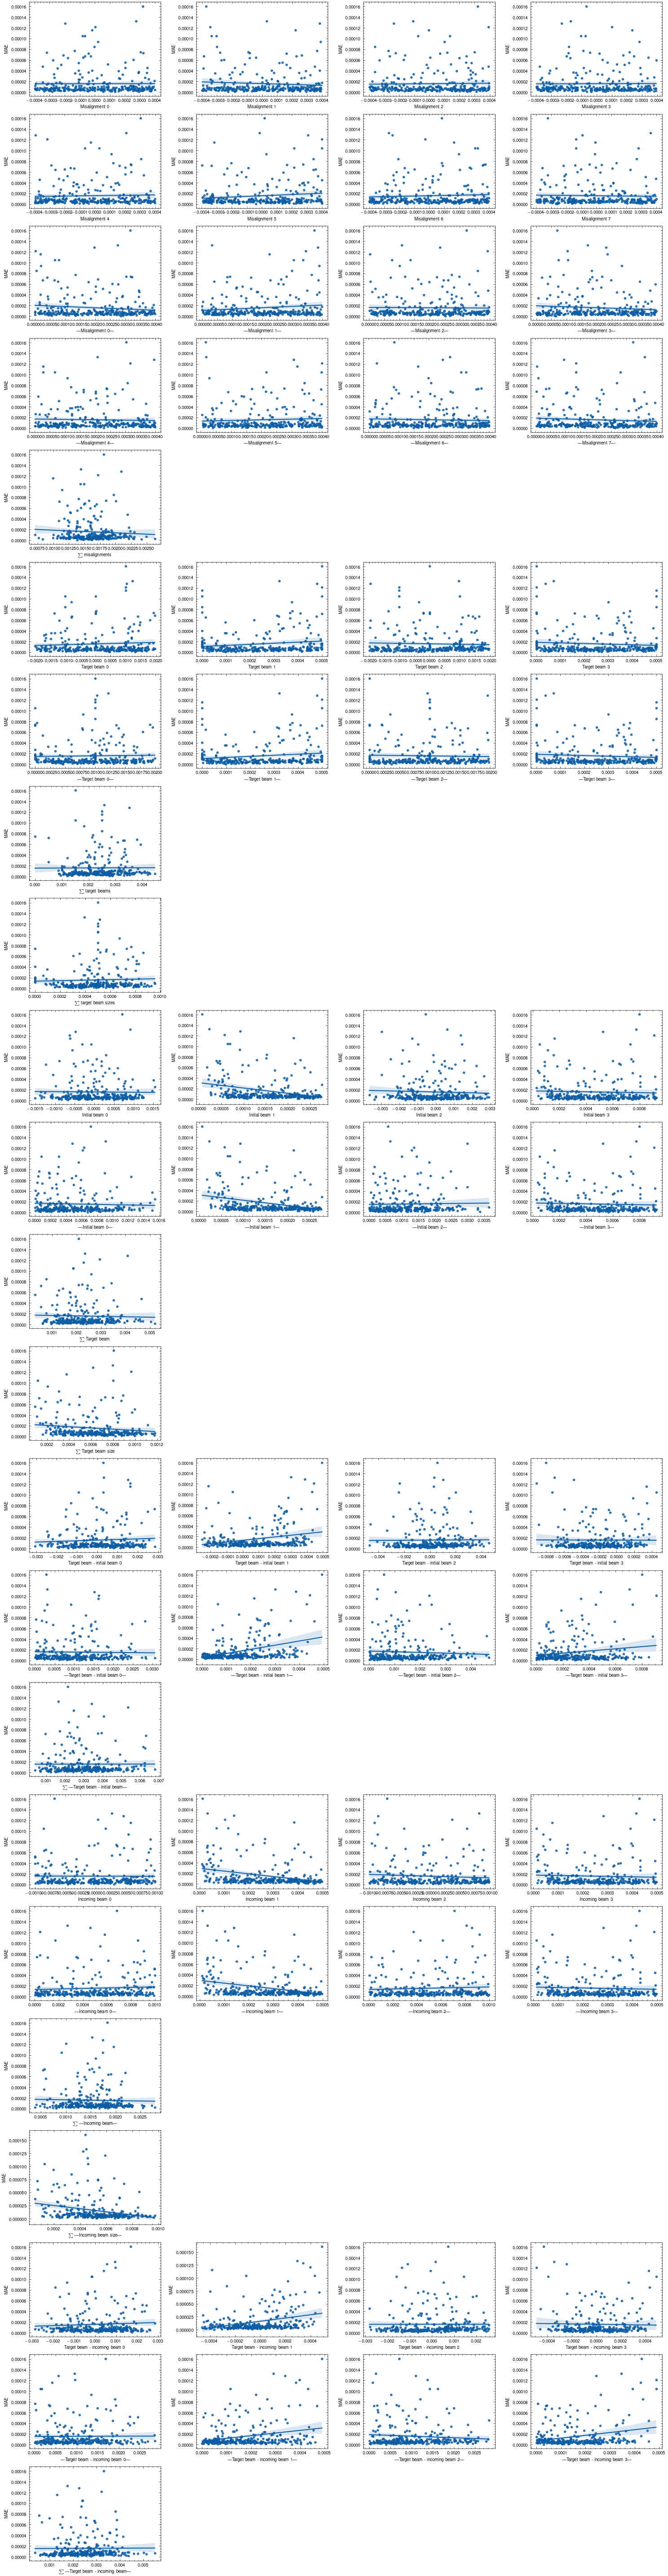

In [100]:
rl_sim.plot_correlations_to_mae()

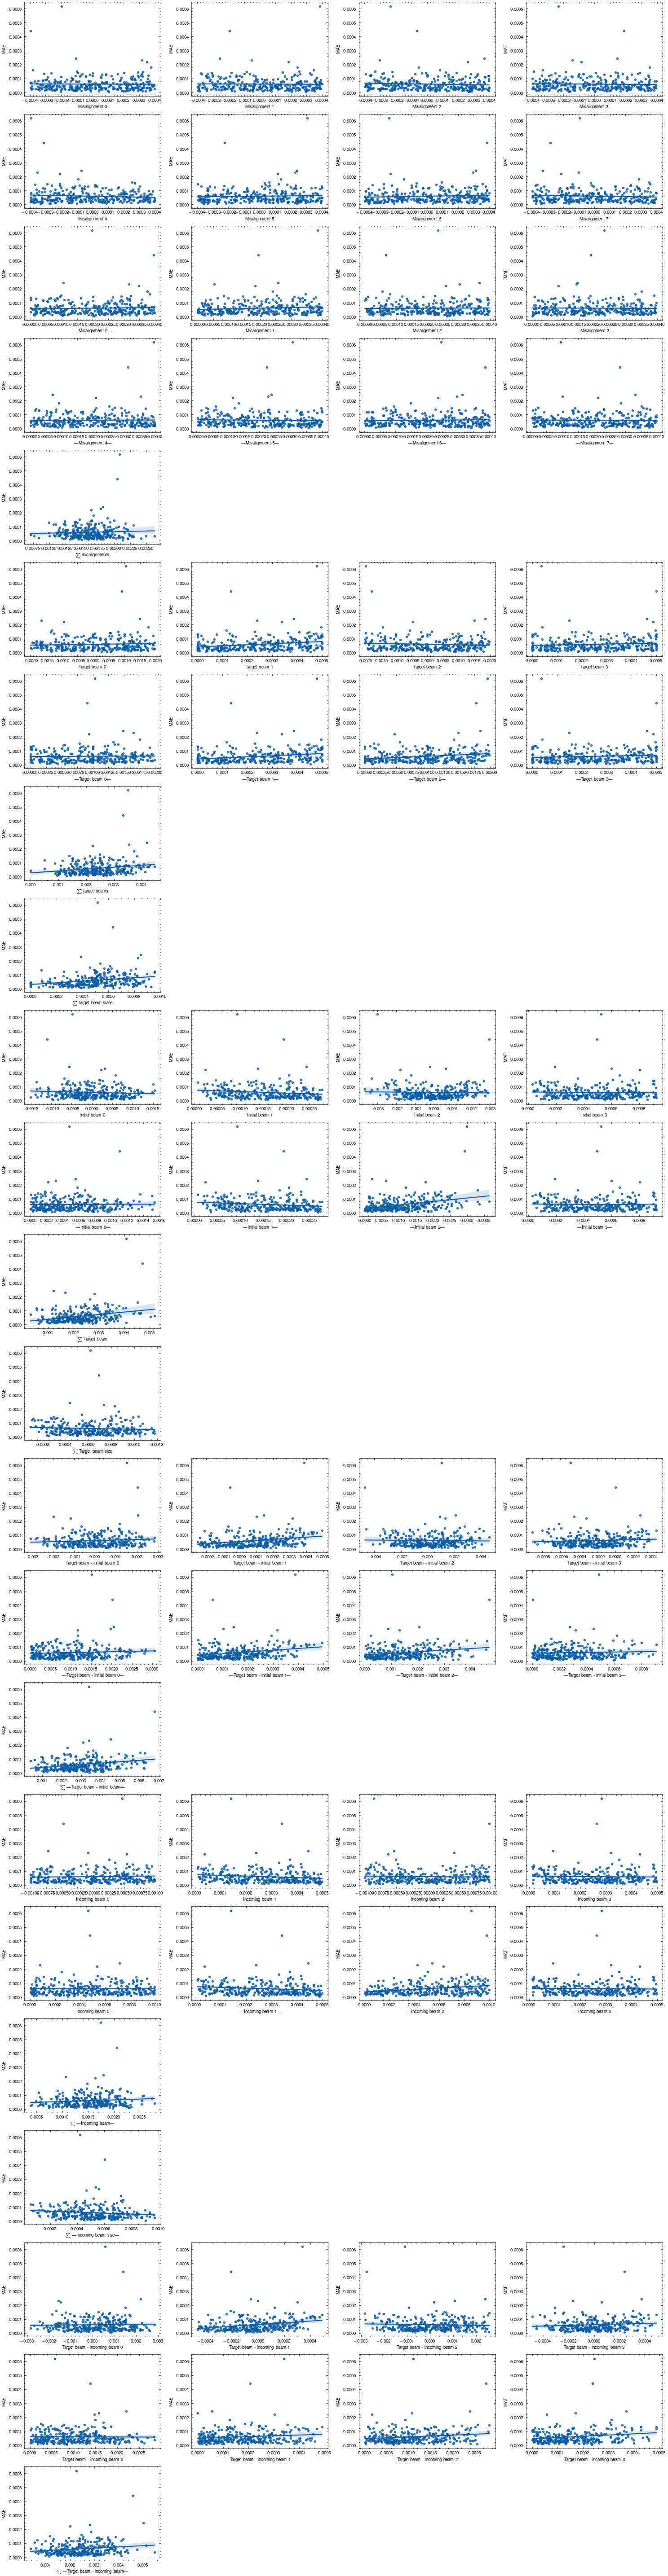

In [101]:
bo_sim.plot_correlations_to_mae()

In [102]:
rl_real.plot_correlations_to_mae()

KeyError: 'misalignments'

In [103]:
bo_real.plot_correlations_to_mae()

KeyError: 'misalignments'

### Is BO better on RLs worst?

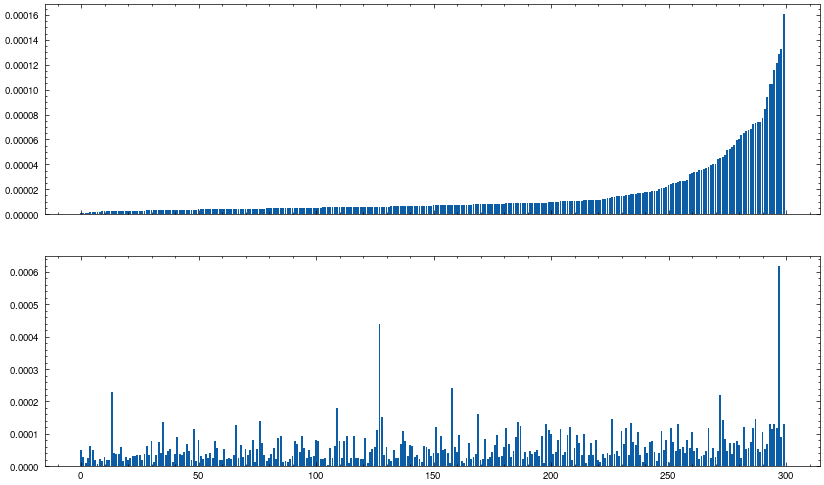

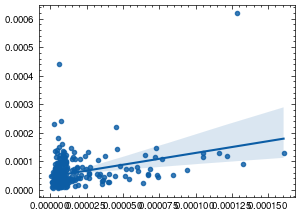

In [104]:
rl_sim_final_maes = np.array([episode.final_mae() for episode in rl_sim.episodes])
bo_sim_final_maes = np.array([episode.final_mae() for episode in bo_sim.episodes])

rl_sim_sorted_indicies = np.argsort(rl_sim_final_maes)

_, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 6), sharex="col")
ax0.bar(np.arange(len(rl_sim)), rl_sim_final_maes[rl_sim_sorted_indicies])
ax1.bar(np.arange(len(bo_sim)), bo_sim_final_maes[rl_sim_sorted_indicies])
plt.show()

sns.regplot(x=rl_sim_final_maes, y=bo_sim_final_maes)
plt.show()


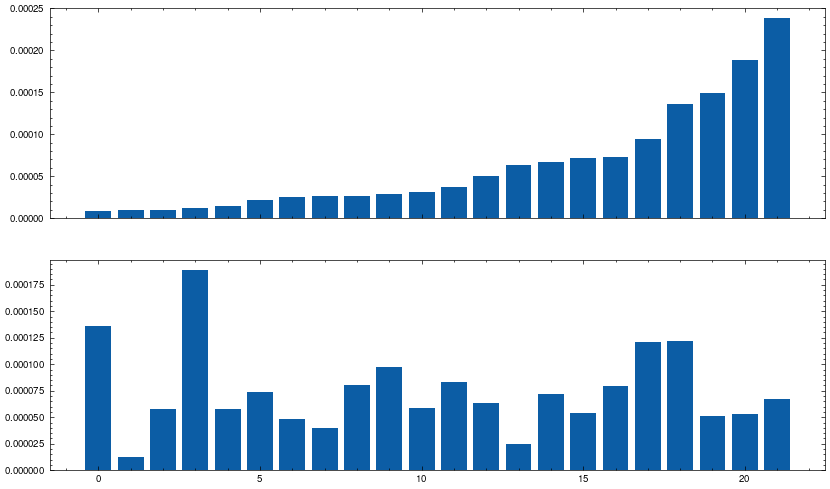

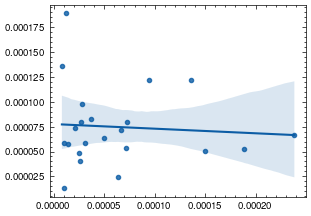

In [105]:
rl_real_final_maes = np.array([episode.final_mae() for episode in rl_real.episodes])
bo_real_final_maes = np.array([episode.final_mae() for episode in bo_real.episodes])

rl_real_sorted_indicies = np.argsort(rl_real_final_maes)

_, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 6), sharex="col")
ax0.bar(np.arange(len(rl_real)), rl_real_final_maes[rl_real_sorted_indicies])
ax1.bar(np.arange(len(bo_real)), bo_real_final_maes[rl_real_sorted_indicies])
plt.show()

sns.regplot(x=rl_real_final_maes, y=bo_real_final_maes)
plt.show()


### Is it bad in the real world if it was in simulation?

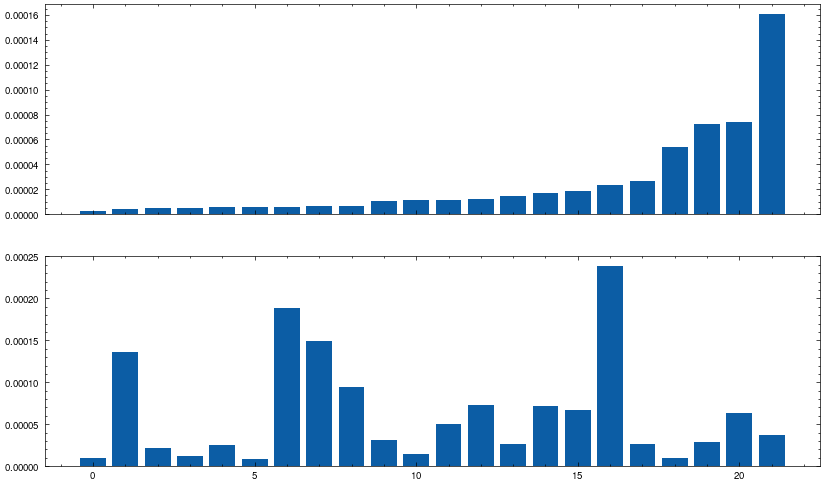

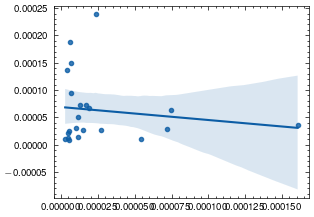

In [106]:
rl_sim_matched, rl_real_matched = problem_aligned([rl_sim, rl_real])

rl_sim_matched_final_maes = np.array([episode.final_mae() for episode in rl_sim_matched.episodes])
rl_real_matched_final_maes = np.array([episode.final_mae() for episode in rl_real_matched.episodes])

rl_sim_matched_sorted_indicies = np.argsort(rl_sim_matched_final_maes)

_, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 6), sharex="col")
ax0.bar(np.arange(len(rl_sim_matched)), rl_sim_matched_final_maes[rl_sim_matched_sorted_indicies])
ax1.bar(np.arange(len(rl_real_matched)), rl_real_matched_final_maes[rl_sim_matched_sorted_indicies])
plt.show()

sns.regplot(x=rl_sim_matched_final_maes, y=rl_real_matched_final_maes)
plt.show()


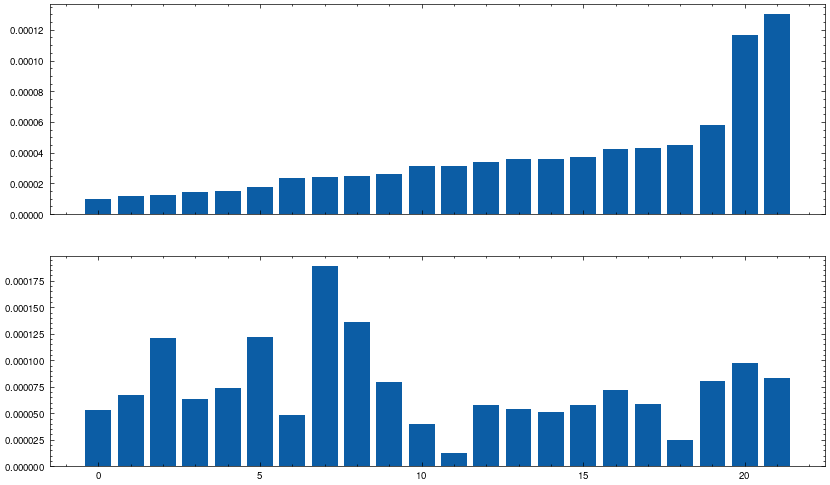

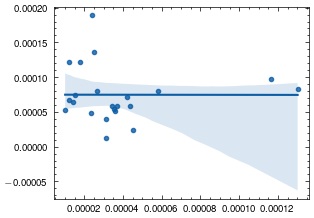

In [107]:
bo_sim_matched, bo_real_matched = problem_aligned([bo_sim, bo_real])

bo_sim_matched_final_maes = np.array([episode.final_mae() for episode in bo_sim_matched.episodes])
bo_real_matched_final_maes = np.array([episode.final_mae() for episode in bo_real_matched.episodes])

bo_sim_matched_sorted_indicies = np.argsort(bo_sim_matched_final_maes)

_, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 6), sharex="col")
ax0.bar(np.arange(len(bo_sim_matched)), bo_sim_matched_final_maes[bo_sim_matched_sorted_indicies])
ax1.bar(np.arange(len(bo_real_matched)), bo_real_matched_final_maes[bo_sim_matched_sorted_indicies])
plt.show()

sns.regplot(x=bo_sim_matched_final_maes, y=bo_real_matched_final_maes)
plt.show()
